In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [67]:
df = pd.read_csv('Cleaned columns by each one us/Final_cleaned_wuzzuf_jobs.csv')
df.head()

Unnamed: 0                                              Title  \
0           0  (Customs Clearance - Expeditor) officer - 6 Mo...   
1           1  1) Accountant - 2) internal Auditor -3) Cost A...   
2           2               A Credit Control/Accounts Receivable   
3           3                                     A/P Accountant   
4           4                                     A/P Accountant   

  Working_Hours Working_Place                   Company    Location  \
0     Full Time       on-site         Sukari Gold Mines  Alexandria   
1     Full Time       on-site               Green Foods       cairo   
2     Full Time       on-site  Alupco Aluminum Products       cairo   
3     Full Time       on-site          Groupe- Atlantic       cairo   
4     Full Time       on-site            New Mena Plast       cairo   

   Post_Date  Number_of_Applicants  Number_of_Positions  \
0         28                  56.0                    4   
1         28                 342.0                    1   
2         28                  63.0                    1   
3         28                  93.0                    1   
4         18                  92.0                    1   

                Career_Level  ...                        Salary  \
0  Experienced (Non-Manager)  ...  19000 To 19000 EGP Per Month   
1  Experienced (Non-Manager)  ...                  Confidential   
2  Experienced (Non-Manager)  ...  20000 To 25000 SAR Per Month   
3  Experienced (Non-Manager)  ...                  Confidential   
4  Experienced (Non-Manager)  ...          0 To 0 EGP Per Month   

         Job_Category                                             Skills  \
0  Accounting/Finance  ['customer', 'brokerage', 'customer support', ...   
1  Accounting/Finance  ['accounting', 'auditing', 'finance', 'account...   
2  Accounting/Finance  ['accounting', 'accounts', 'accounts receivabl...   
3  Accounting/Finance  ['accounting', 'commerce', 'ap', 'finance', 'ms']   
4  Accounting/Finance  ['accountant', 'accounting', 'ap', 'a/p', 'fin...   

  Gender Job_Category_Count  min_experience  max_experience  \
0   both                901             1.0             3.0   
1   both                901             2.0             4.0   
2   both                901             2.0             3.0   
3   both                901             2.0             4.0   
4   both                901             2.0             5.0   

                   City Unnamed: 19  Applicant_per_position  
0            Alexandria         NaN                    14.0  
1              Sheraton         NaN                   342.0  
2             Nasr City         NaN                    63.0  
3  10th of Ramadan City         NaN                    93.0  
4            Obour City         NaN                    92.0  

[5 rows x 21 columns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8257 entries, 0 to 8256
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8257 non-null   int64  
 1   Title                   8257 non-null   object 
 2   Working_Hours           8257 non-null   object 
 3   Working_Place           8257 non-null   object 
 4   Company                 8257 non-null   object 
 5   Location                8248 non-null   object 
 6   Post_Date               8257 non-null   int64  
 7   Number_of_Applicants    7959 non-null   float64
 8   Number_of_Positions     8257 non-null   int64  
 9   Career_Level            8257 non-null   object 
 10  Education               8257 non-null   object 
 11  Salary                  7344 non-null   object 
 12  Job_Category            8257 non-null   object 
 13  Skills                  8257 non-null   object 
 14  Gender                  8257 non-null   

In [69]:
df['Applicants_per_Day'] = df['Number_of_Applicants'] / df['Post_Date']
df.head()

Unnamed: 0                                              Title  \
0           0  (Customs Clearance - Expeditor) officer - 6 Mo...   
1           1  1) Accountant - 2) internal Auditor -3) Cost A...   
2           2               A Credit Control/Accounts Receivable   
3           3                                     A/P Accountant   
4           4                                     A/P Accountant   

  Working_Hours Working_Place                   Company    Location  \
0     Full Time       on-site         Sukari Gold Mines  Alexandria   
1     Full Time       on-site               Green Foods       cairo   
2     Full Time       on-site  Alupco Aluminum Products       cairo   
3     Full Time       on-site          Groupe- Atlantic       cairo   
4     Full Time       on-site            New Mena Plast       cairo   

   Post_Date  Number_of_Applicants  Number_of_Positions  \
0         28                  56.0                    4   
1         28                 342.0                    1   
2         28                  63.0                    1   
3         28                  93.0                    1   
4         18                  92.0                    1   

                Career_Level  ...        Job_Category  \
0  Experienced (Non-Manager)  ...  Accounting/Finance   
1  Experienced (Non-Manager)  ...  Accounting/Finance   
2  Experienced (Non-Manager)  ...  Accounting/Finance   
3  Experienced (Non-Manager)  ...  Accounting/Finance   
4  Experienced (Non-Manager)  ...  Accounting/Finance   

                                              Skills Gender  \
0  ['customer', 'brokerage', 'customer support', ...   both   
1  ['accounting', 'auditing', 'finance', 'account...   both   
2  ['accounting', 'accounts', 'accounts receivabl...   both   
3  ['accounting', 'commerce', 'ap', 'finance', 'ms']   both   
4  ['accountant', 'accounting', 'ap', 'a/p', 'fin...   both   

  Job_Category_Count min_experience  max_experience                  City  \
0                901            1.0             3.0            Alexandria   
1                901            2.0             4.0              Sheraton   
2                901            2.0             3.0             Nasr City   
3                901            2.0             4.0  10th of Ramadan City   
4                901            2.0             5.0            Obour City   

   Unnamed: 19 Applicant_per_position  Applicants_per_Day  
0          NaN                   14.0            2.000000  
1          NaN                  342.0           12.214286  
2          NaN                   63.0            2.250000  
3          NaN                   93.0            3.321429  
4          NaN                   92.0            5.111111  

[5 rows x 22 columns]

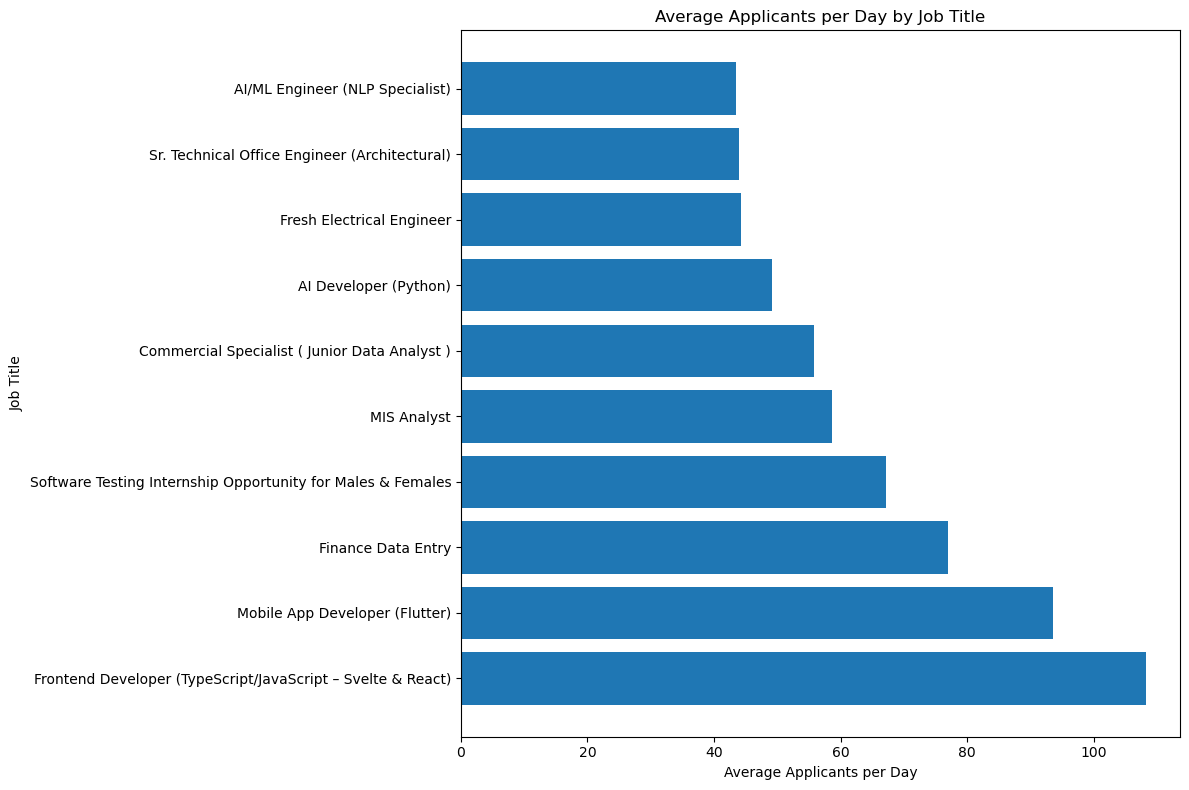

In [70]:
df_grouped = df.groupby('Title')['Applicants_per_Day'].mean().reset_index()

# Sort the dataframe by average Applicants_per_Day in descending order
df_sorted = df_grouped.sort_values(by='Applicants_per_Day', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12,8))
plt.barh(df_sorted['Title'], df_sorted['Applicants_per_Day'])
plt.xlabel('Average Applicants per Day')
plt.ylabel('Job Title')
plt.title('Average Applicants per Day by Job Title')
plt.tight_layout()
plt.show()


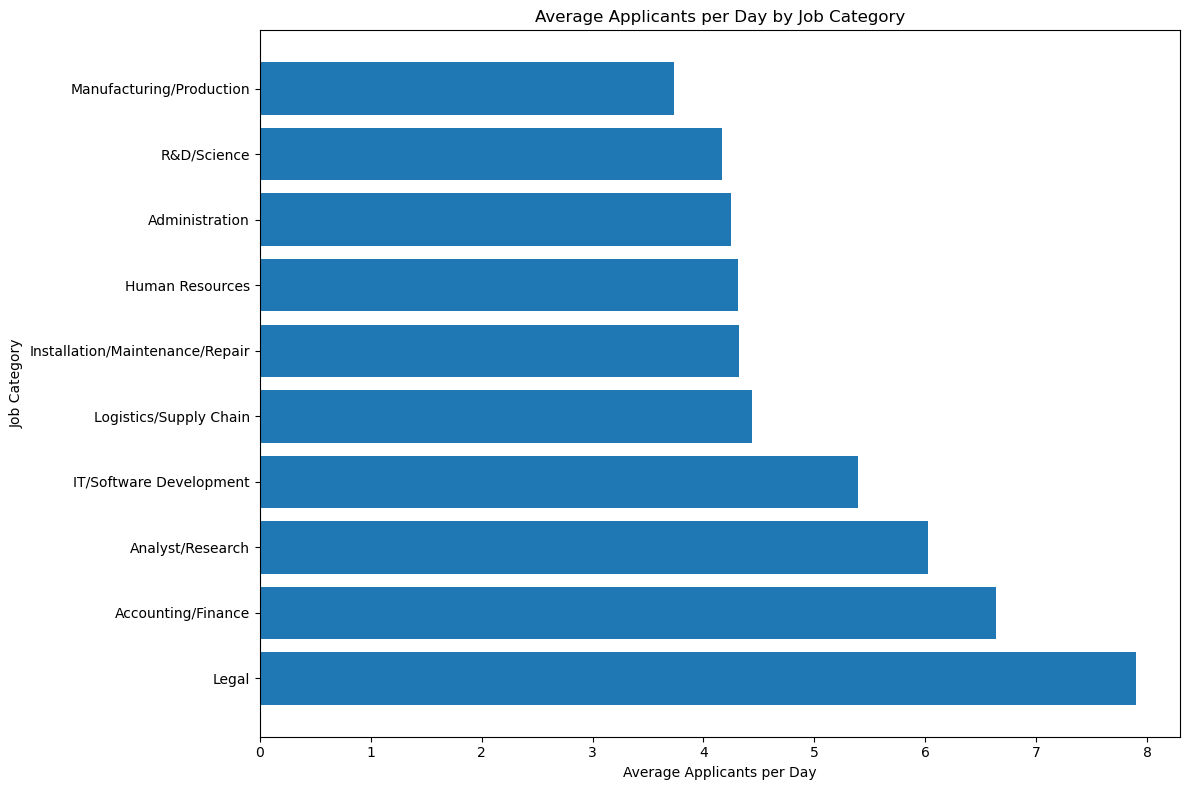

In [71]:
df_grouped = df.groupby('Job_Category')['Applicants_per_Day'].mean().reset_index()

# Sort the dataframe by average Applicants_per_Day in descending order
df_sorted = df_grouped.sort_values(by='Applicants_per_Day', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12,8))
plt.barh(df_sorted['Job_Category'], df_sorted['Applicants_per_Day'])
plt.xlabel('Average Applicants per Day')
plt.ylabel('Job Category')
plt.title('Average Applicants per Day by Job Category')
plt.tight_layout()
plt.show()


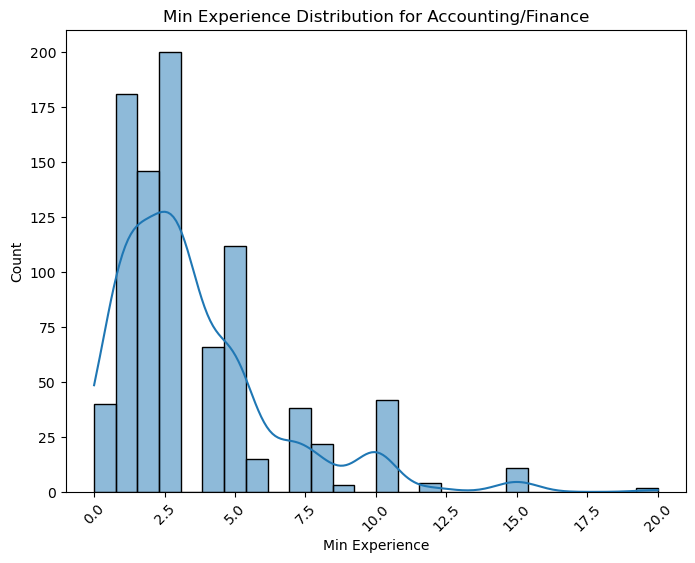

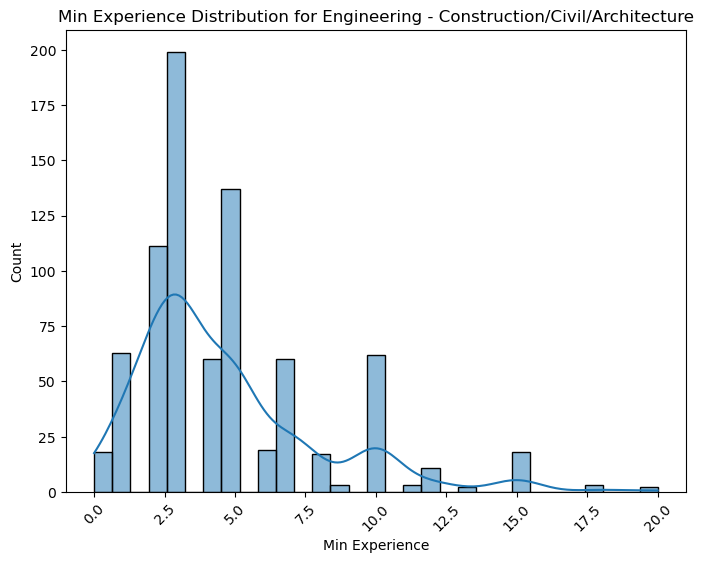

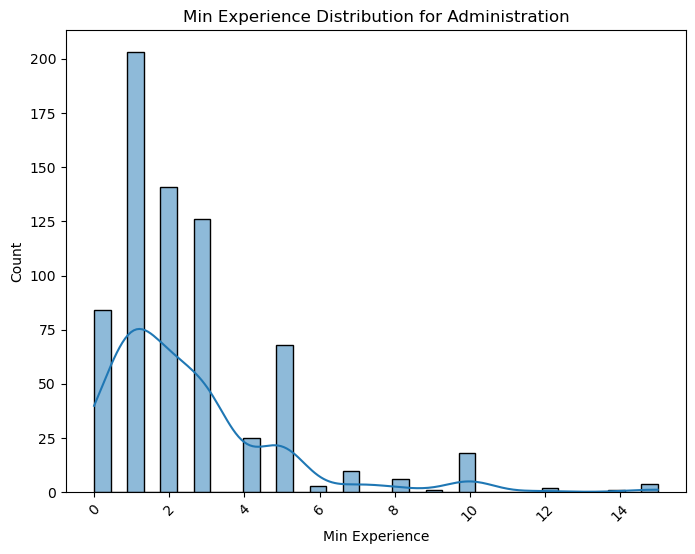

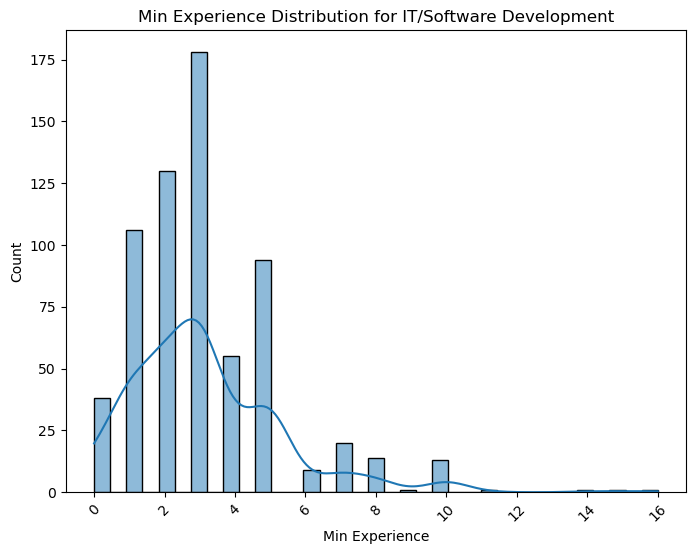

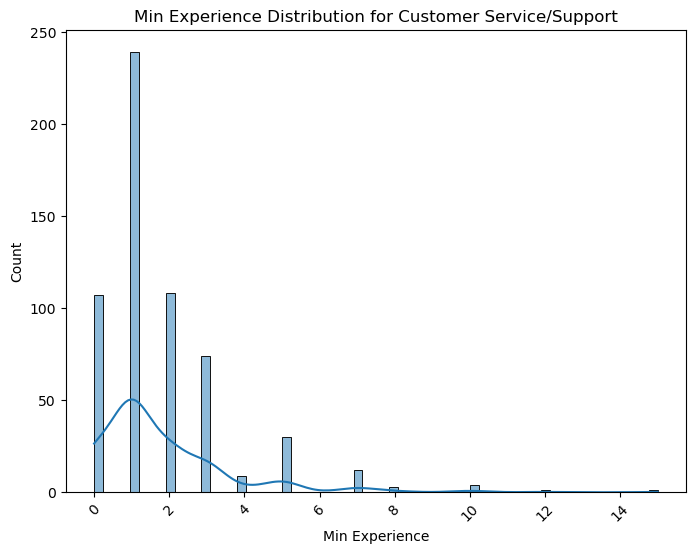

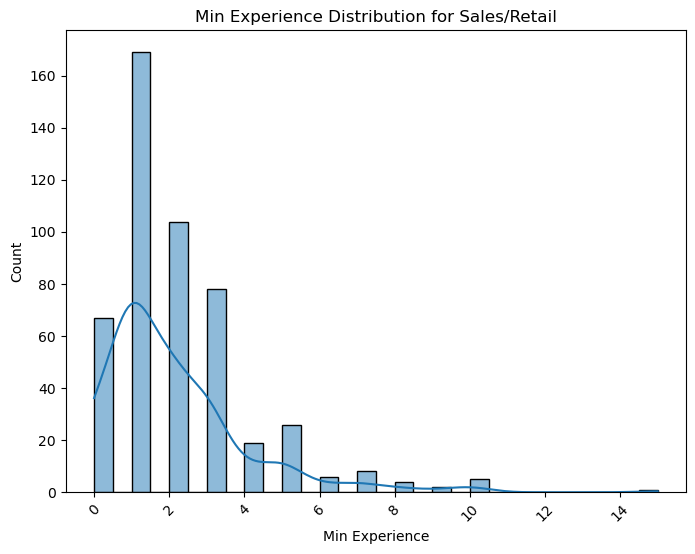

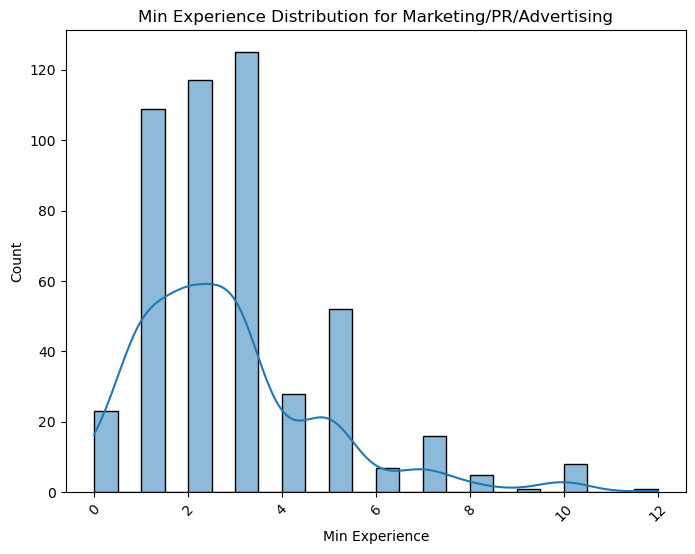

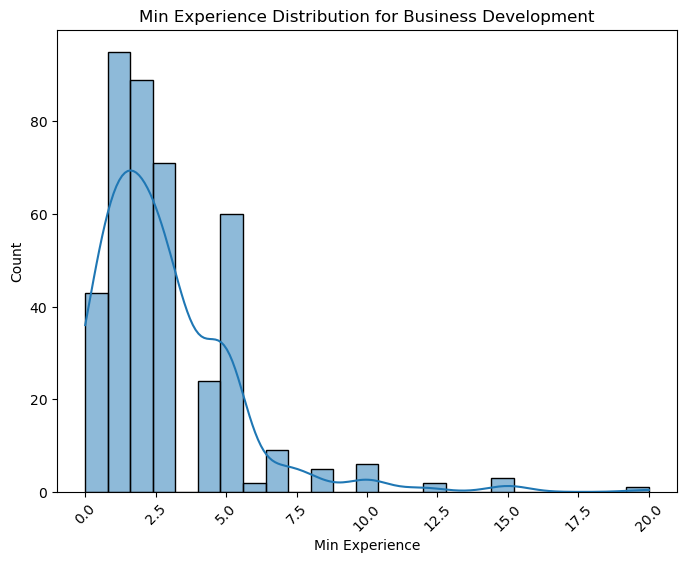

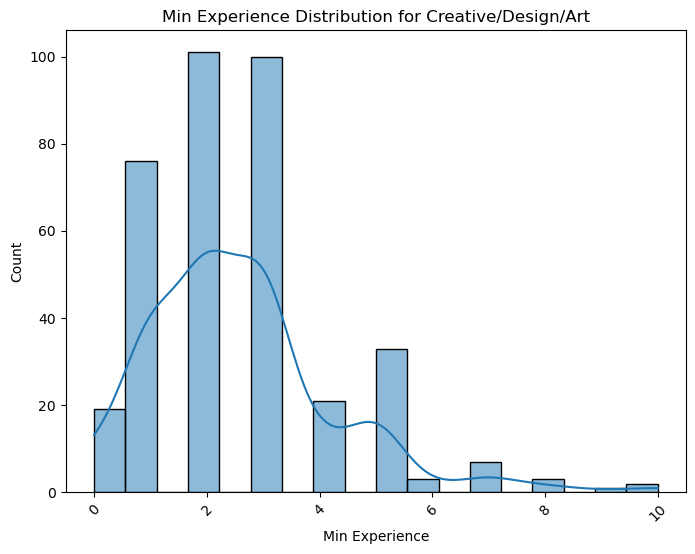

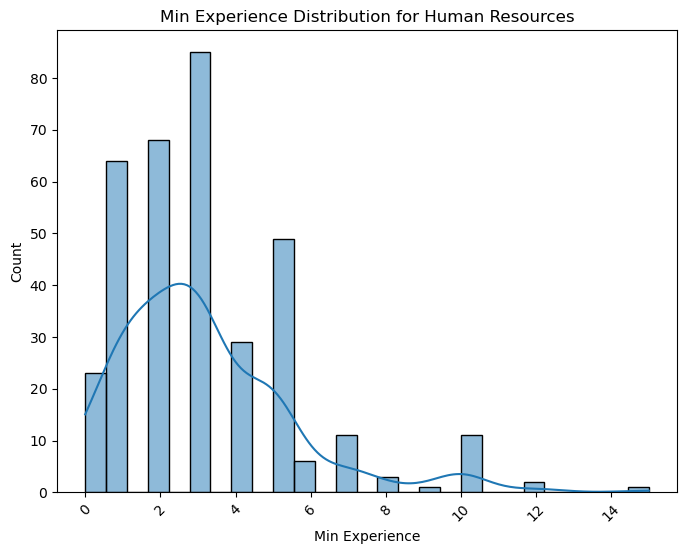

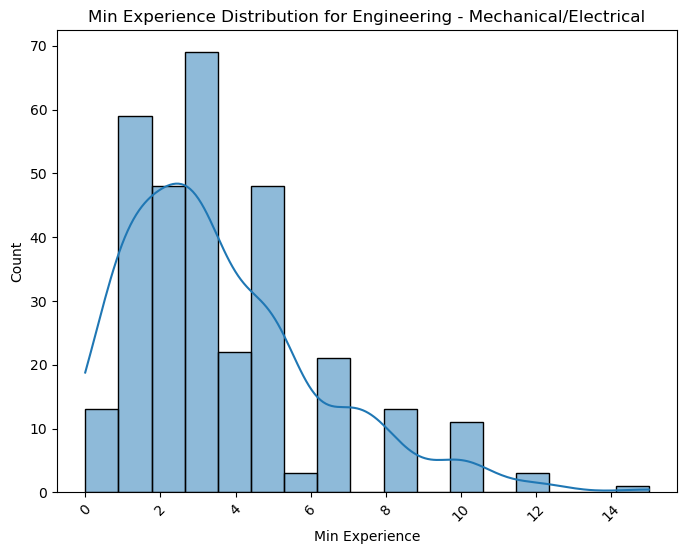

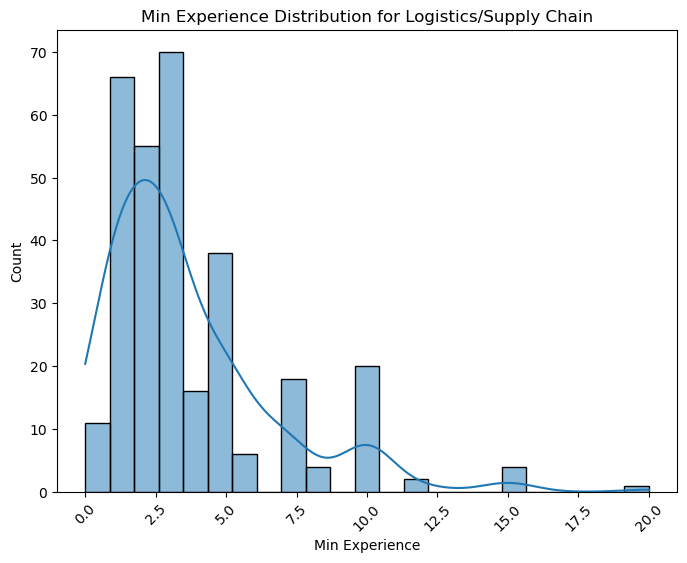

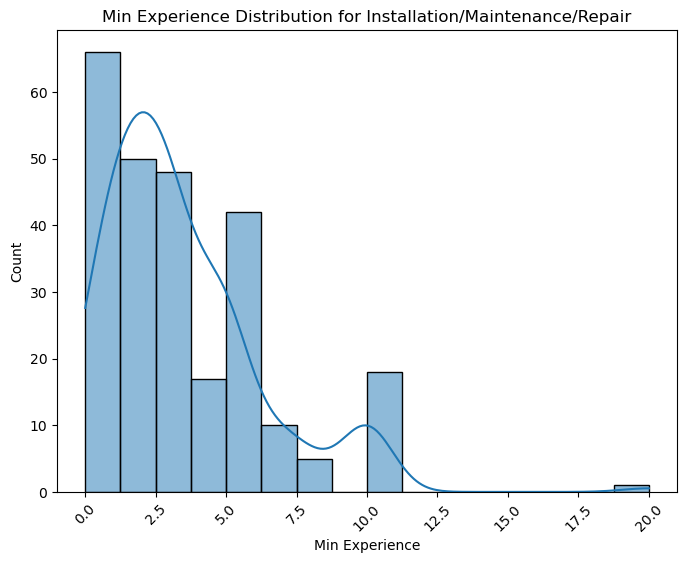

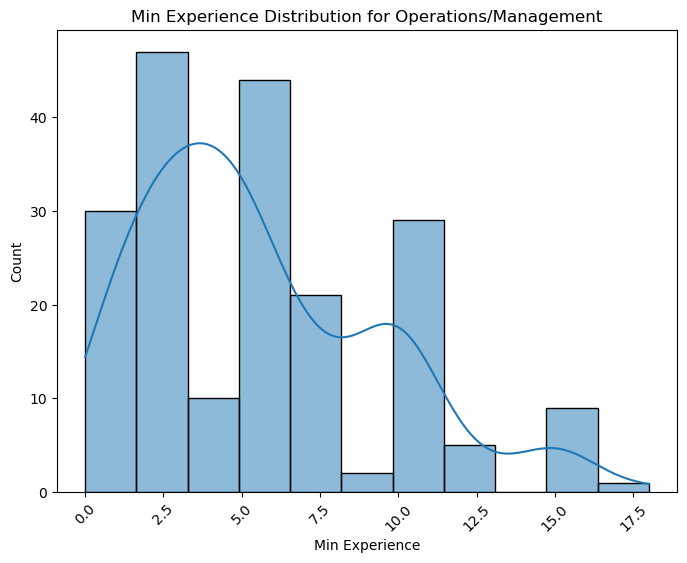

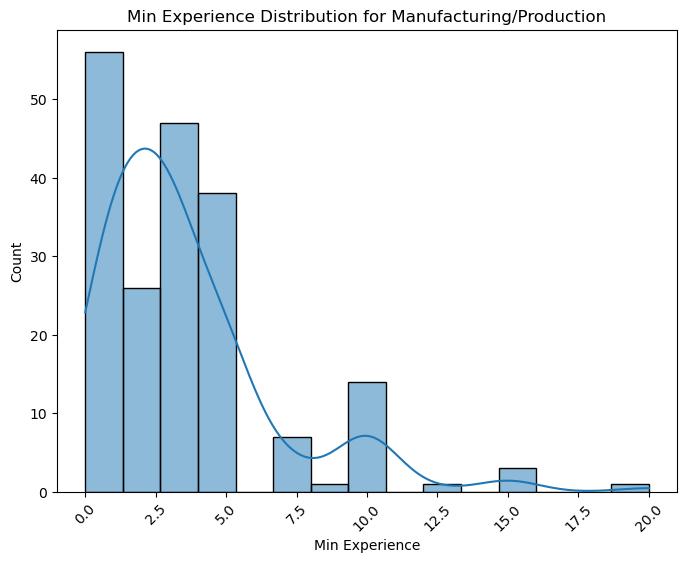

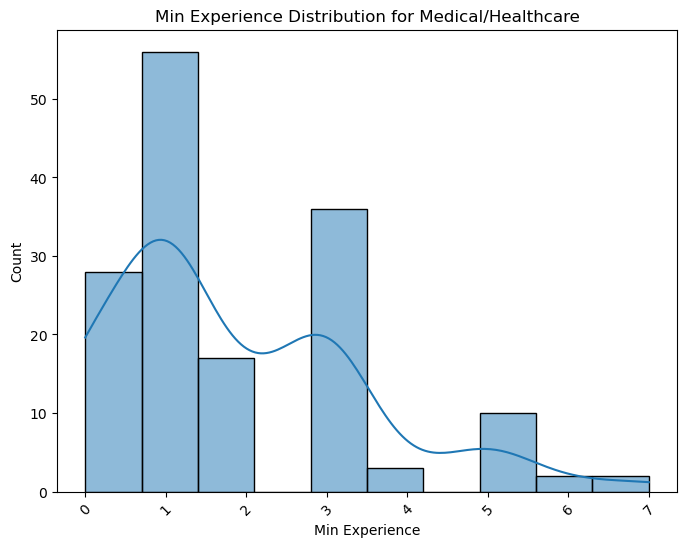

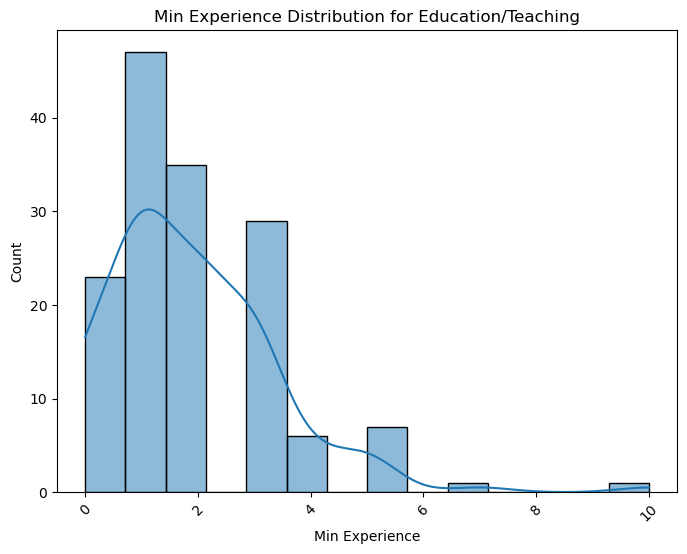

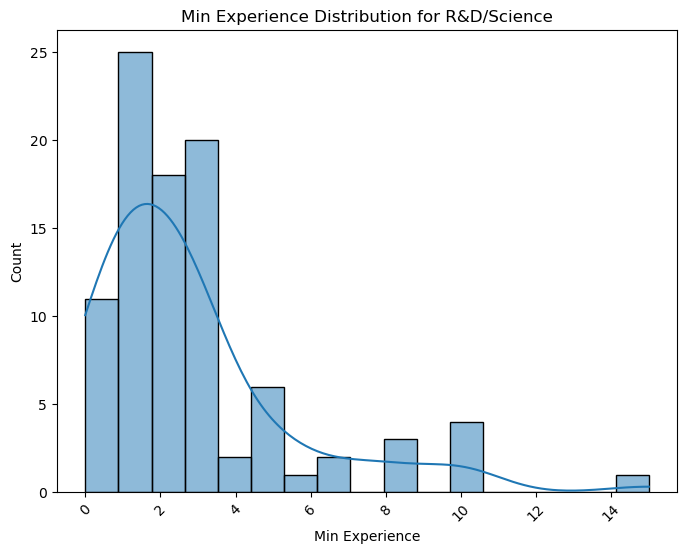

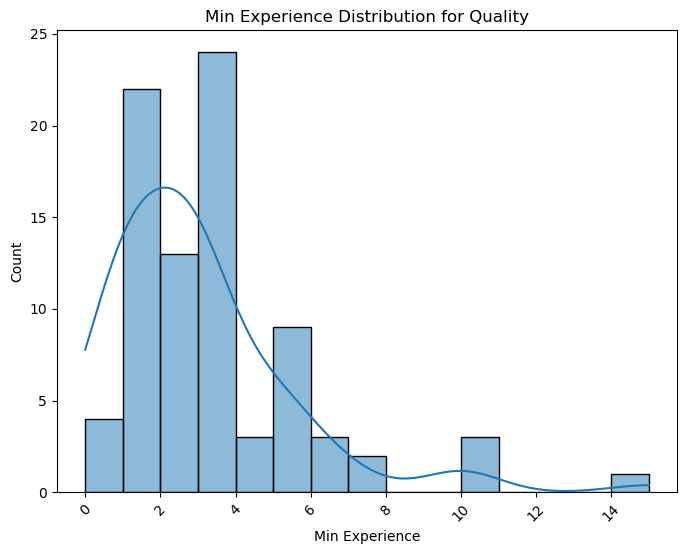

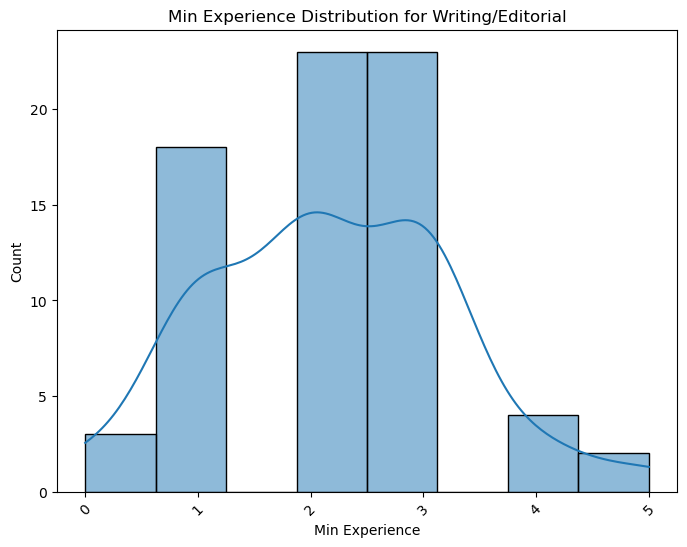

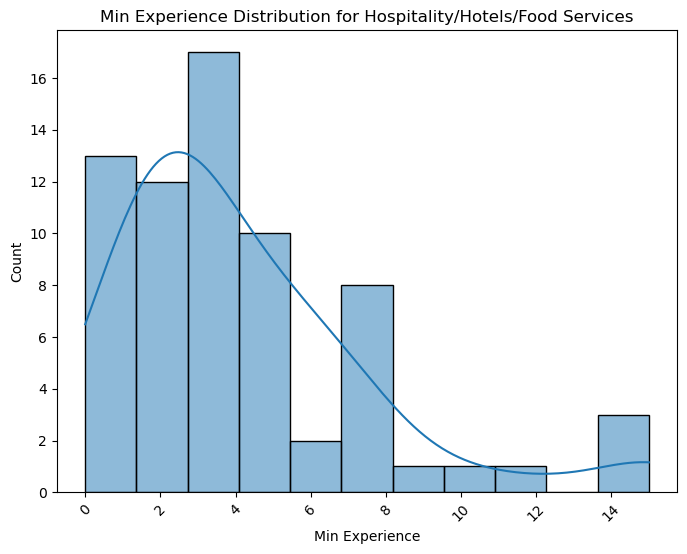

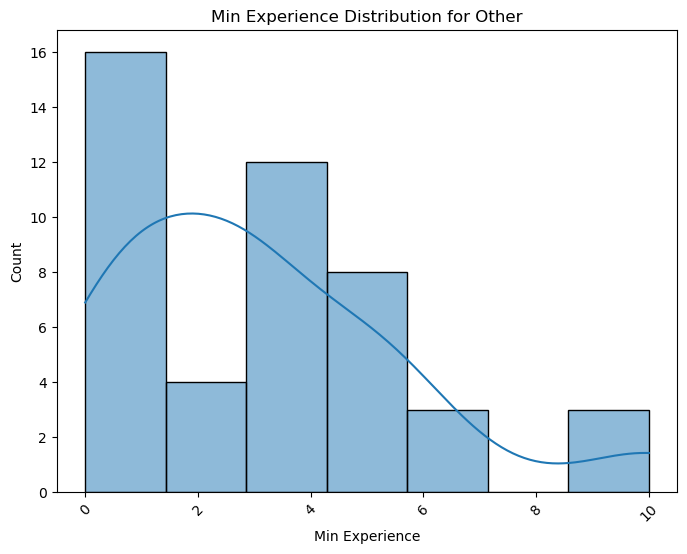

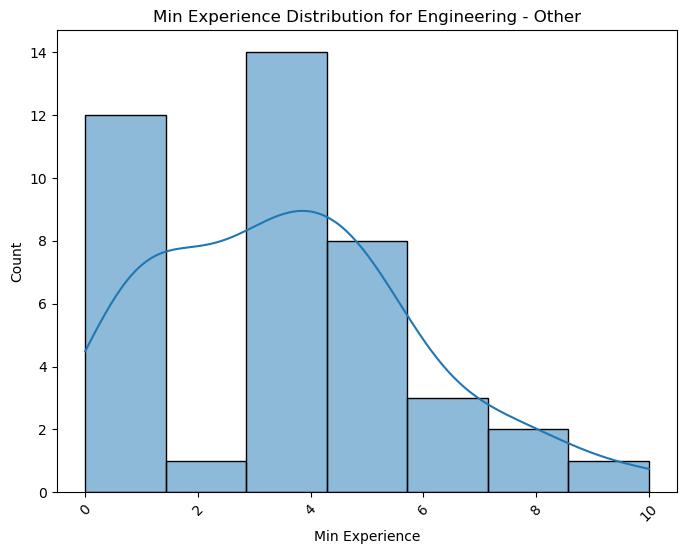

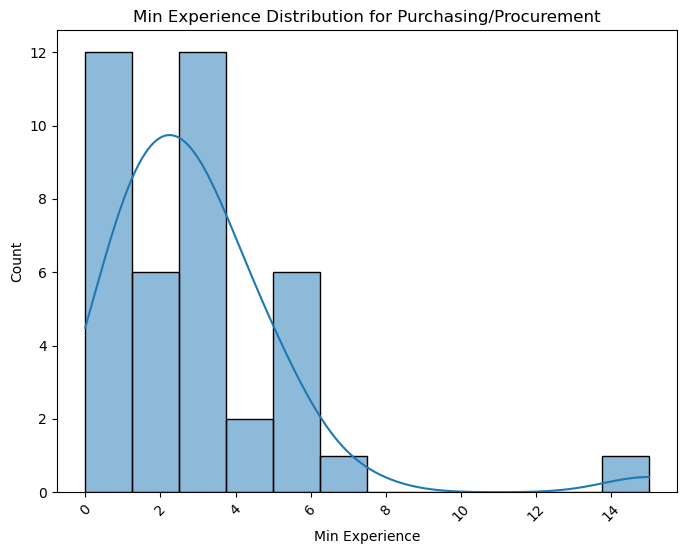

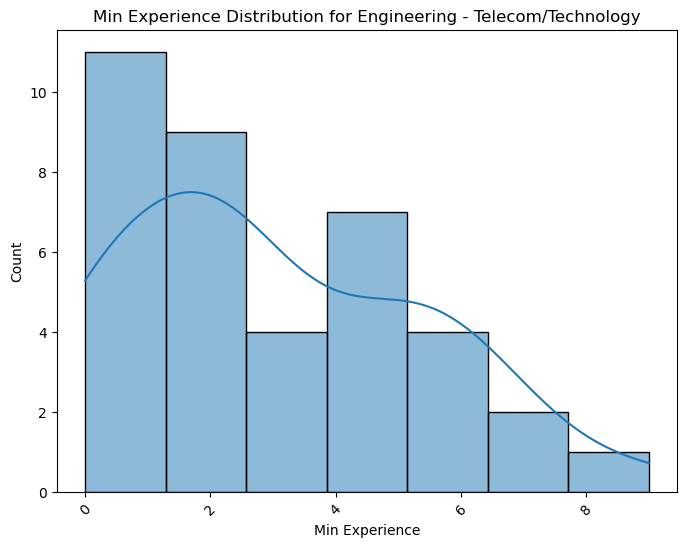

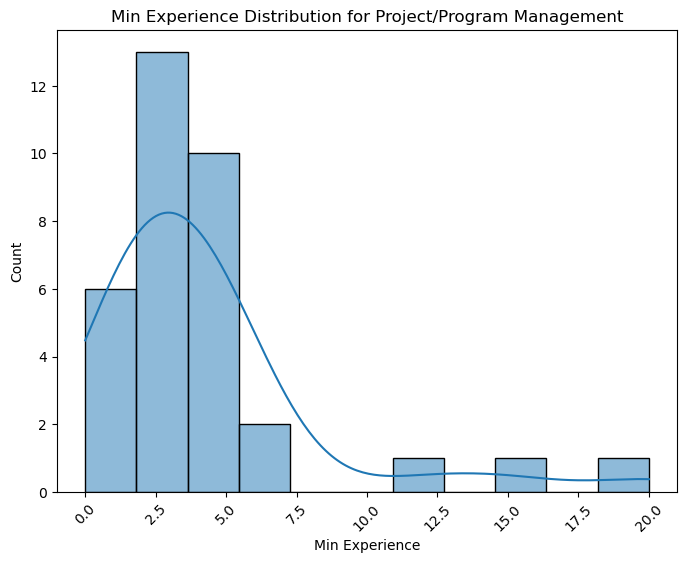

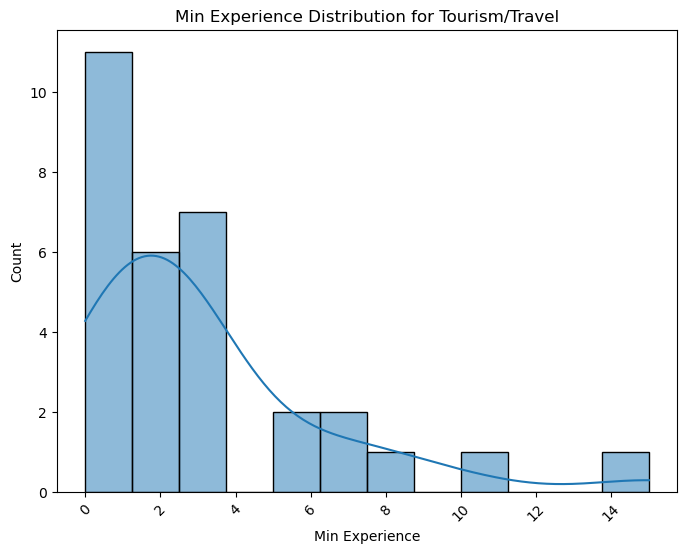

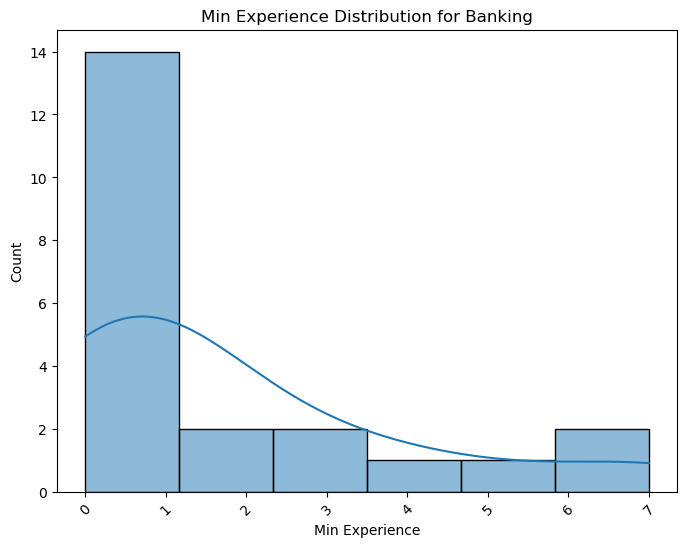

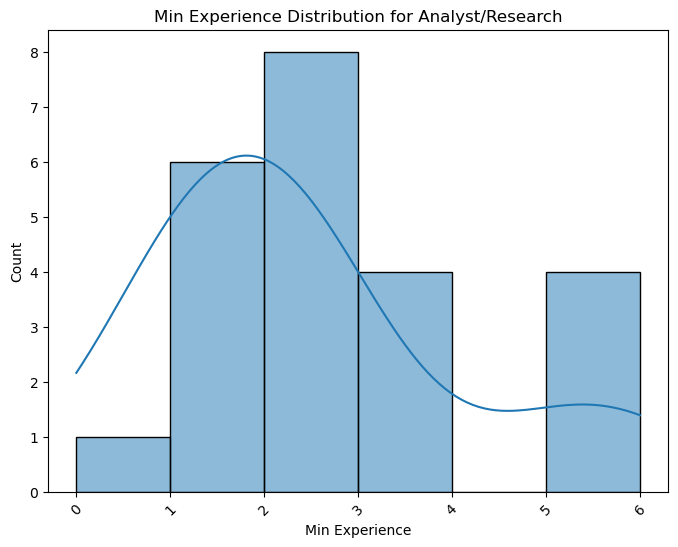

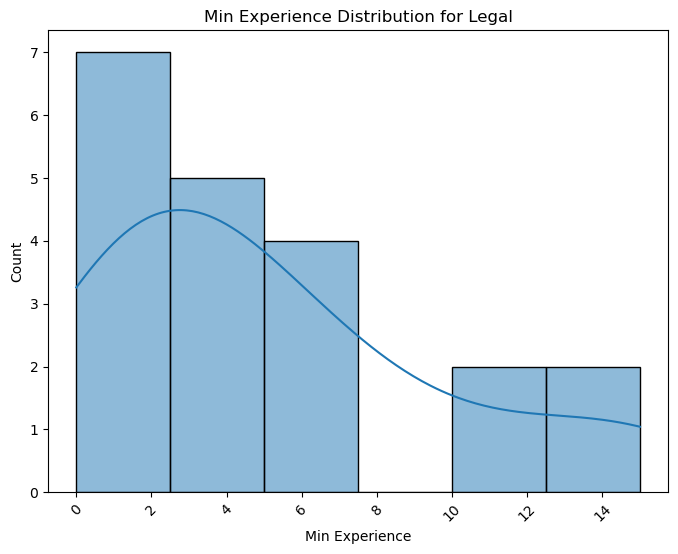

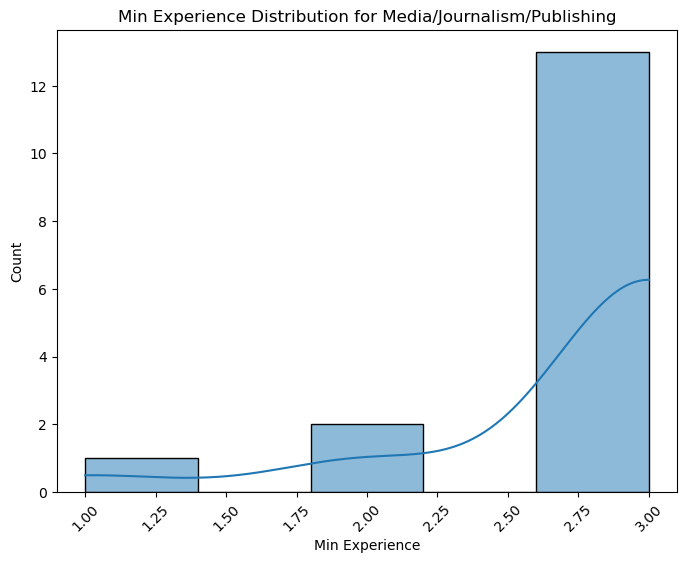

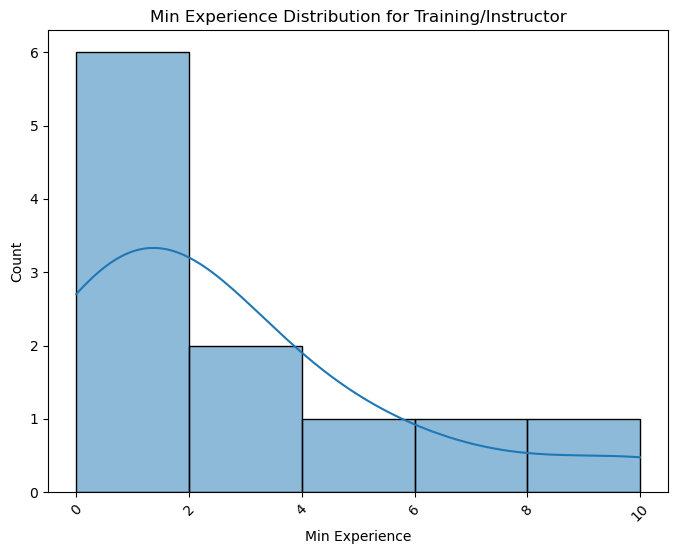

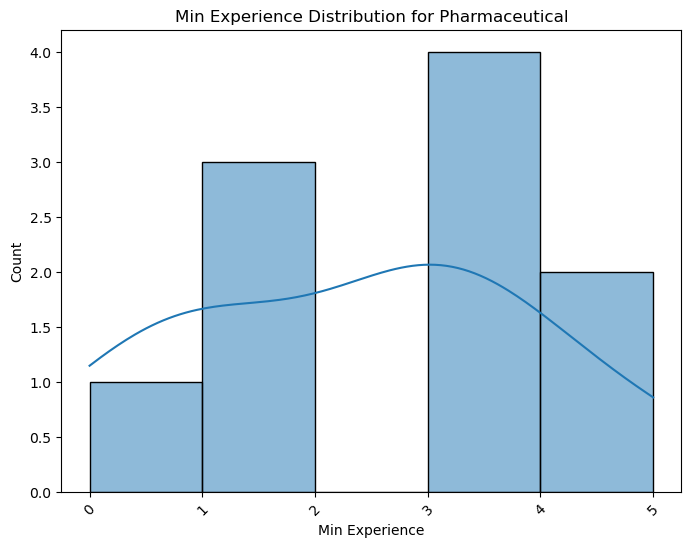

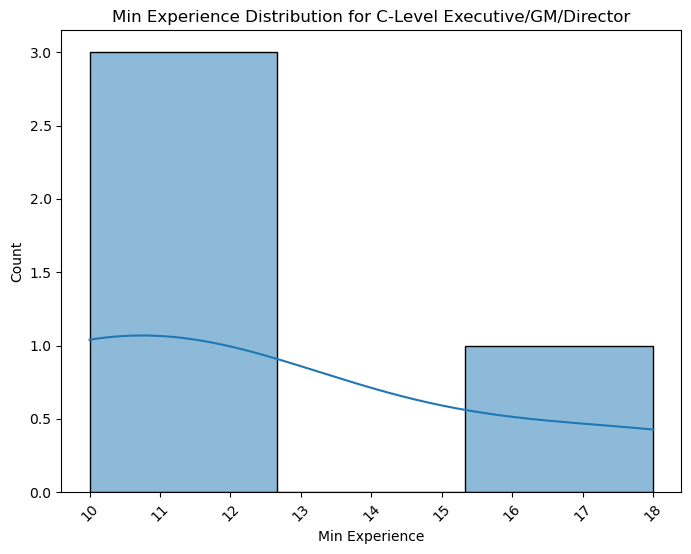

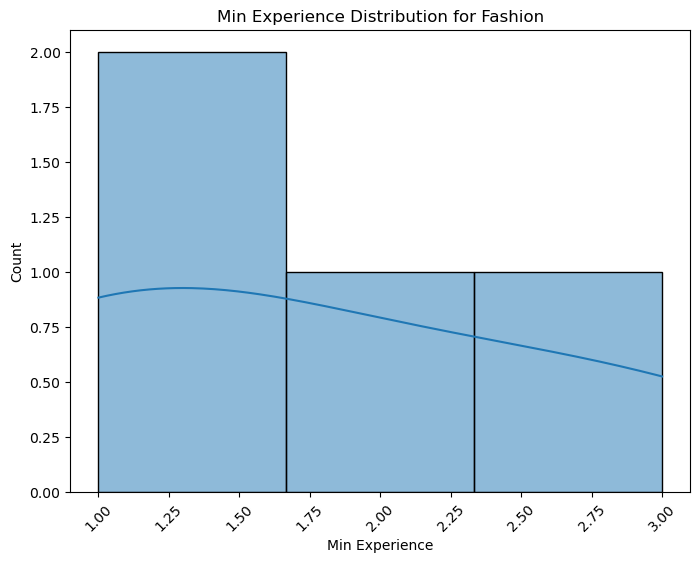

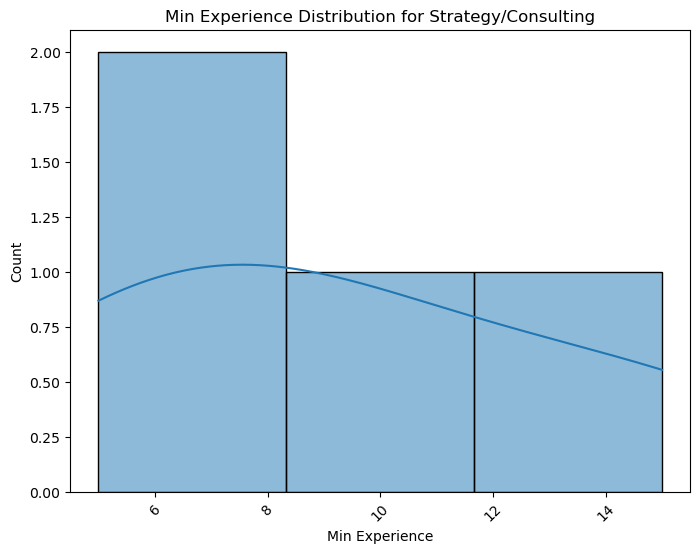

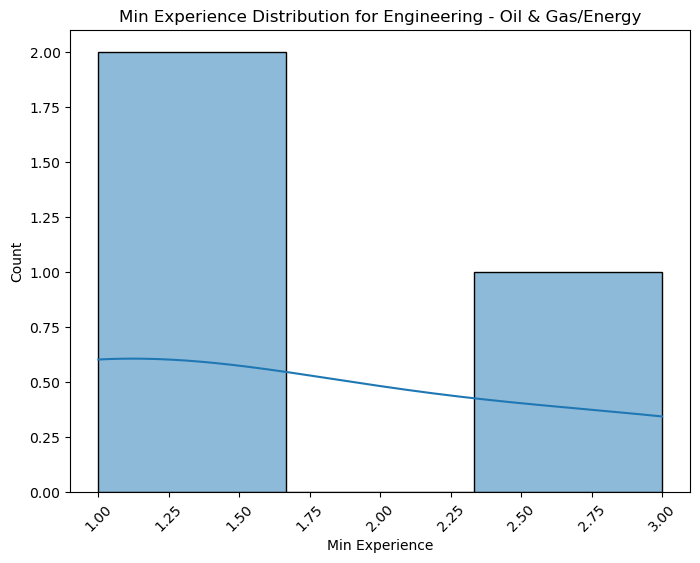

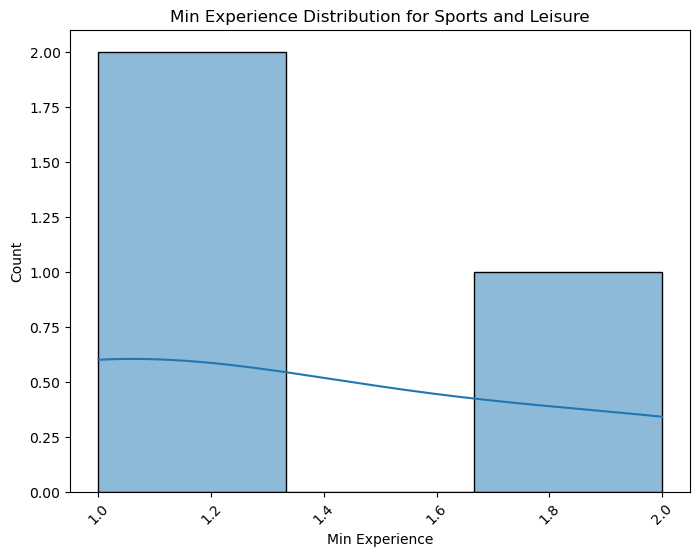

In [72]:
for category in df['Job_Category'].unique():
    # Filter the data for the current category
    category_df = df[df['Job_Category'] == category]

    # Create a histogram for the current category
    plt.figure(figsize=(8, 6))
    sns.histplot(category_df['min_experience'], kde=True)

    # Set the title and labels
    plt.title(f'Min Experience Distribution for {category}')
    plt.xlabel('Min Experience')
    plt.ylabel('Count')

    # Display x-axis values
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


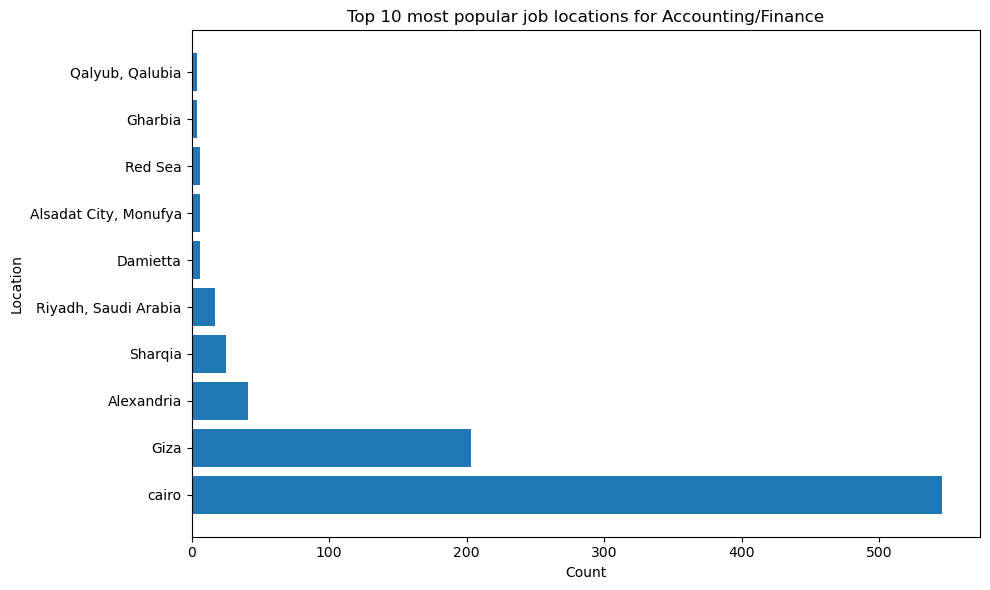

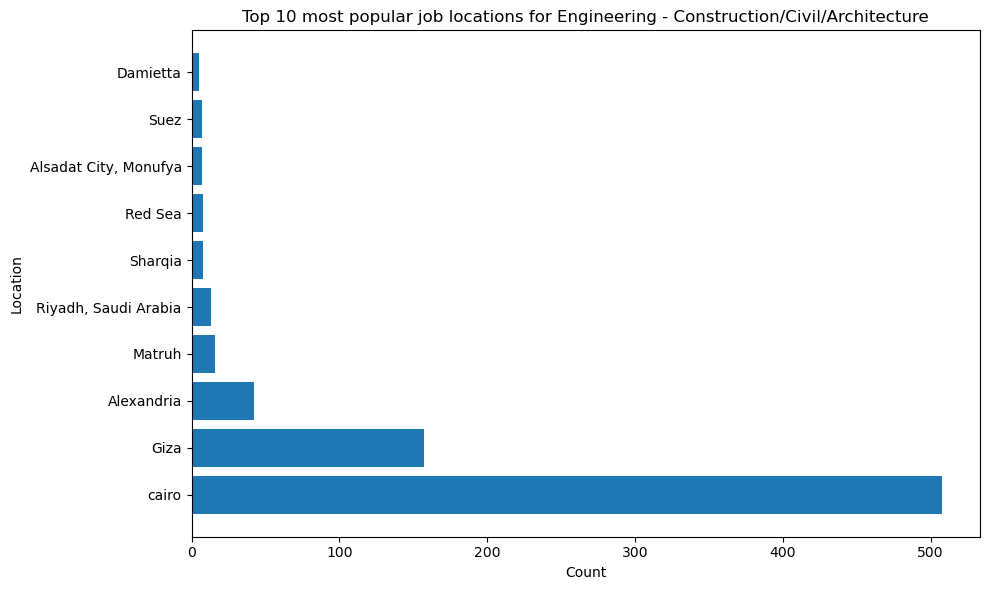

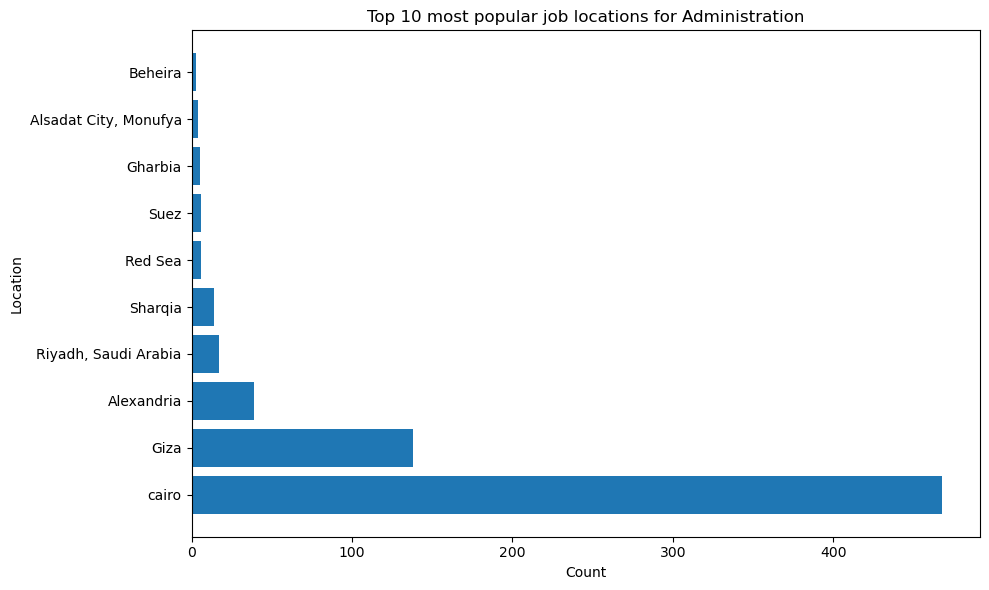

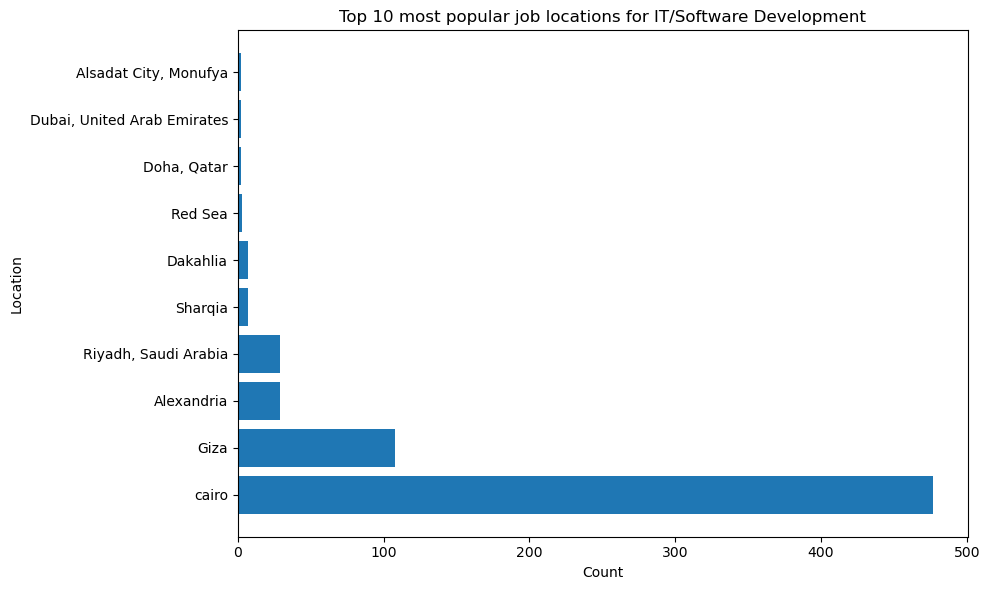

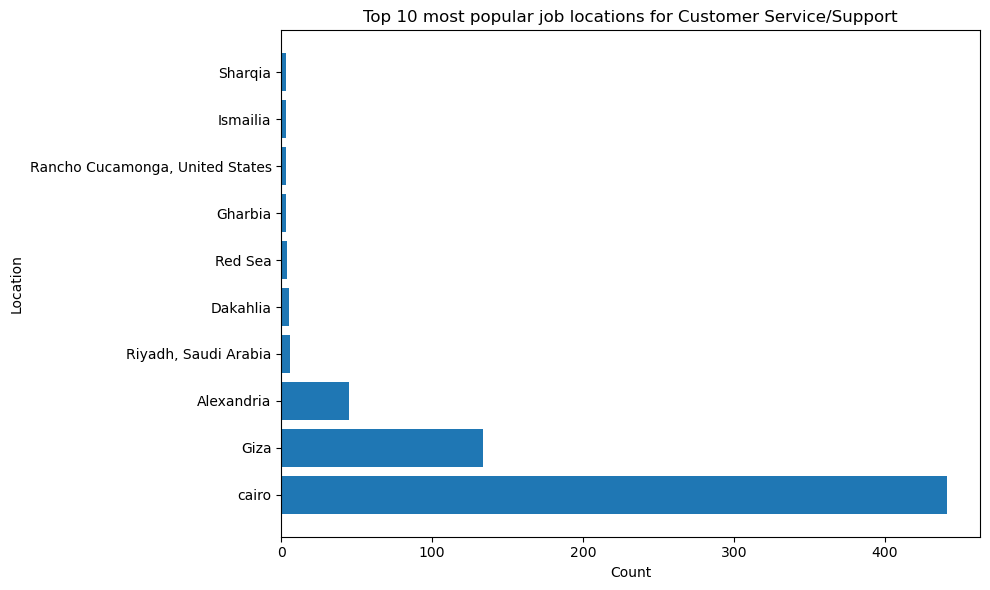

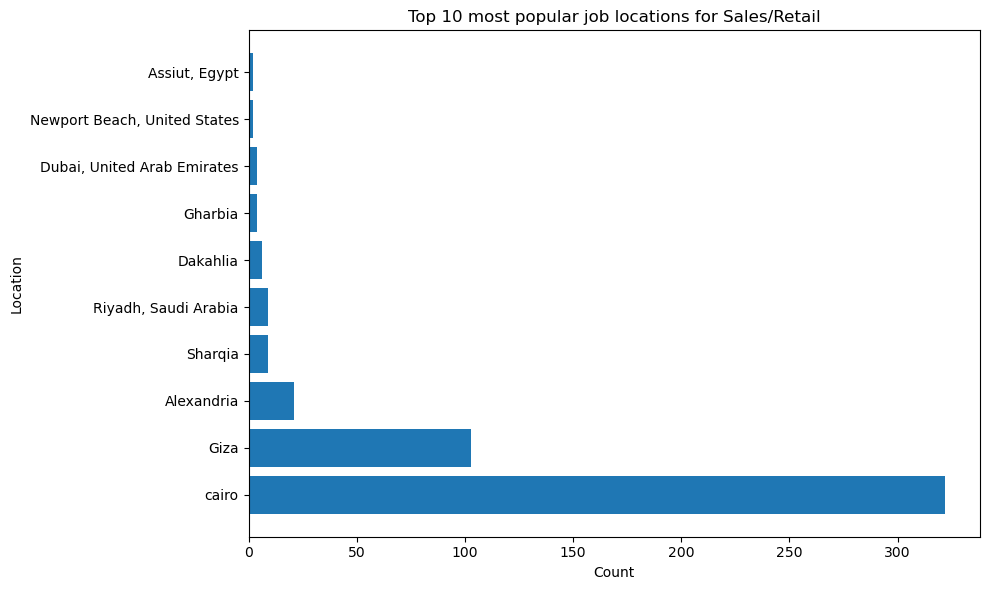

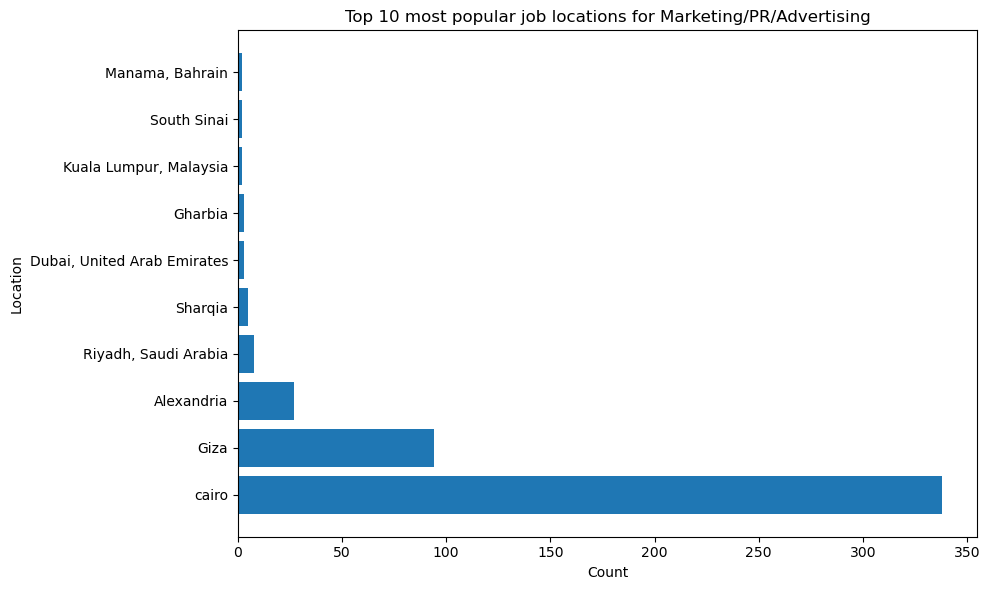

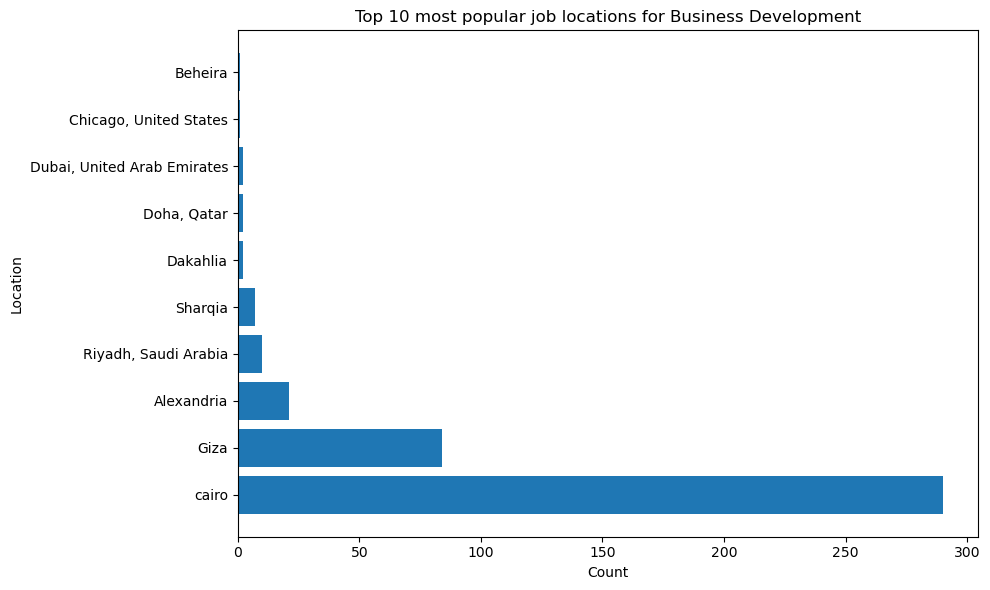

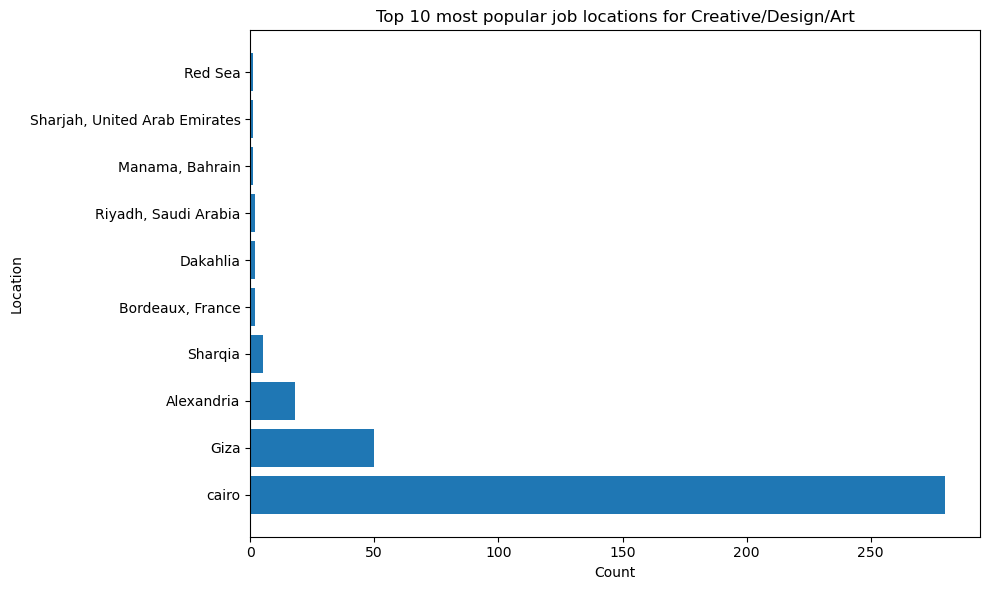

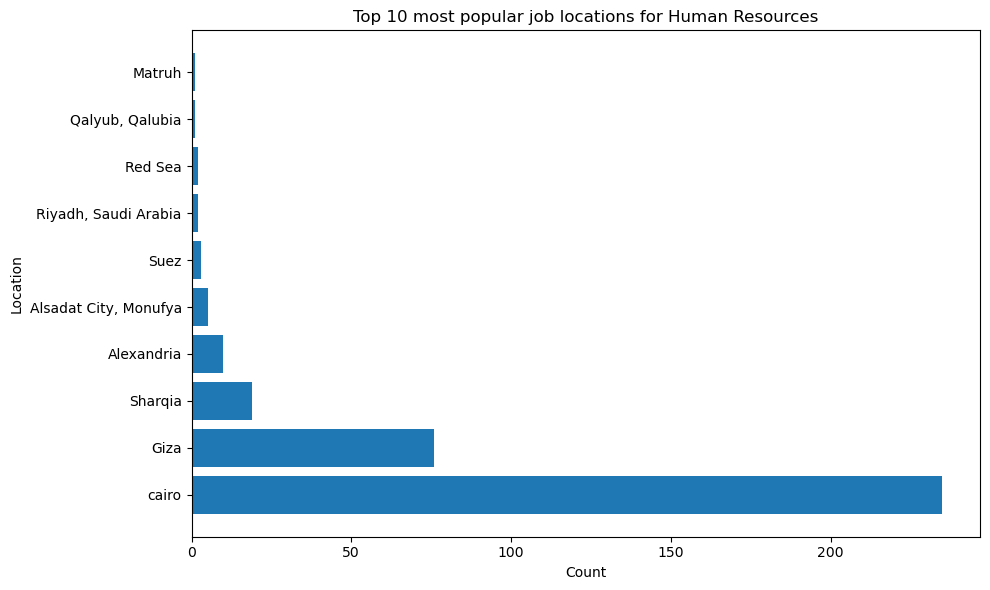

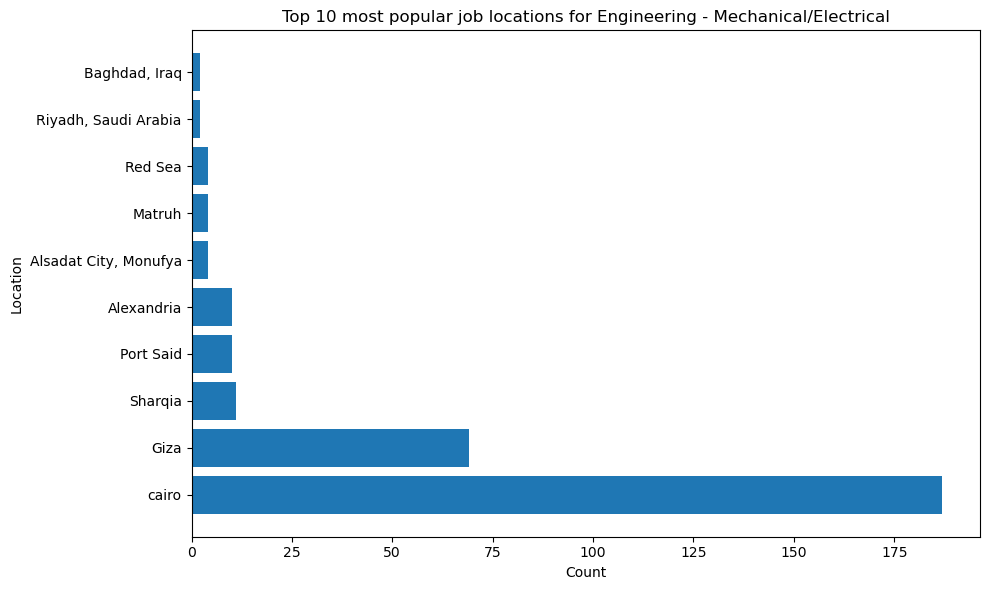

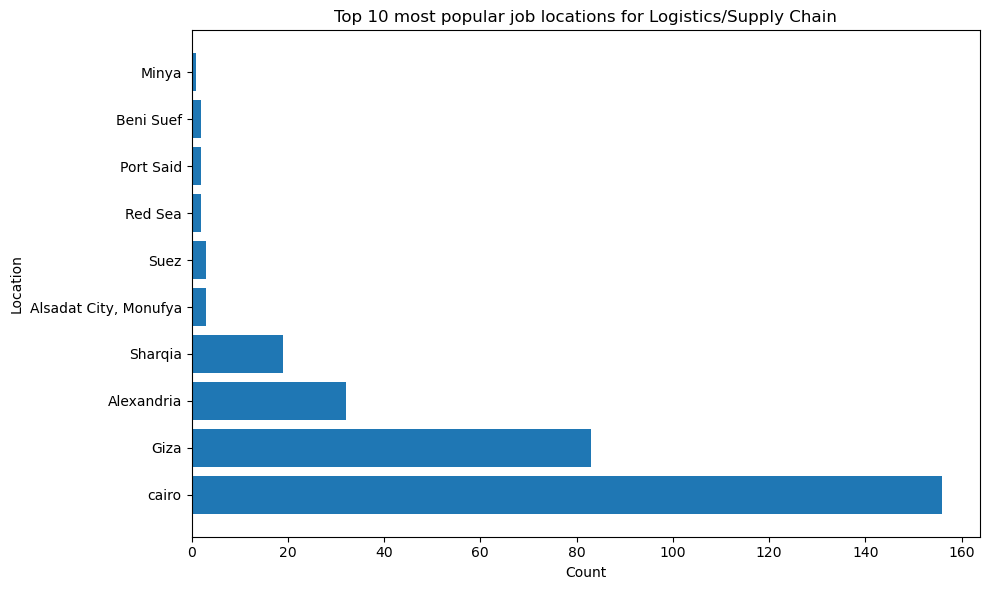

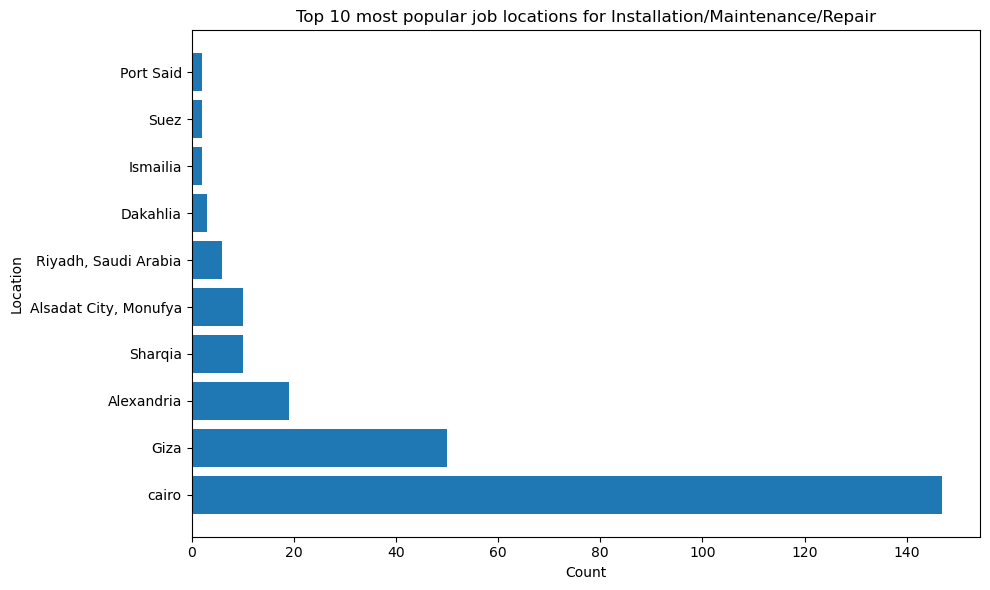

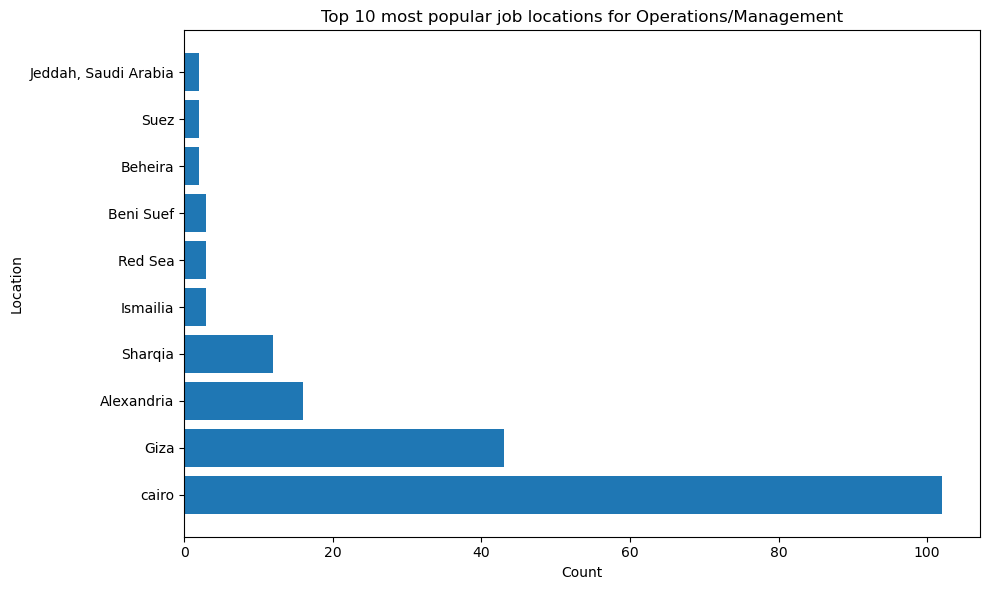

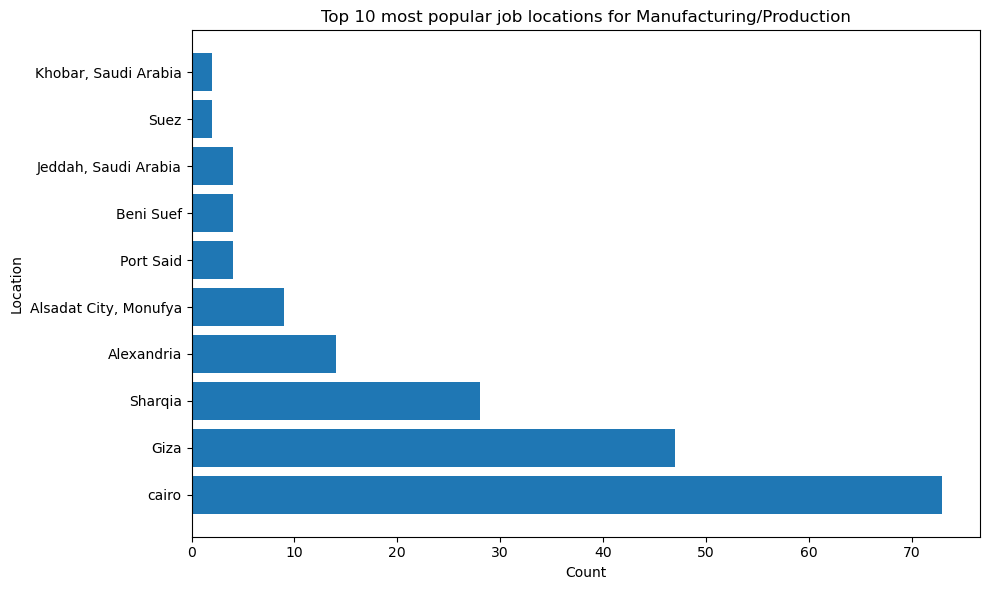

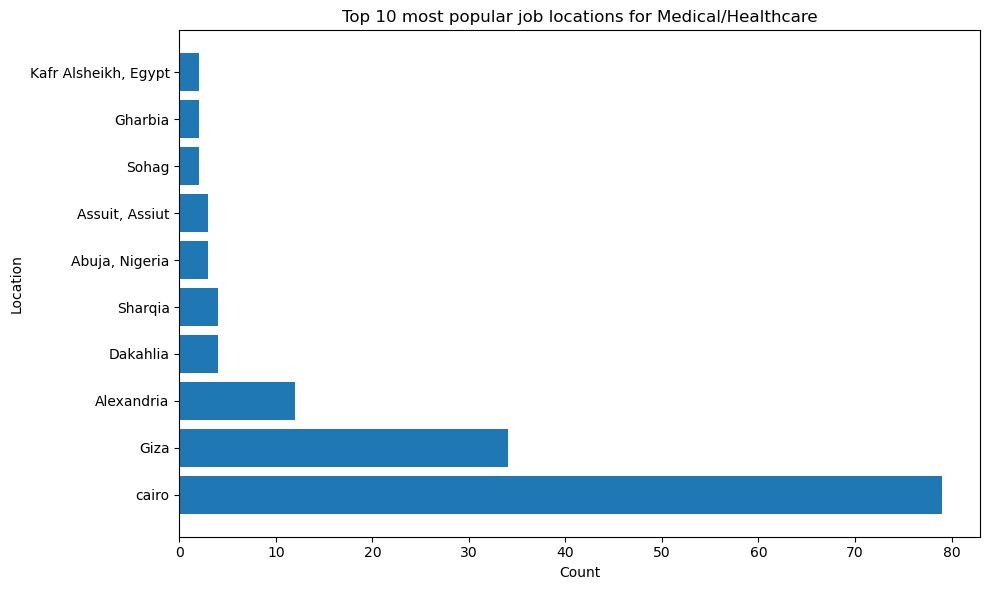

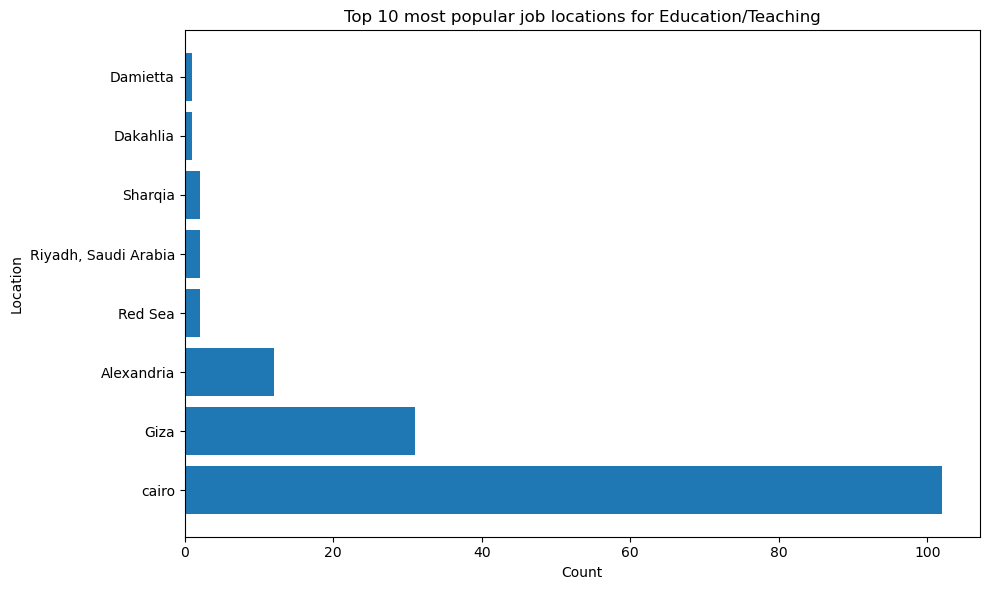

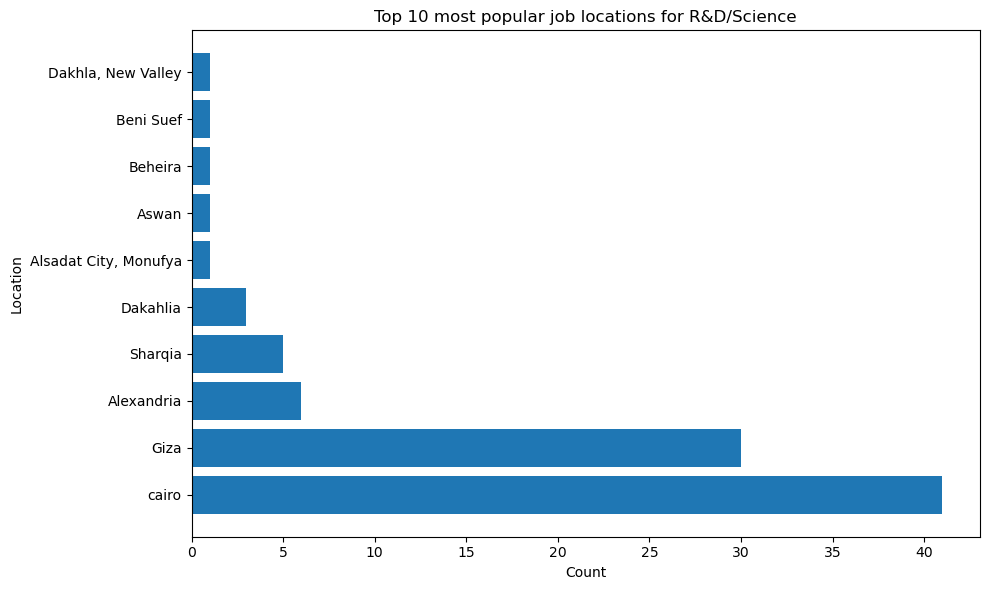

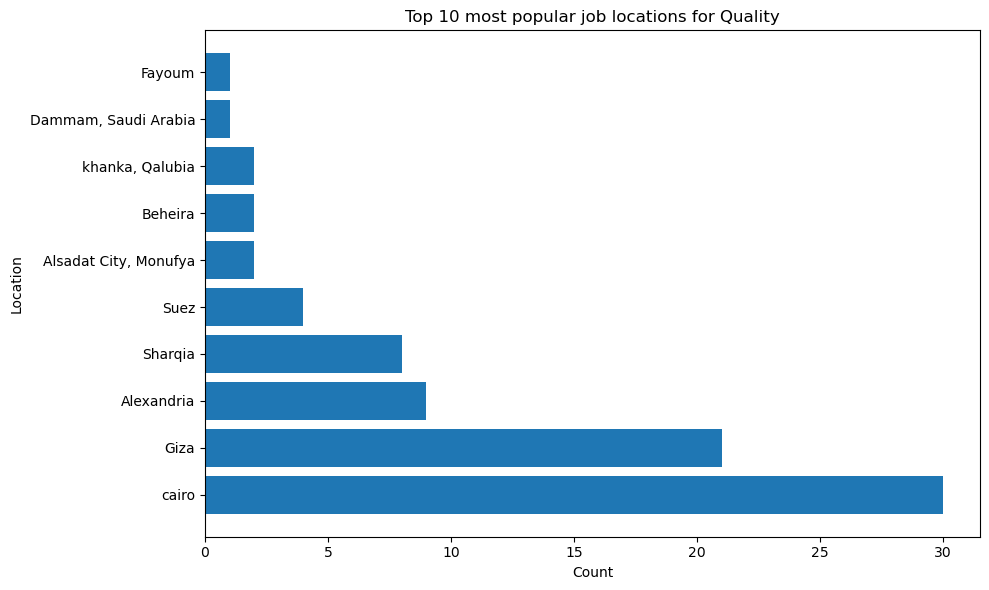

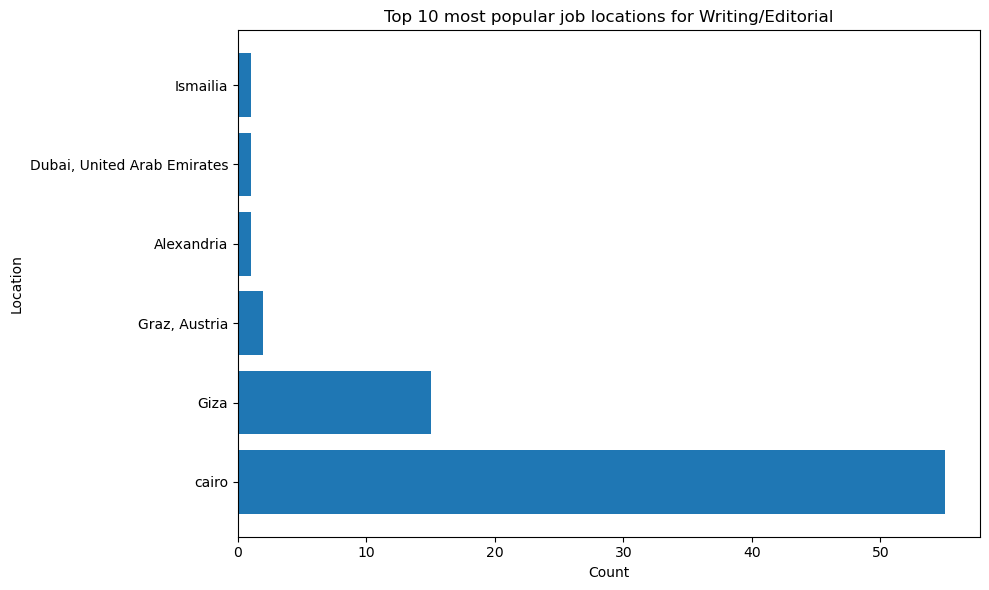

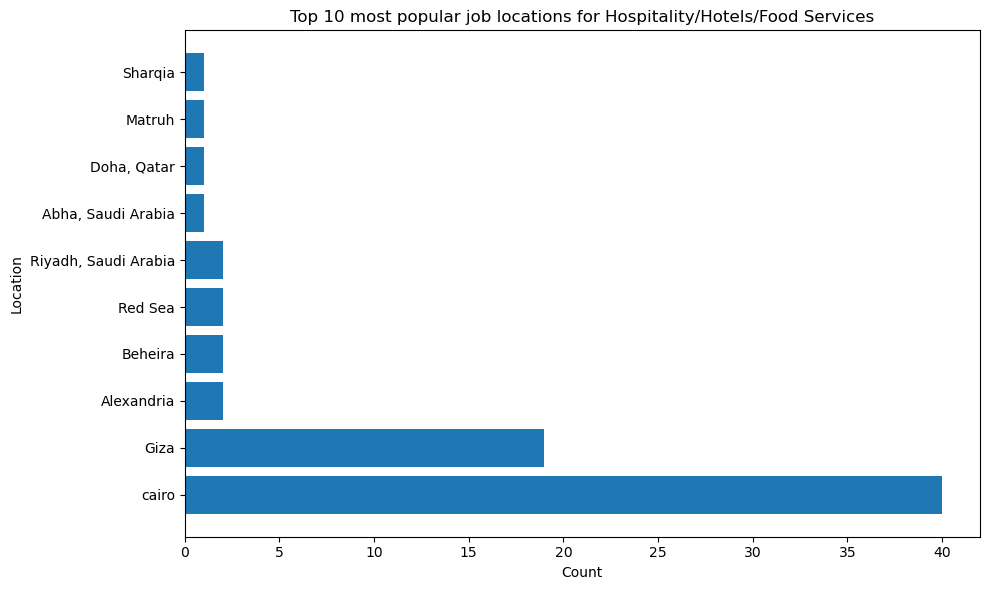

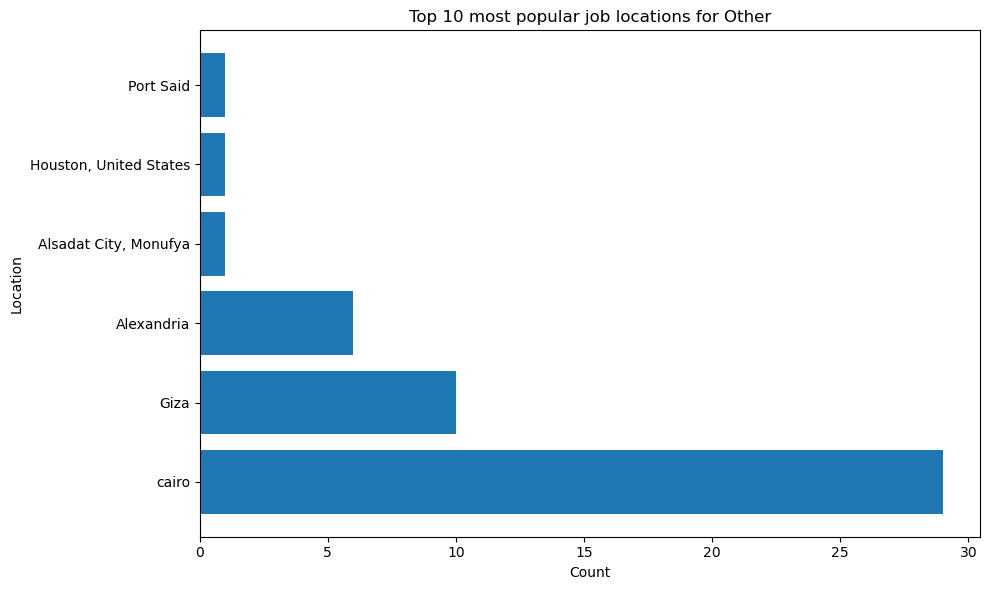

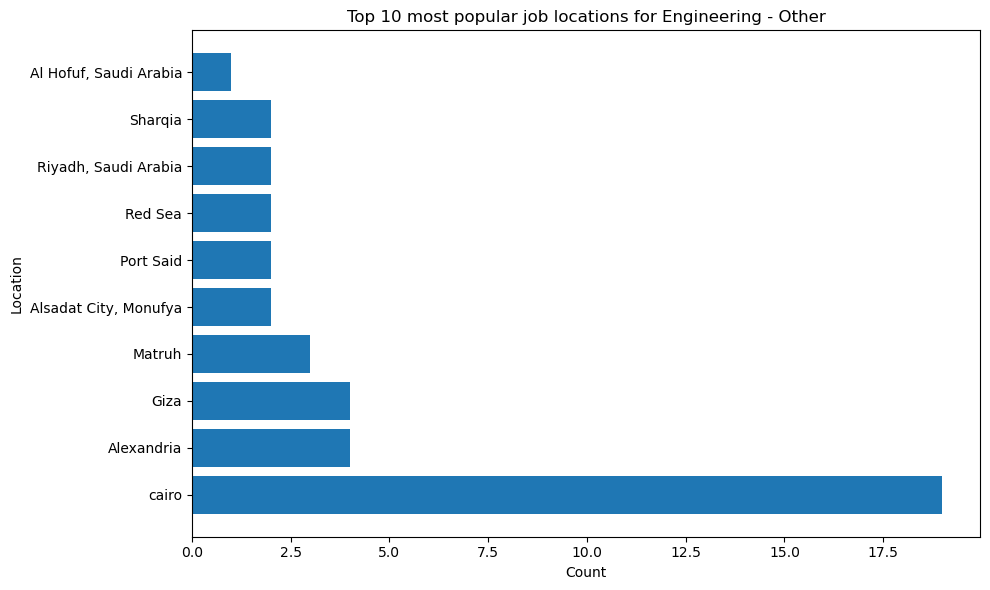

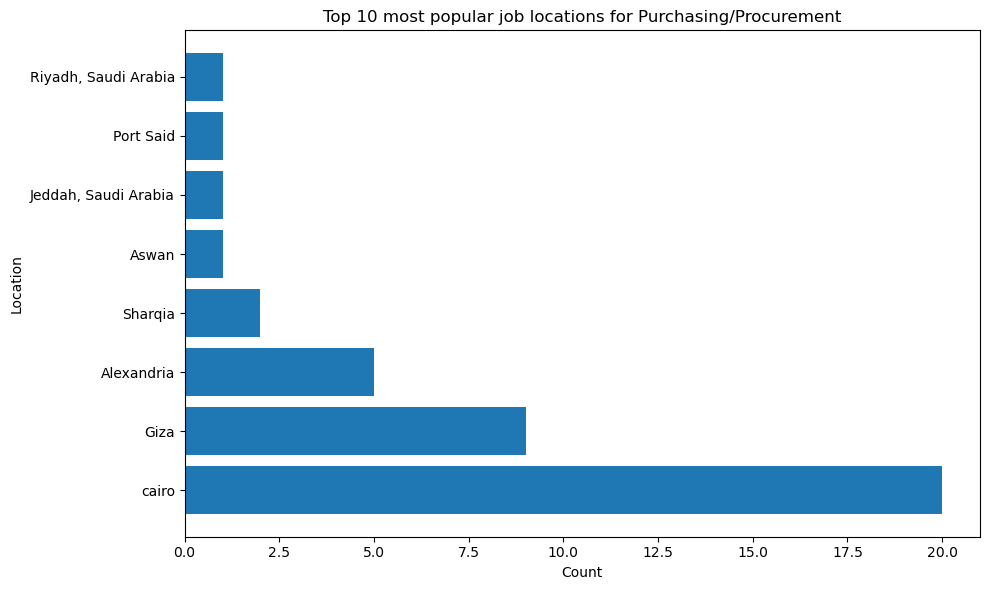

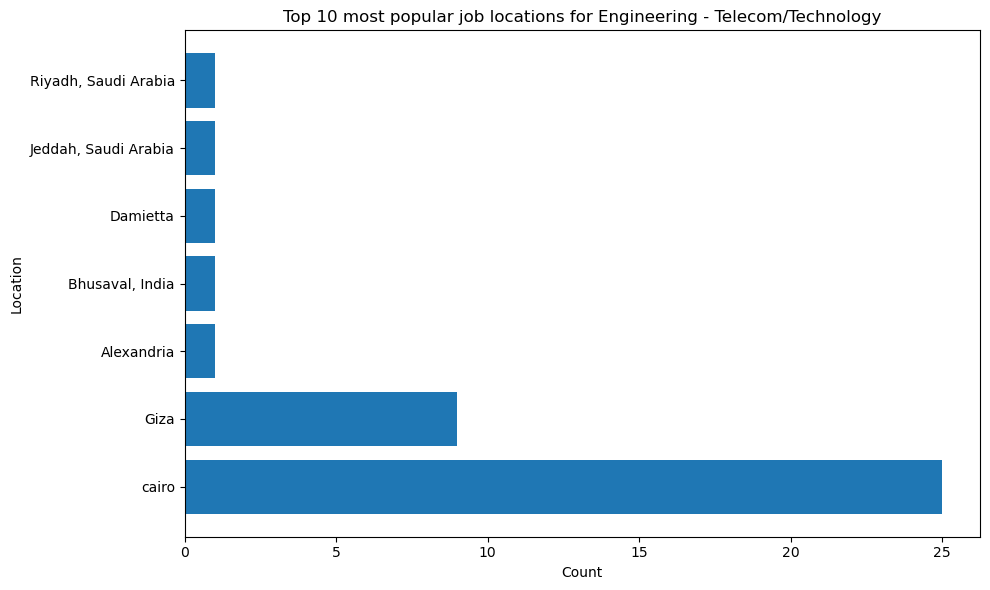

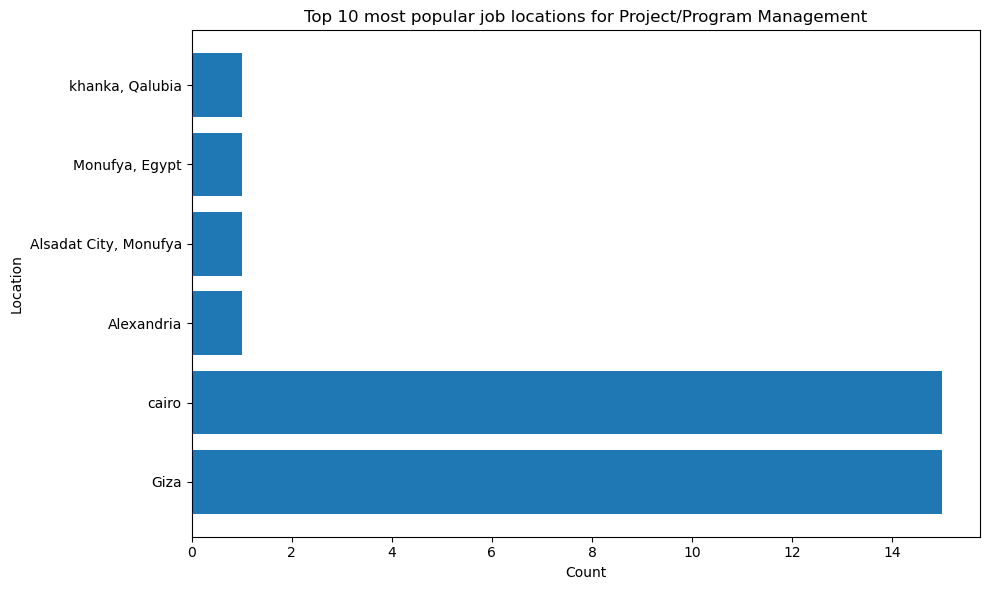

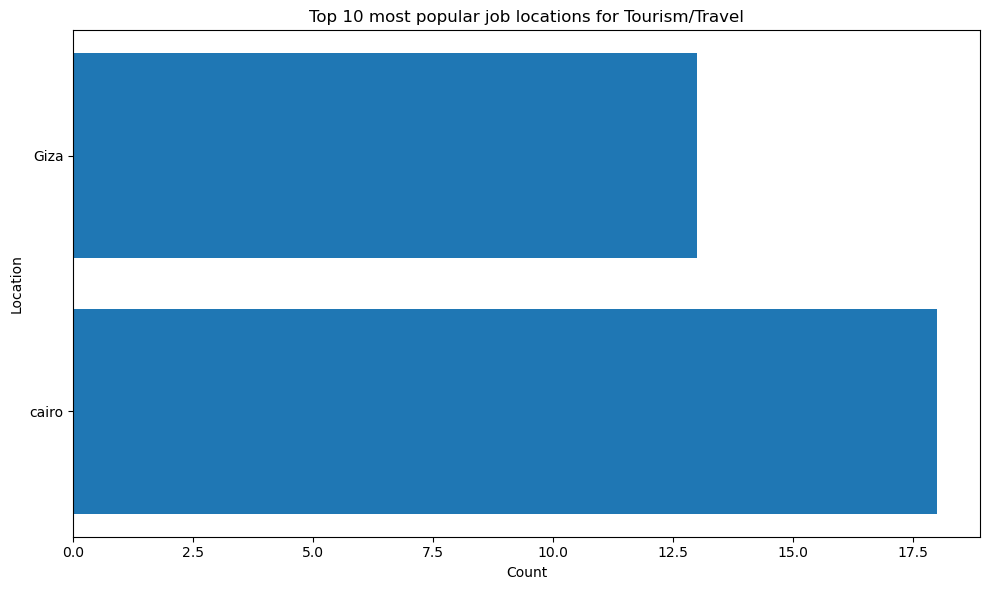

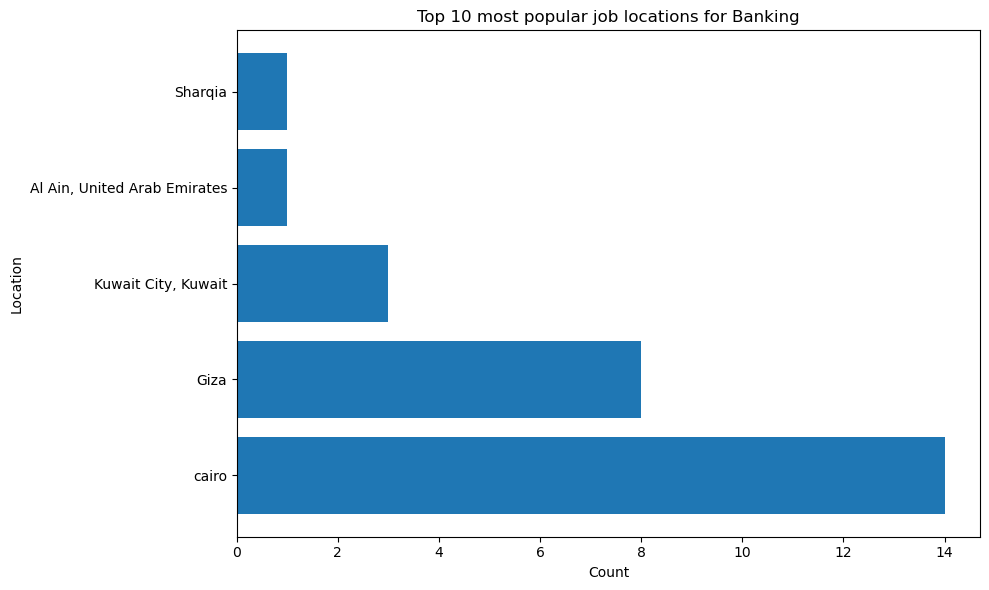

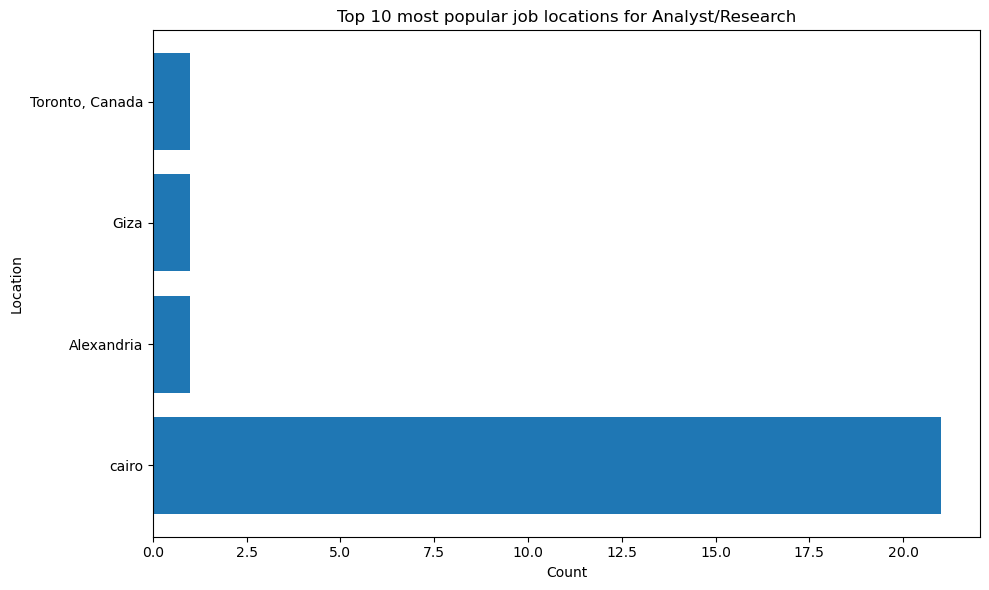

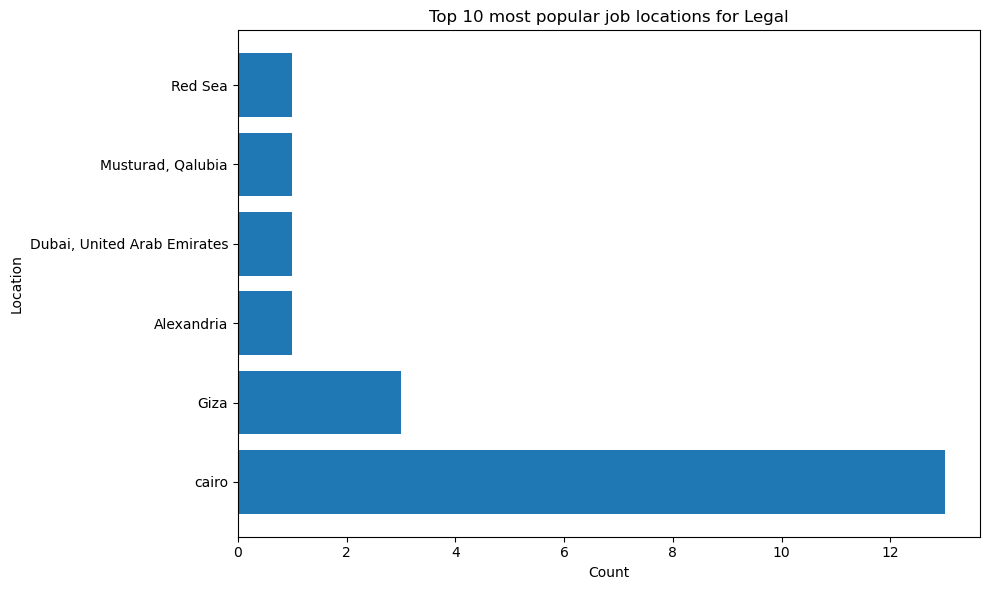

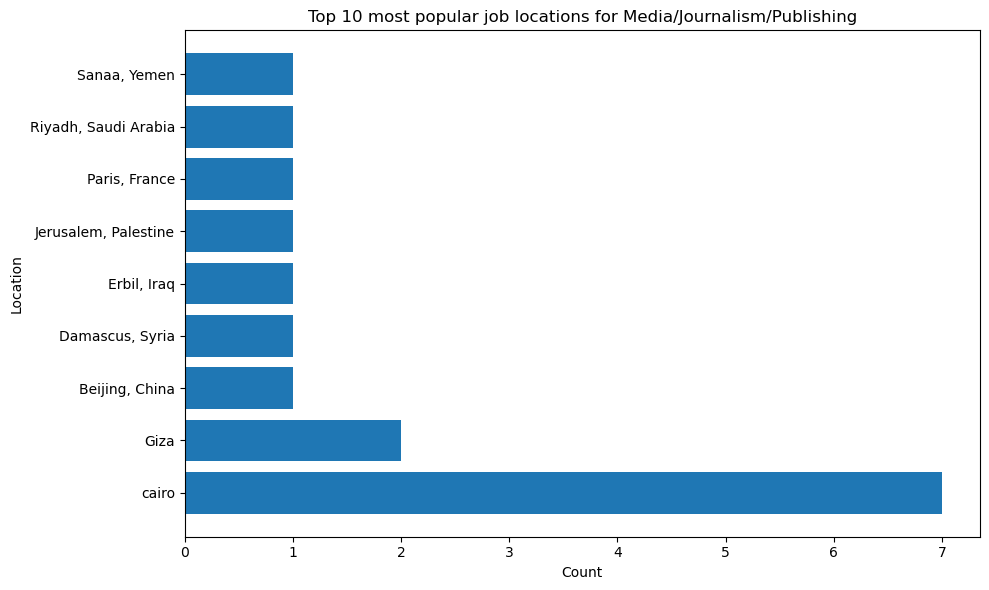

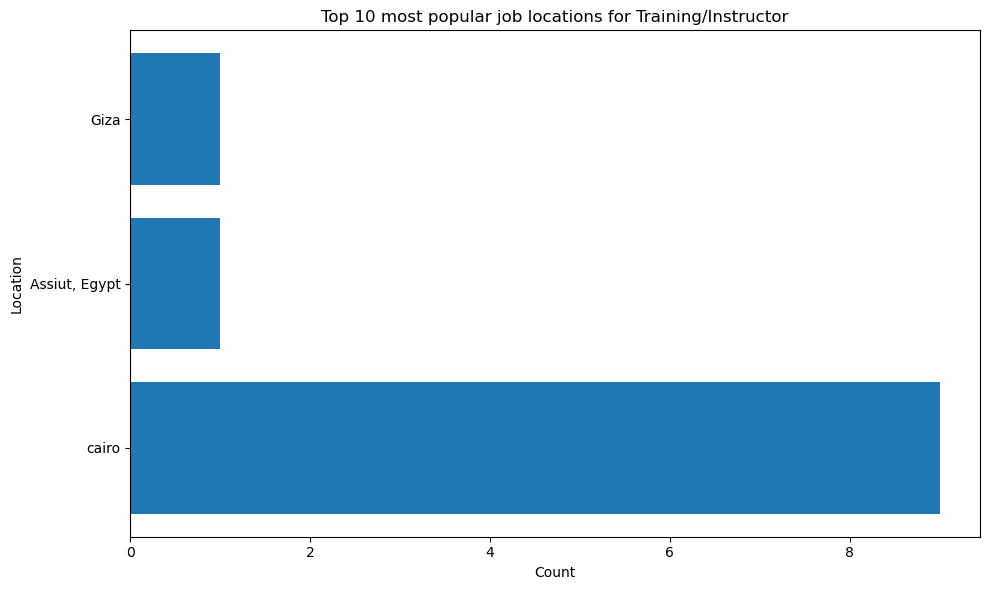

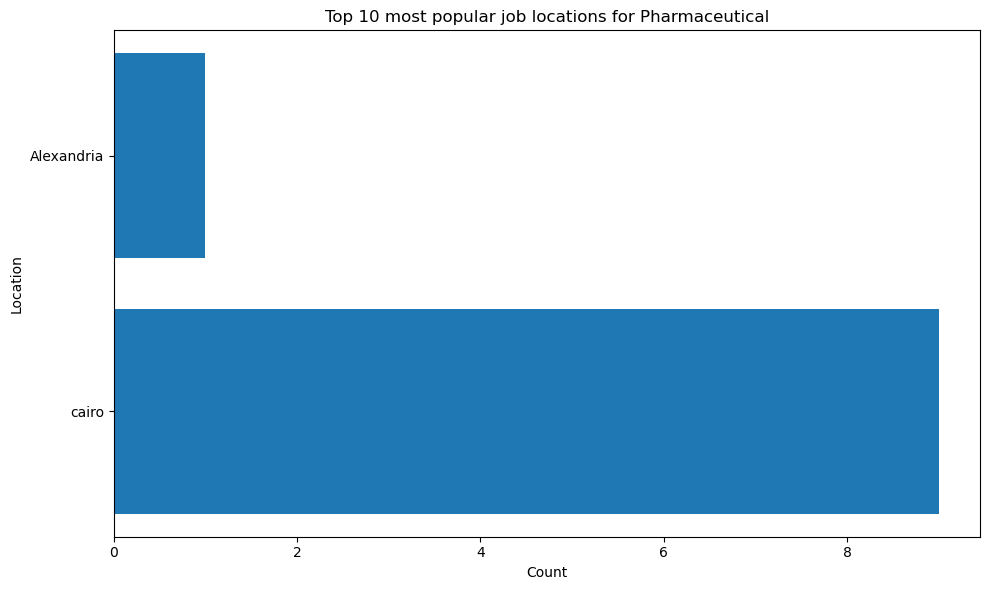

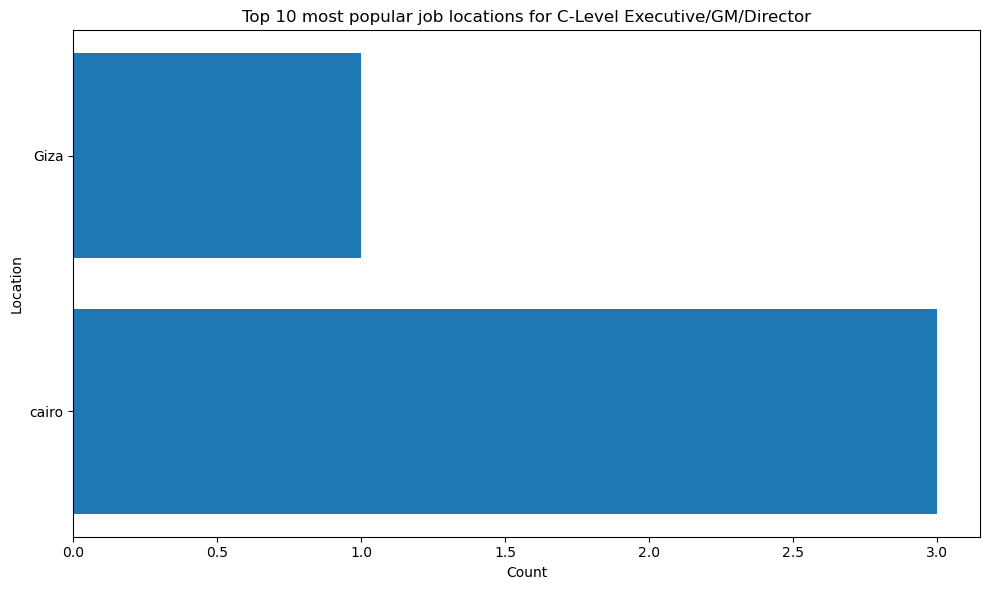

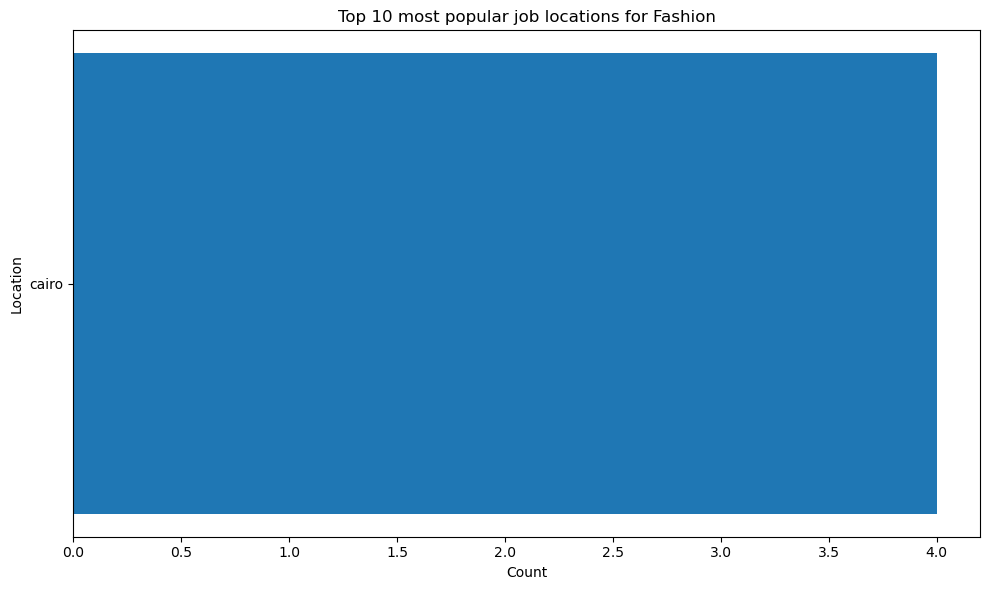

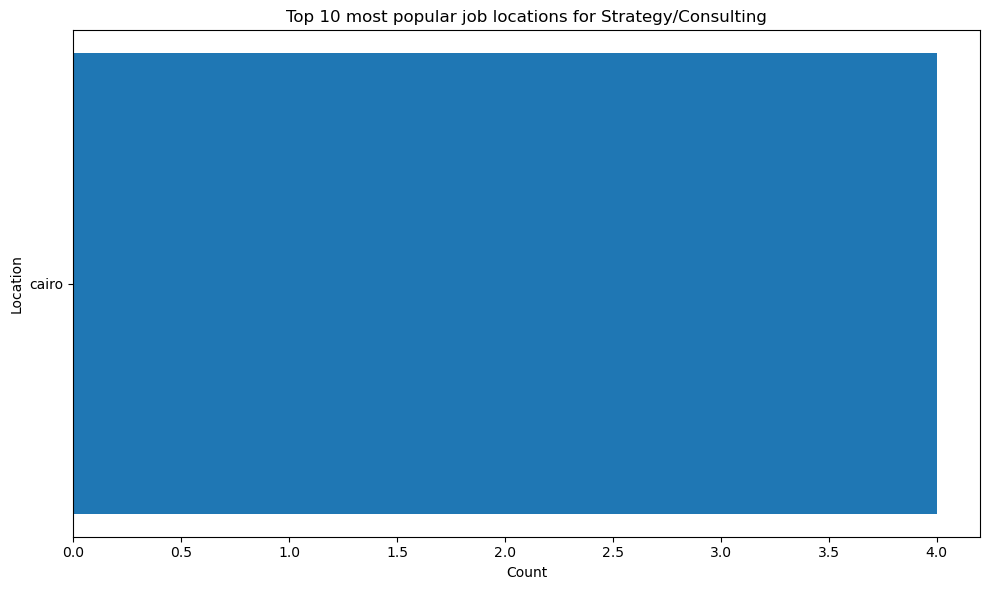

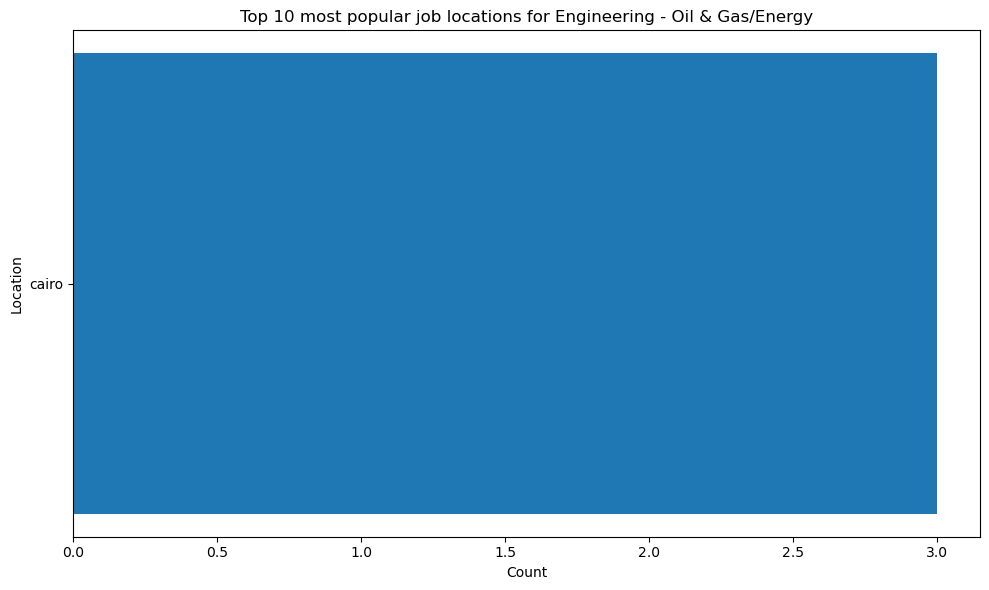

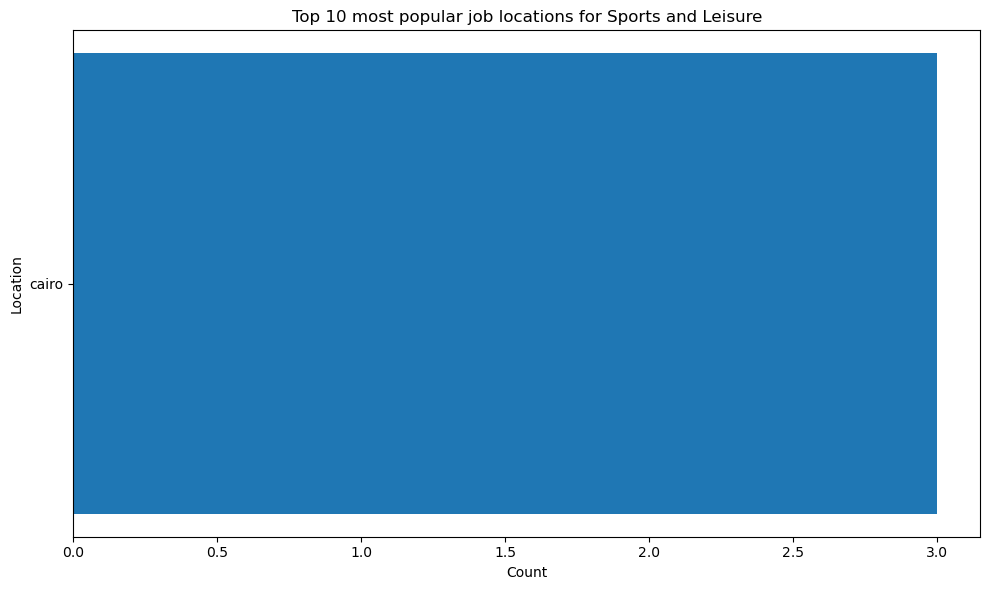

In [73]:
# Group the data by Job_Category and Location
grouped_df = df.groupby(['Job_Category', 'Location']).size().reset_index(name='Count')

# Loop through each Job_Category
for category in df['Job_Category'].unique():
    # Filter the data for the current category
    category_df = grouped_df[grouped_df['Job_Category'] == category]

    # Sort the data by Count in descending order
    sorted_df = category_df.sort_values(by='Count', ascending=False).head(10)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_df['Location'], sorted_df['Count'])
    plt.title(f'Top 10 most popular job locations for {category}')
    plt.xlabel('Count')
    plt.ylabel('Location')
    plt.tight_layout()
    plt.show()


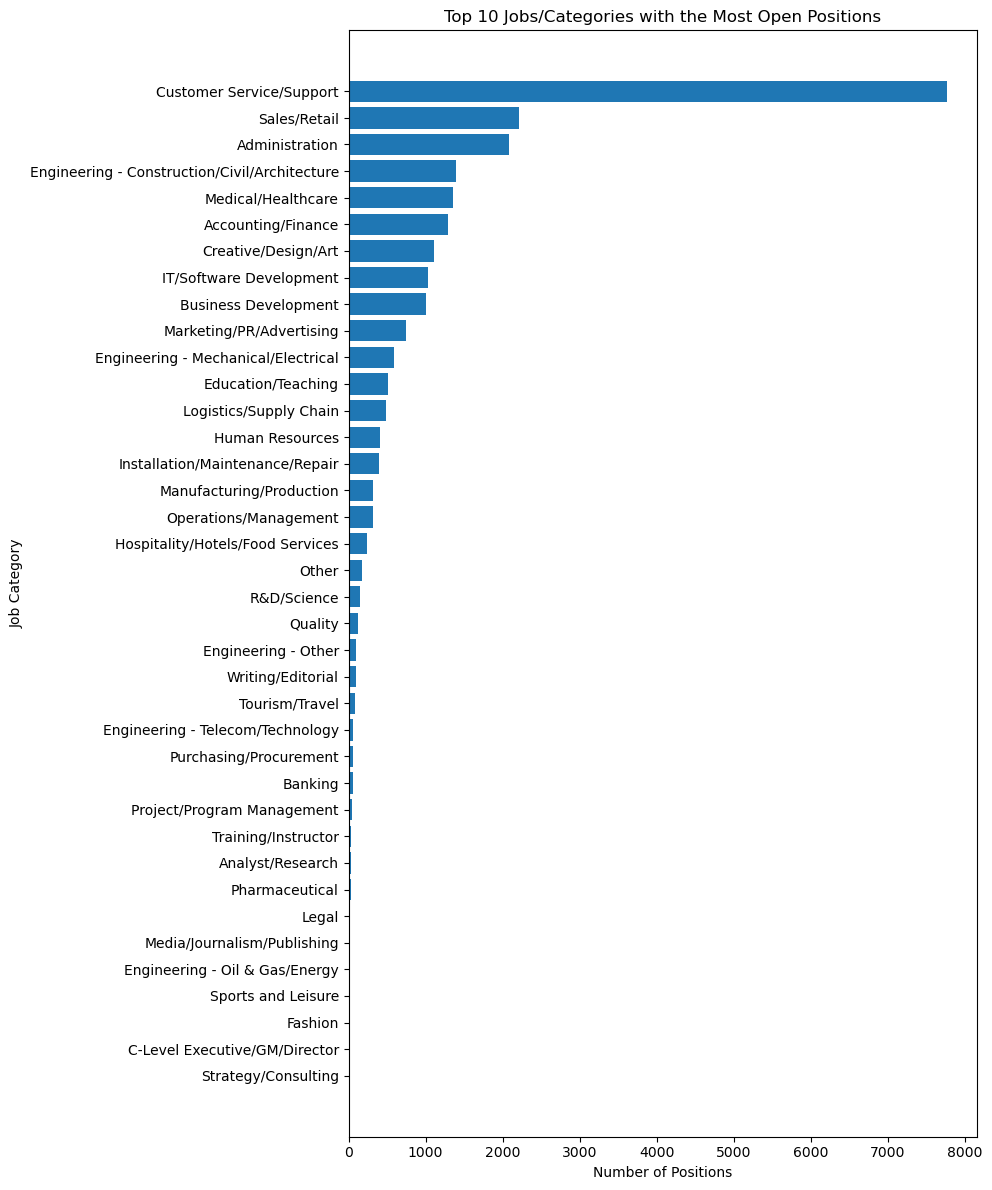

In [74]:
# Group the data by Job_Category and calculate the total number of positions
grouped_df = df.groupby('Job_Category')['Number_of_Positions'].sum().reset_index()

# Sort the data by total number of positions in descending order
sorted_df = grouped_df.sort_values(by='Number_of_Positions', ascending=False)

# Draw a flipped bar plot
plt.figure(figsize=(10, 12))
plt.barh(sorted_df['Job_Category'], sorted_df['Number_of_Positions'])
plt.title('Top 10 Jobs/Categories with the Most Open Positions')
plt.xlabel('Number of Positions')
plt.ylabel('Job Category')
plt.gca().invert_yaxis()  # Add this line to invert the y-axis
plt.tight_layout()
plt.show()

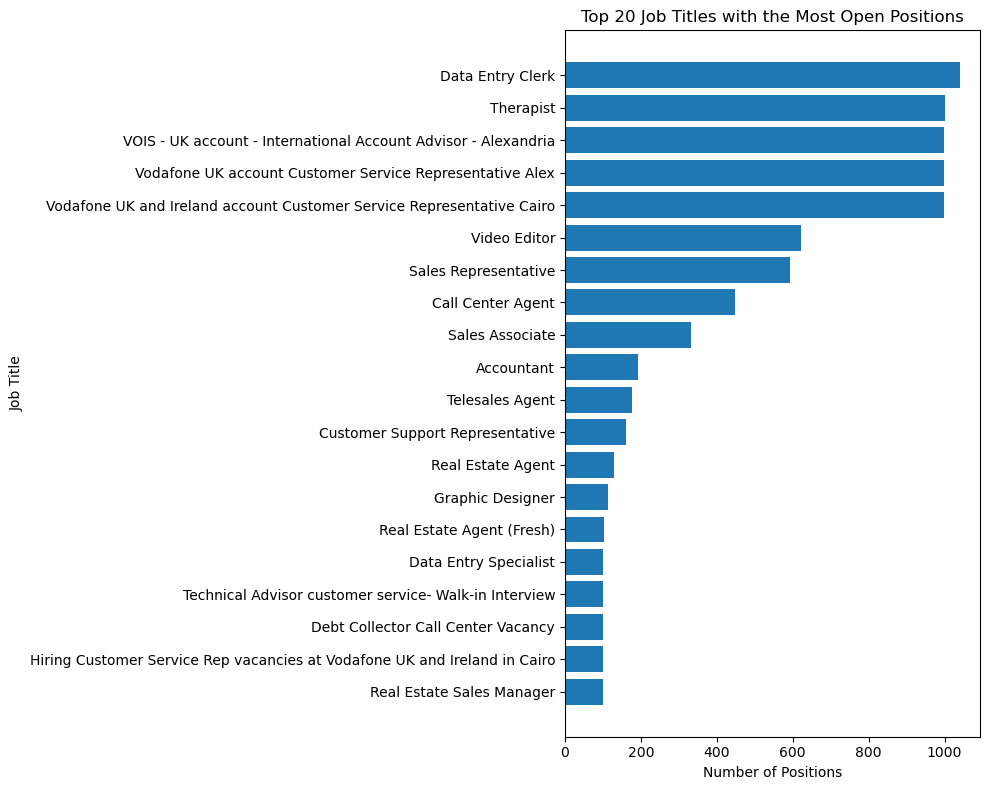

In [75]:
# Group the data by Title and calculate the total number of positions
grouped_df = df.groupby('Title')['Number_of_Positions'].sum().reset_index()

# Sort the data by total number of positions in descending order
sorted_df = grouped_df.sort_values(by='Number_of_Positions', ascending=False)

# Draw a flipped bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_df['Title'].head(20), sorted_df['Number_of_Positions'].head(20))
plt.title('Top 20 Job Titles with the Most Open Positions')
plt.xlabel('Number of Positions')
plt.ylabel('Job Title')
plt.gca().invert_yaxis()  # Add this line to invert the y-axis
plt.tight_layout()
plt.show()

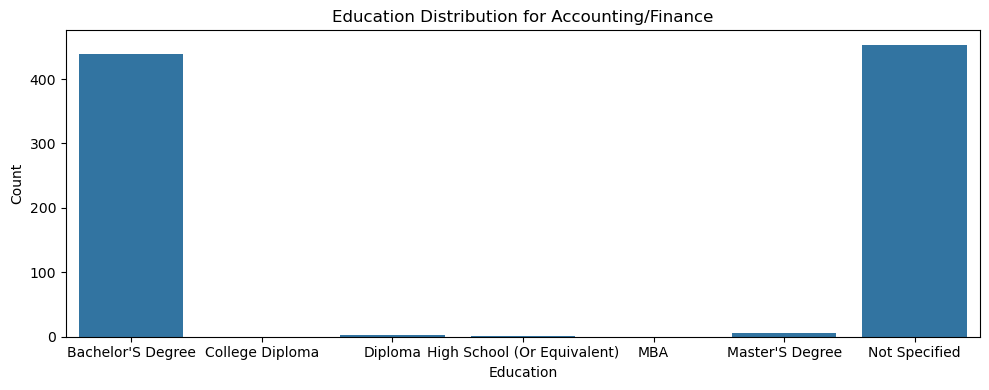

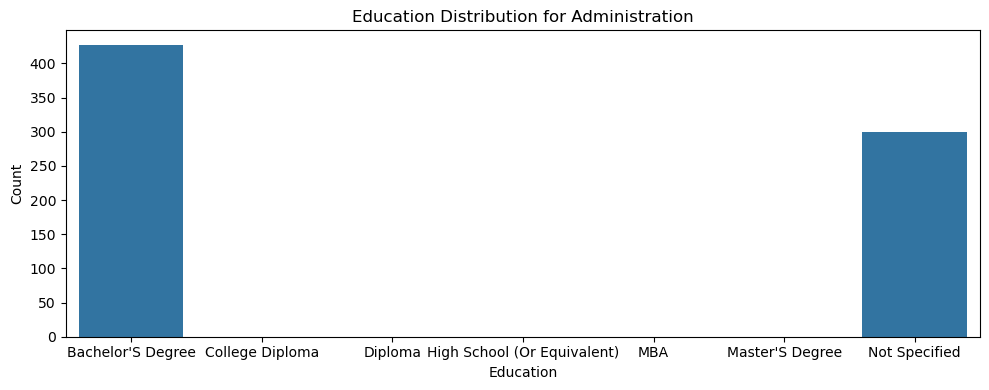

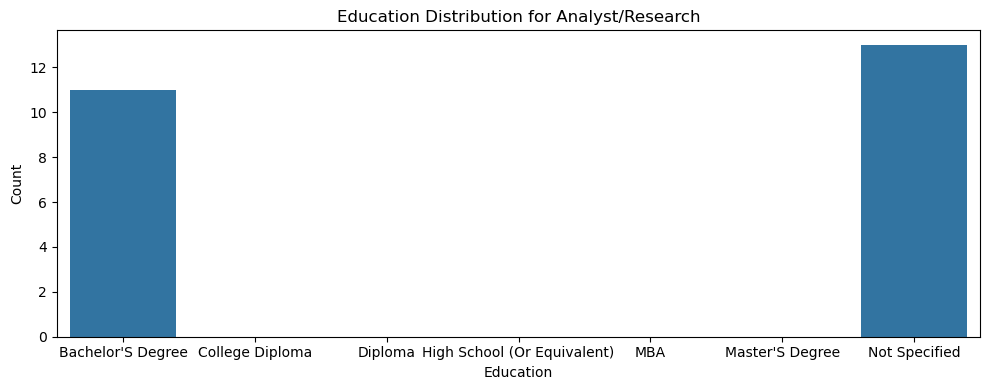

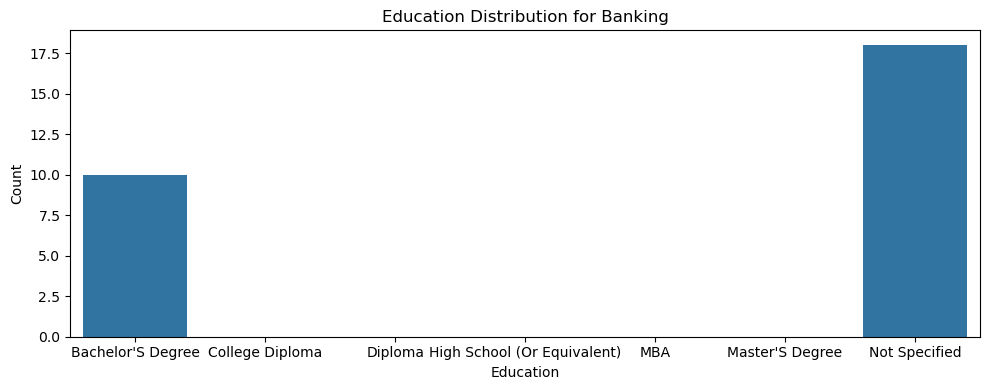

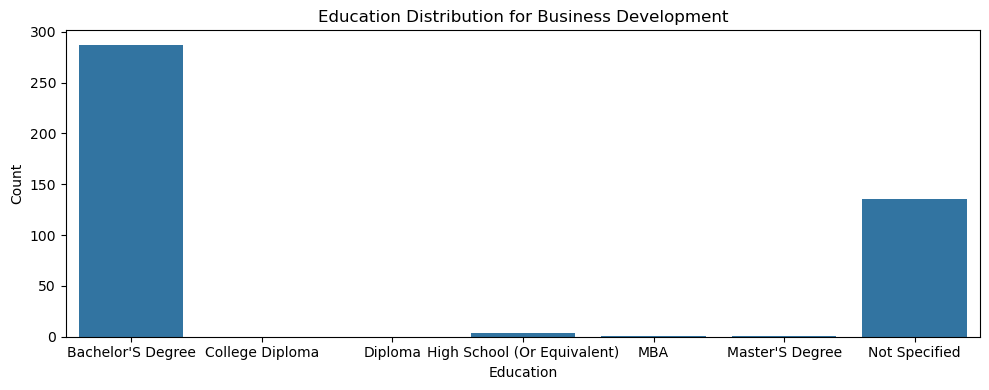

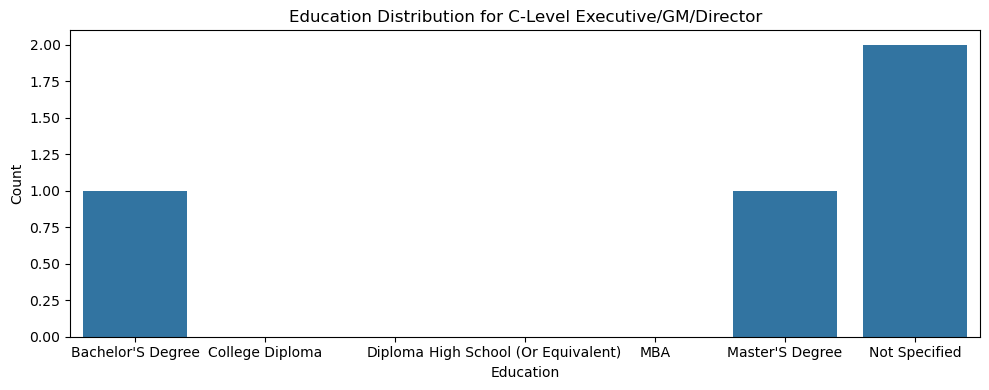

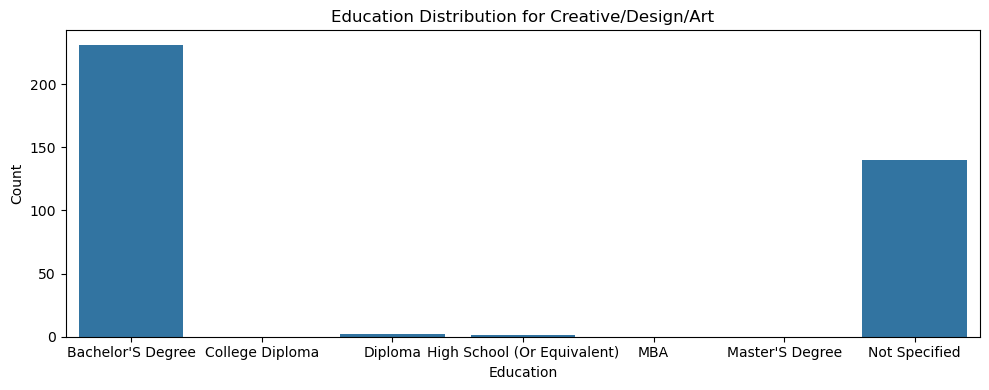

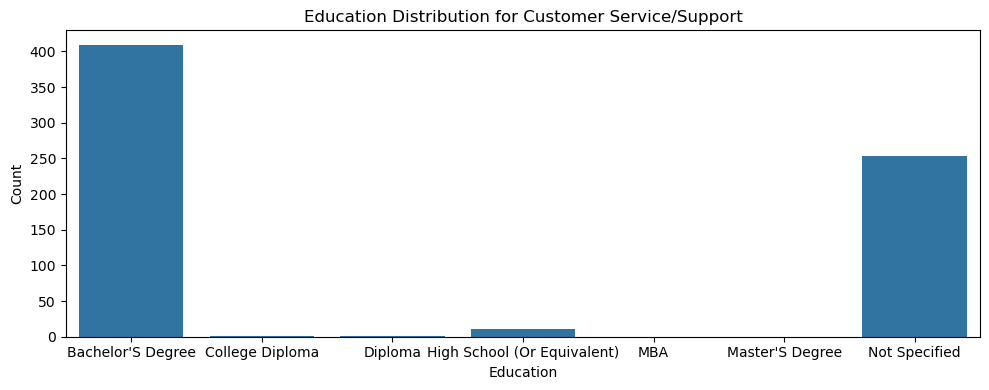

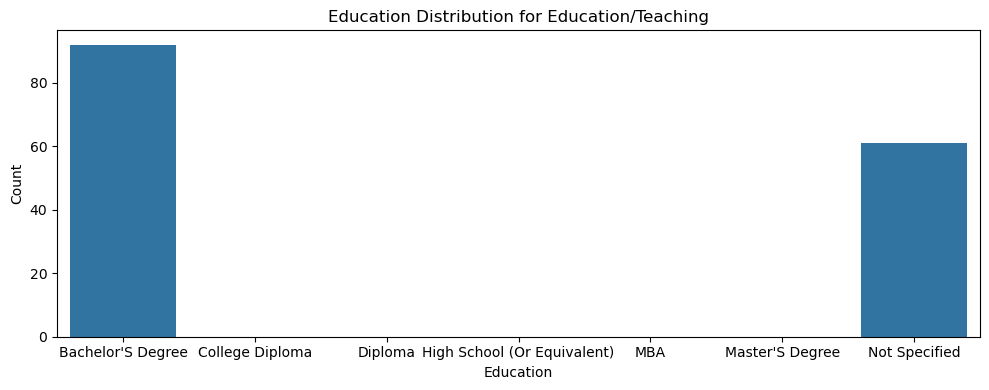

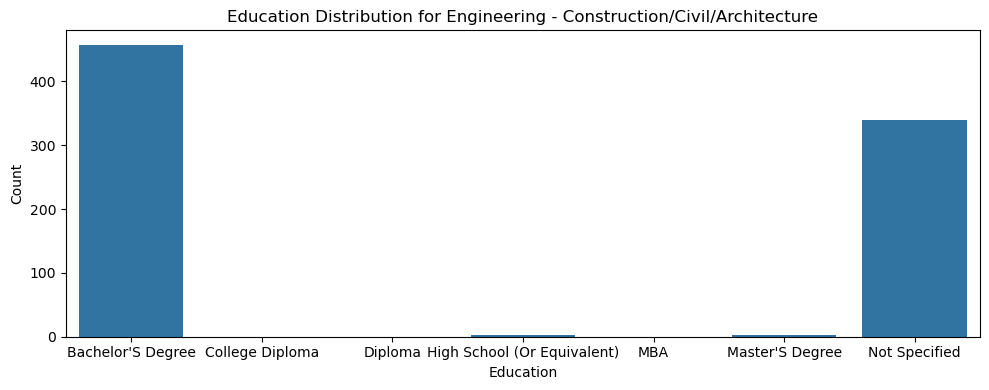

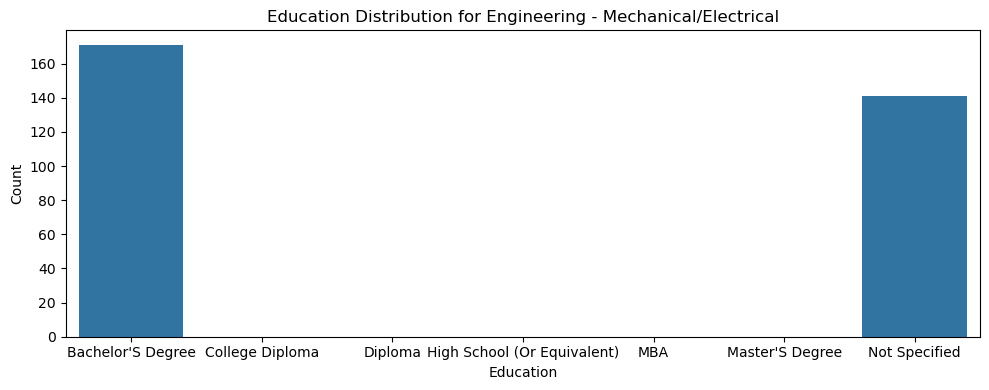

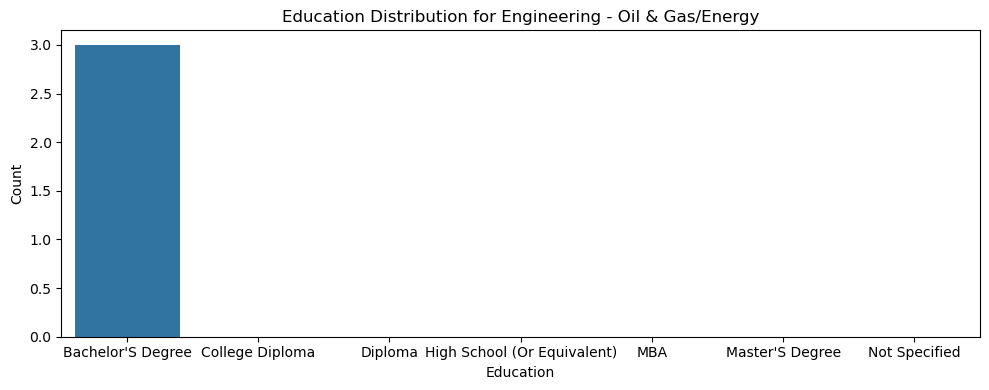

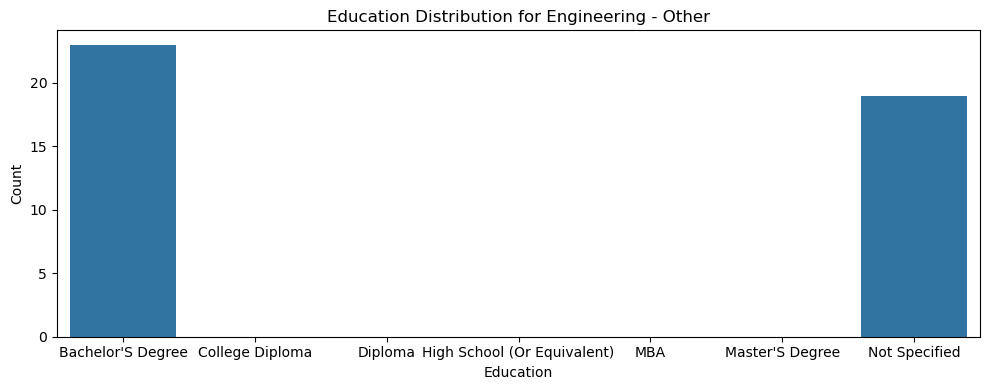

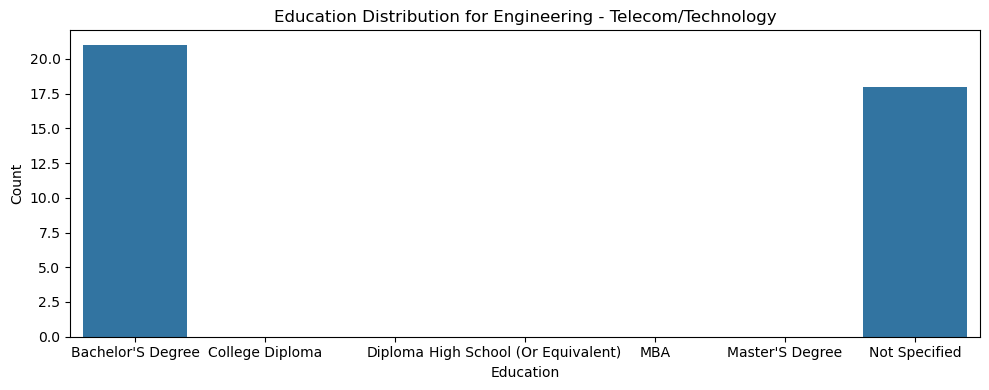

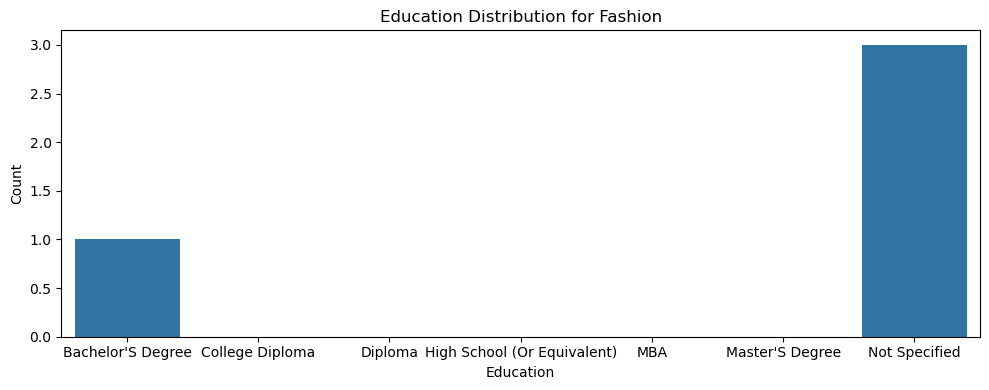

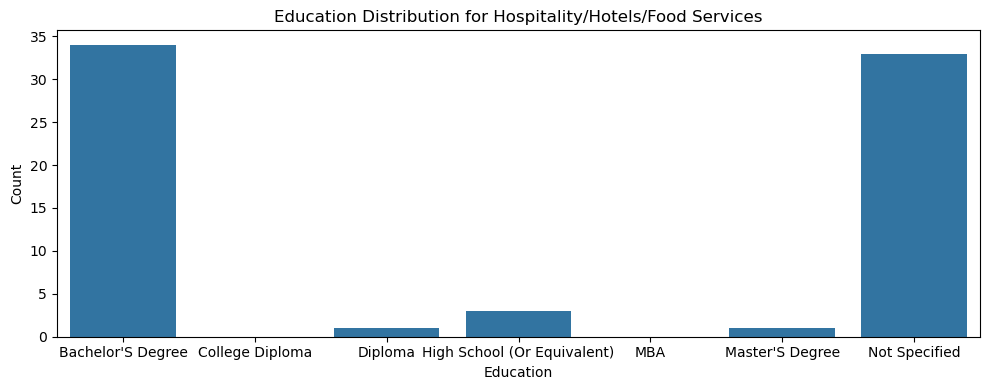

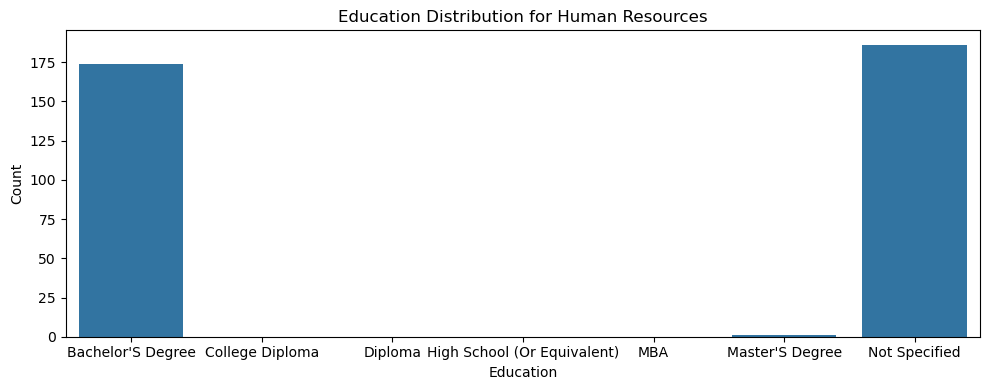

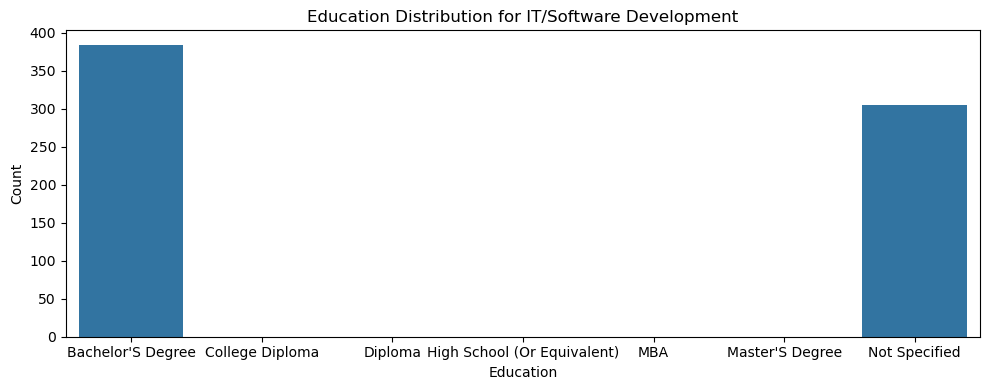

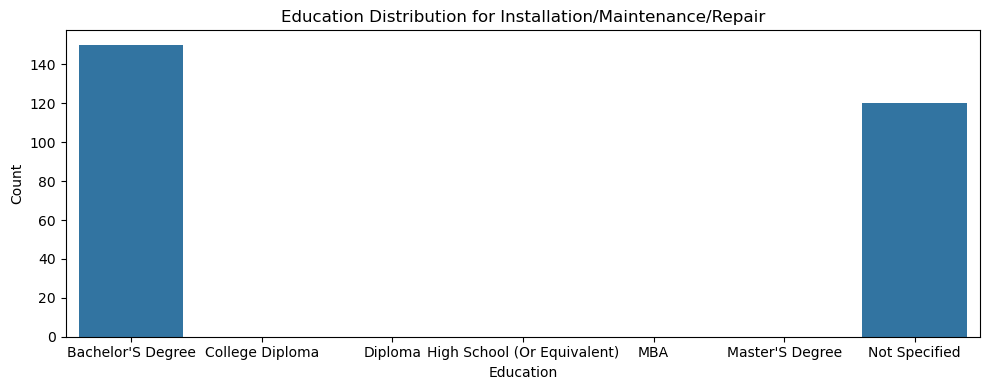

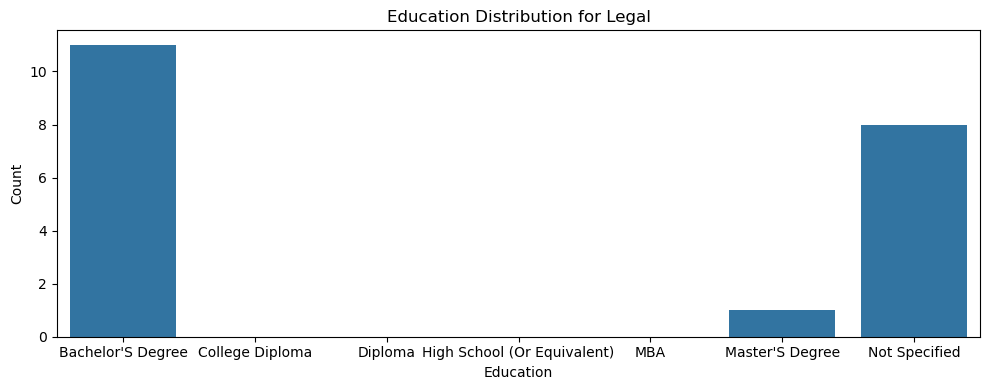

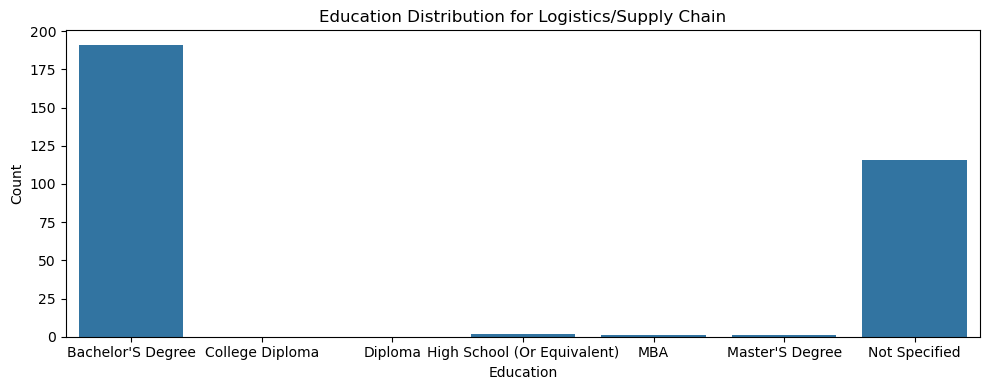

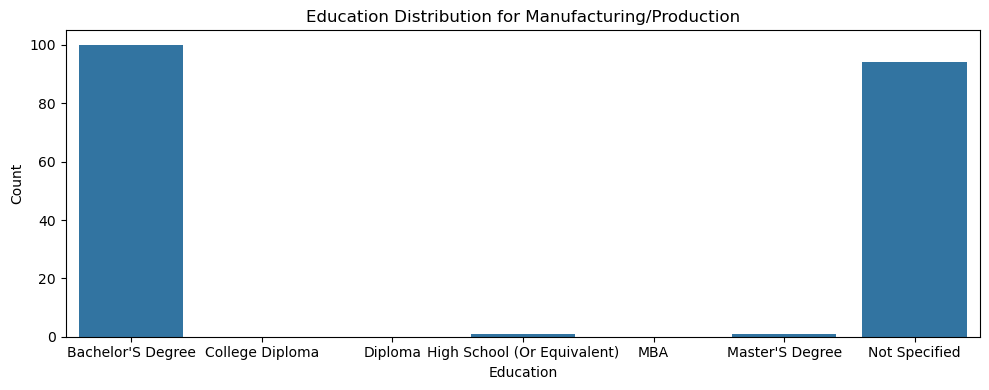

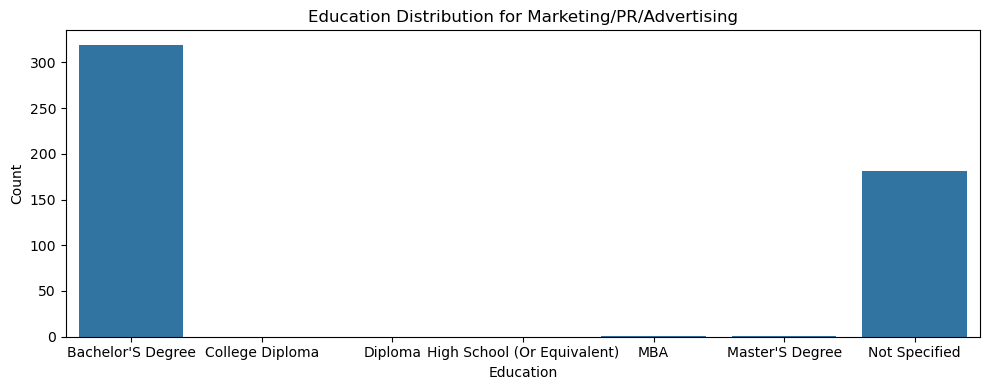

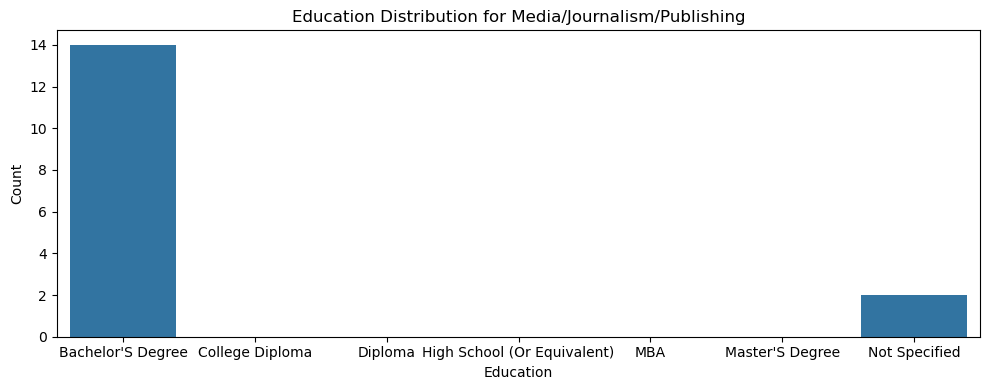

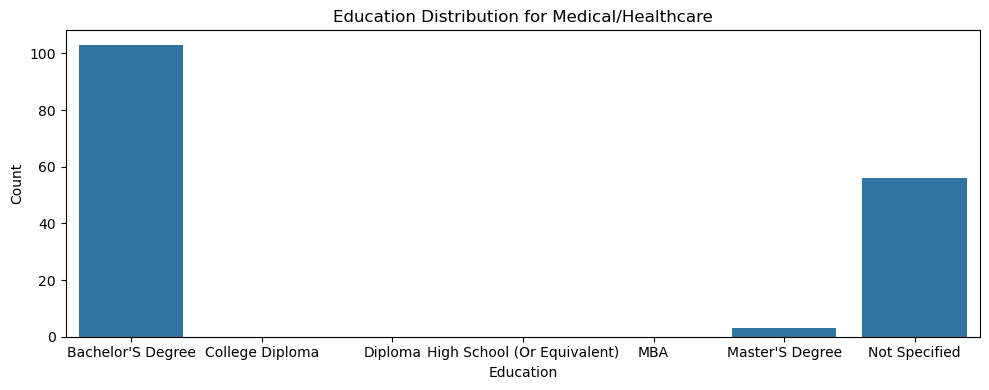

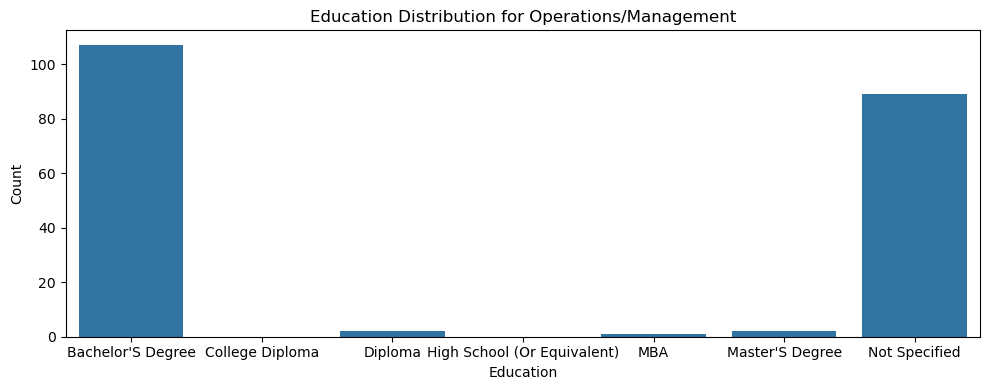

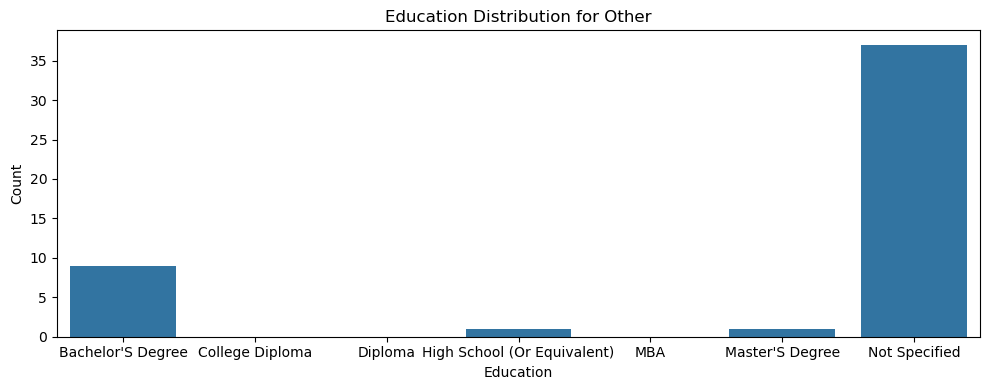

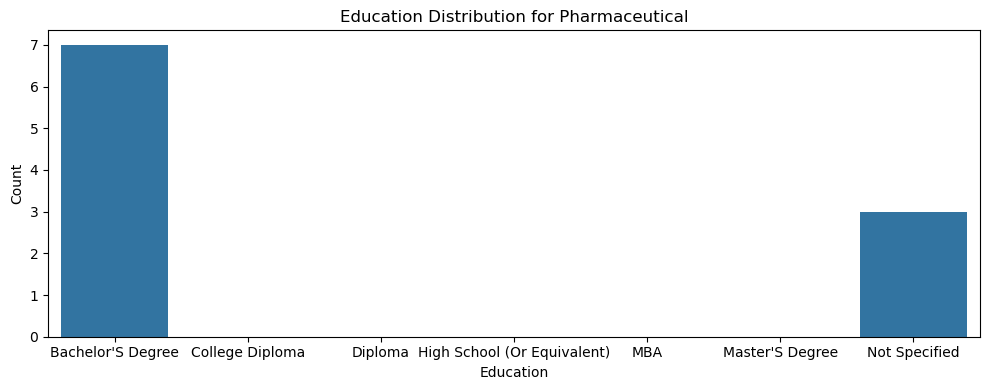

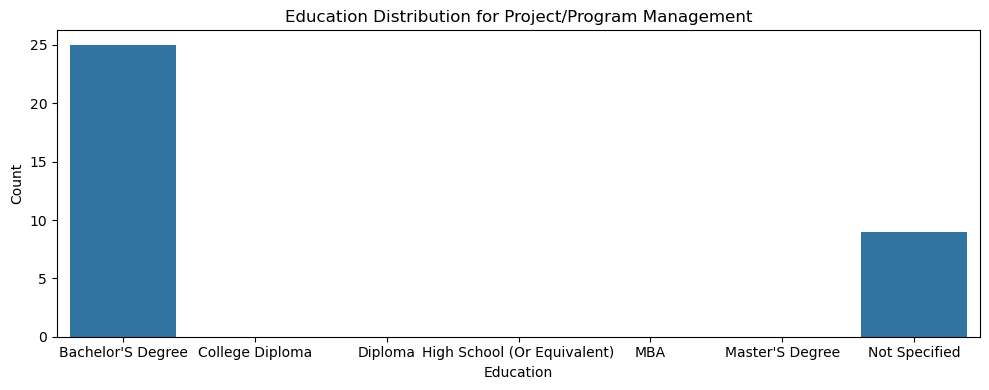

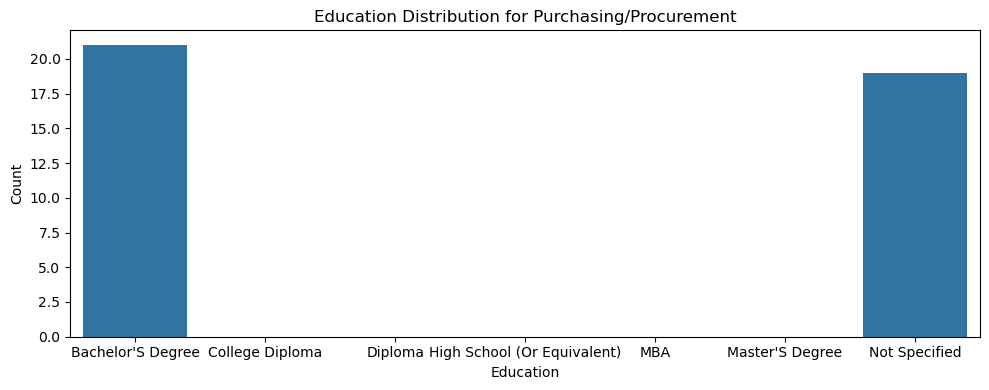

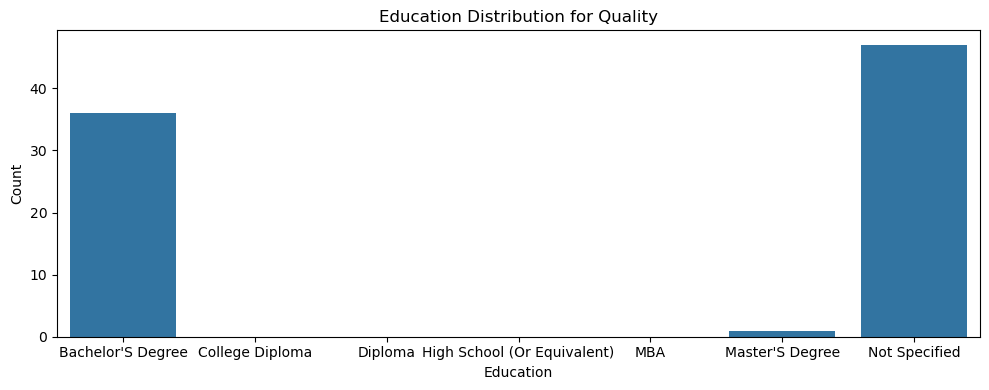

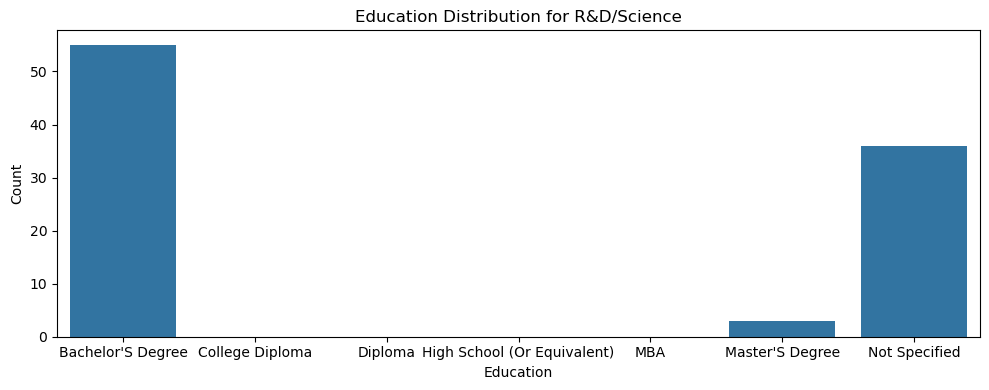

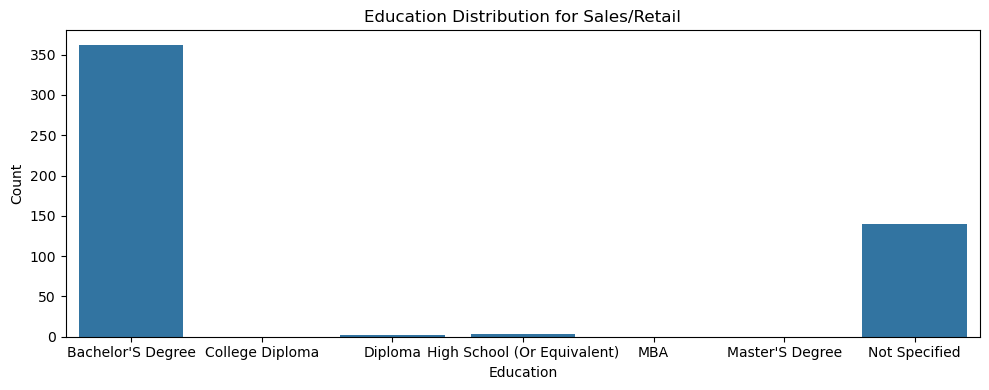

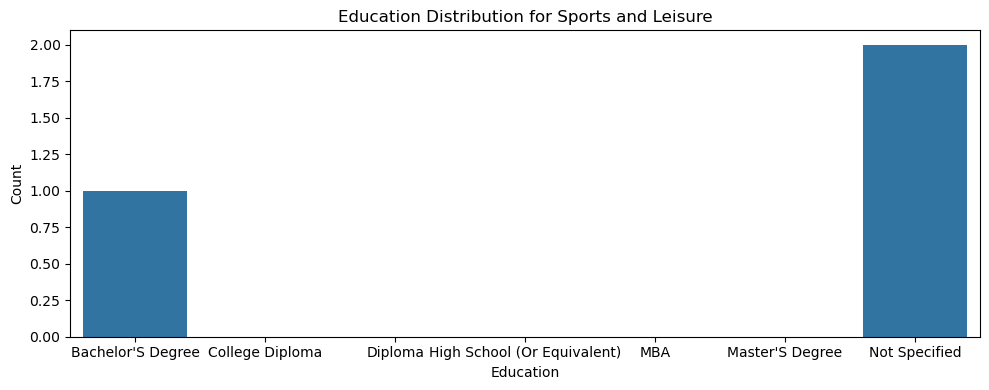

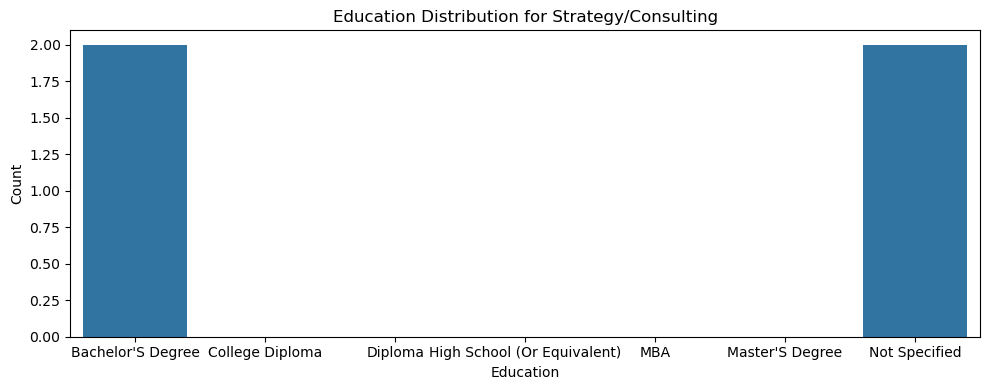

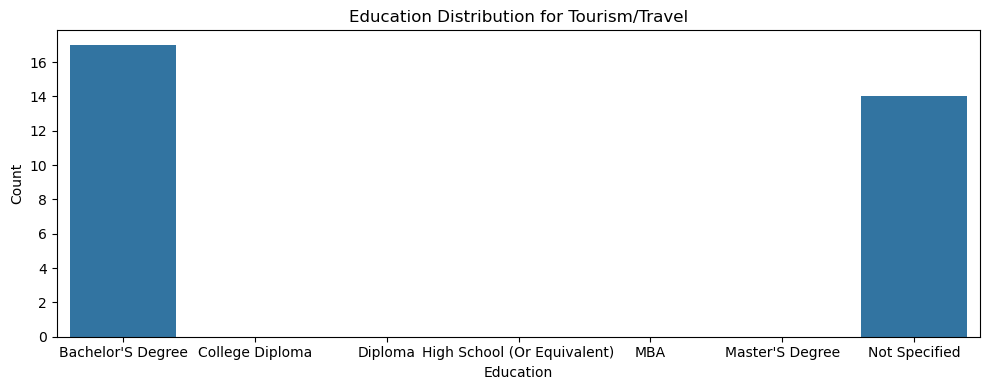

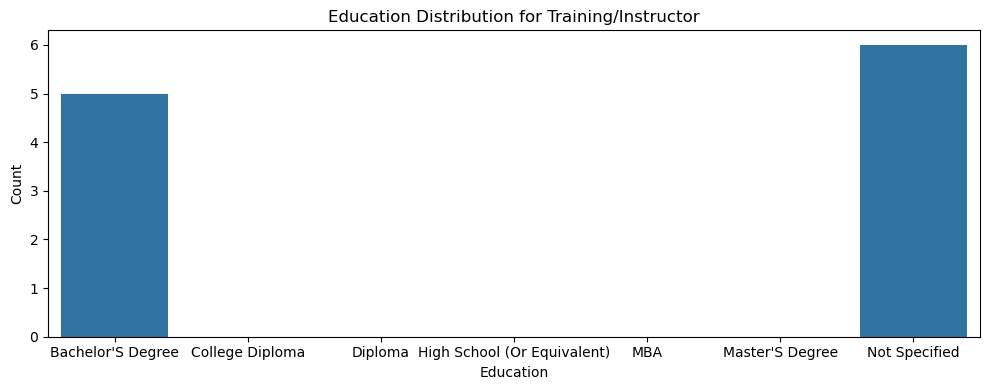

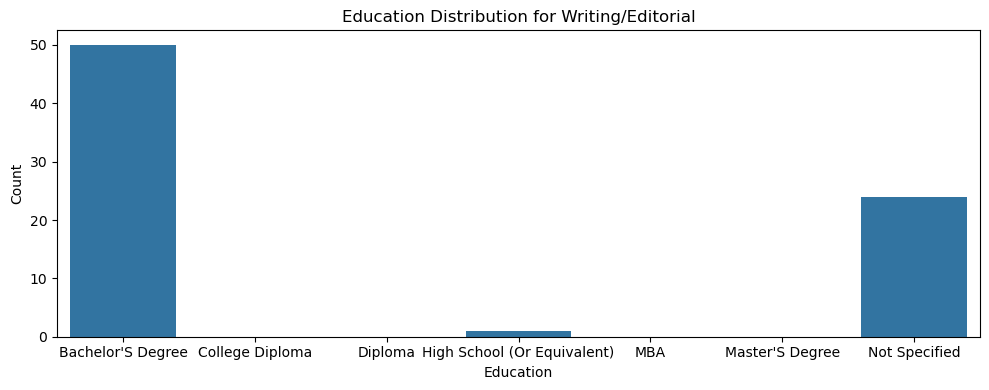

In [76]:
# Group the data by Job_Category and Education
grouped_df = df.groupby(['Job_Category', 'Education']).size().reset_index(name='Count')

# Pivot the data to create a matrix
pivot_df = grouped_df.pivot(index='Job_Category', columns='Education', values='Count')

# Melt the pivot_df DataFrame
melted_df = pd.melt(pivot_df.reset_index(), id_vars='Job_Category', value_vars=pivot_df.columns, var_name='Education', value_name='Count')

# Draw a separate graph for each job category
for job_category in melted_df['Job_Category'].unique():
    job_category_df = melted_df[melted_df['Job_Category'] == job_category]
    plt.figure(figsize=(10, 4))
    sns.barplot(data=job_category_df, x='Education', y='Count')
    plt.title(f'Education Distribution for {job_category}')
    plt.xlabel('Education')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


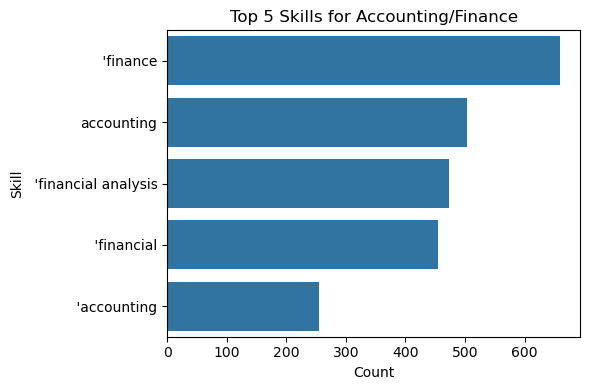

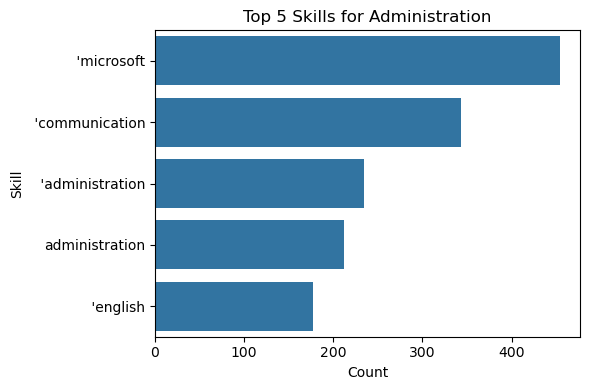

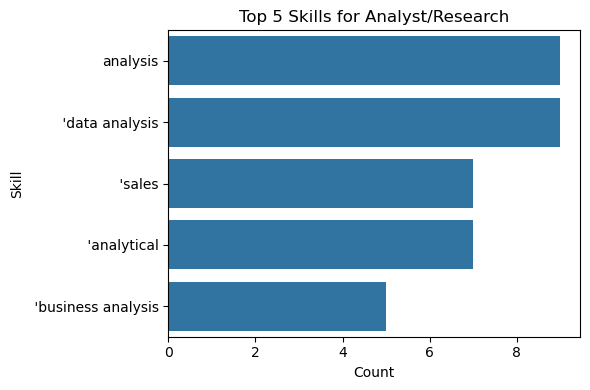

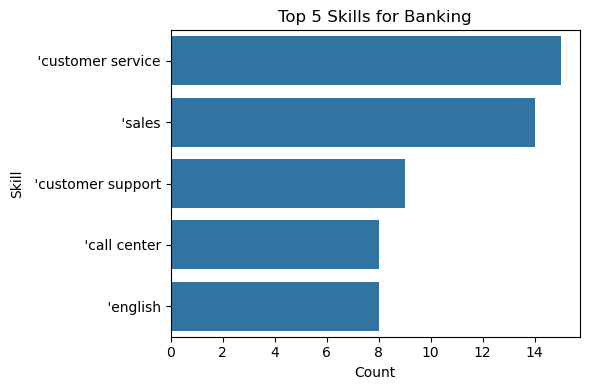

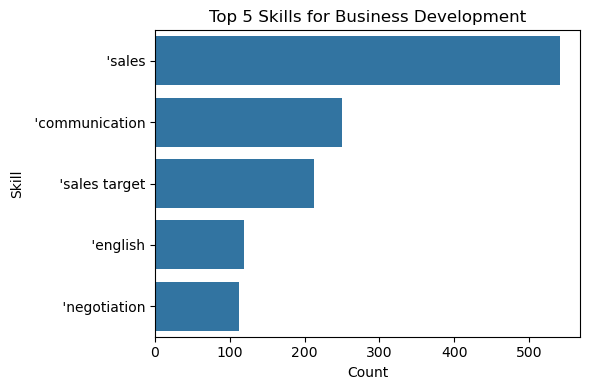

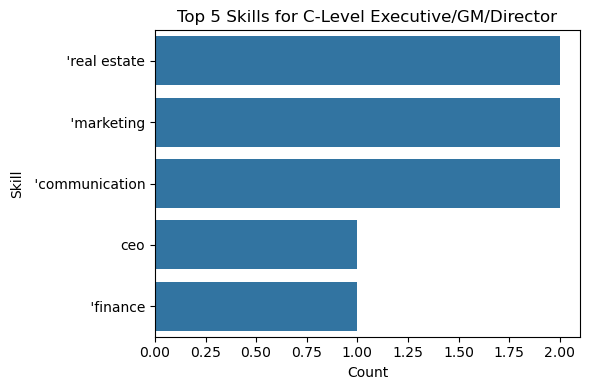

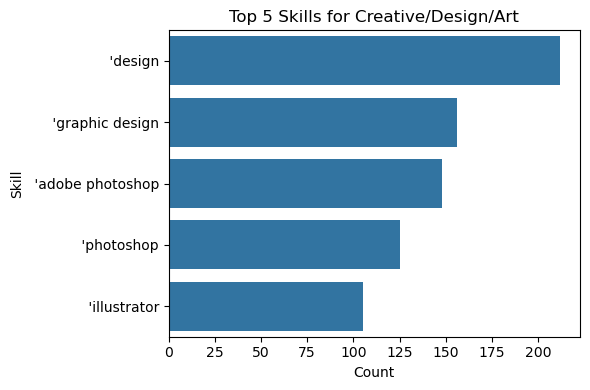

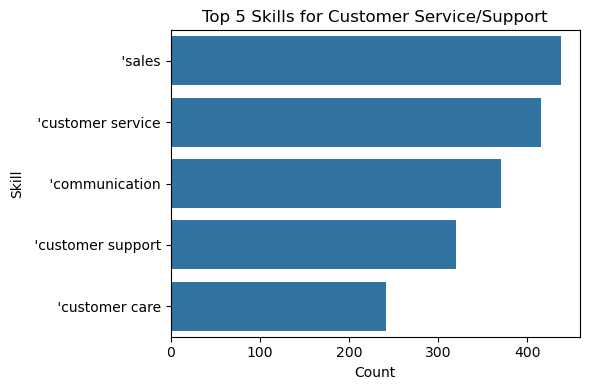

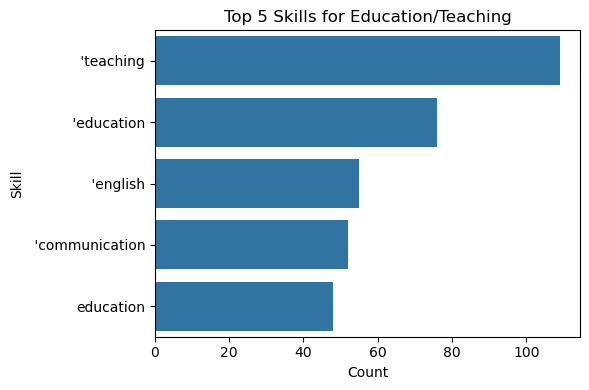

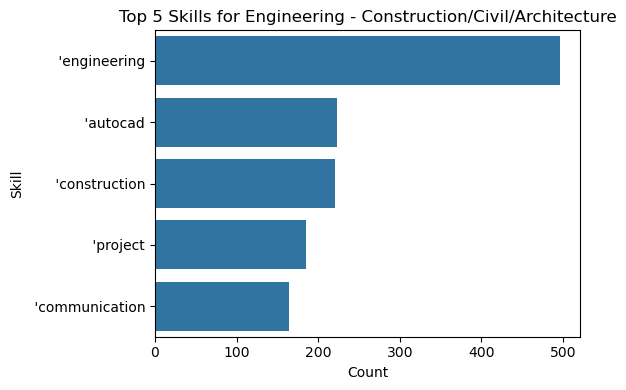

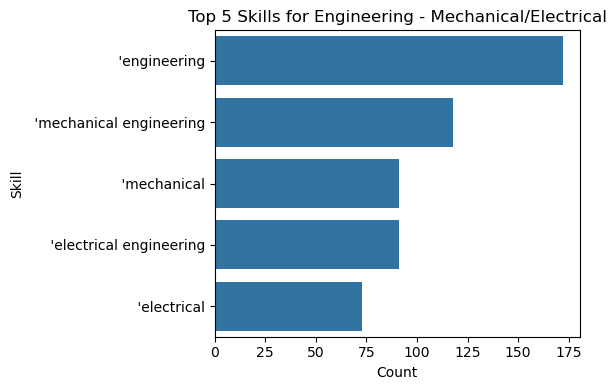

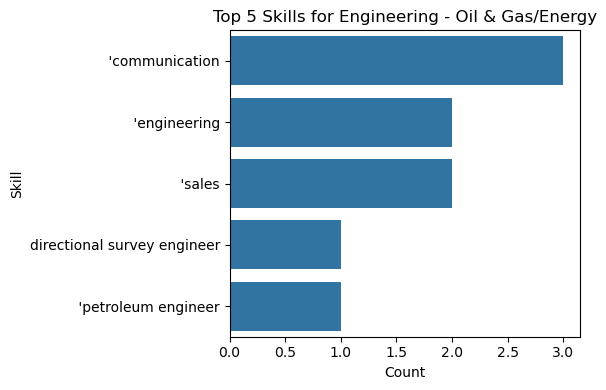

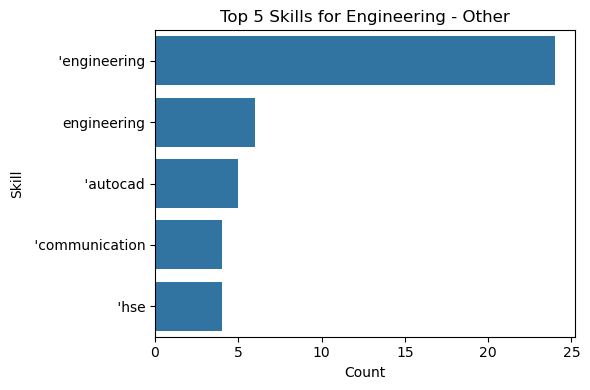

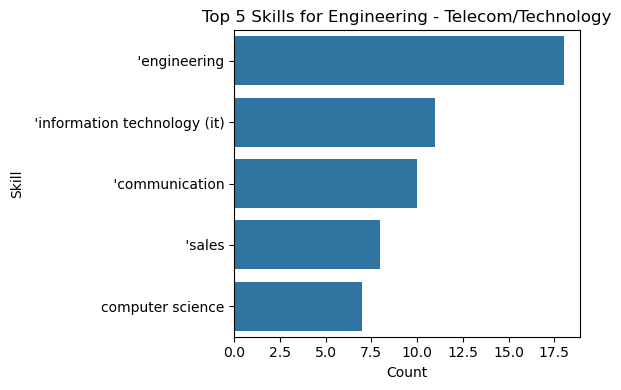

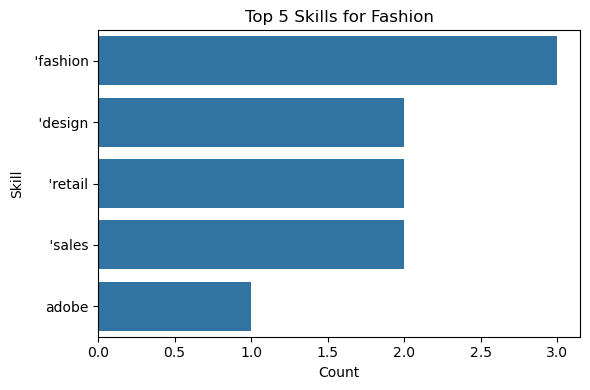

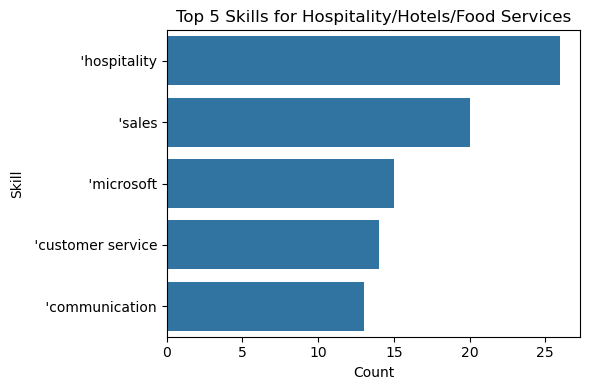

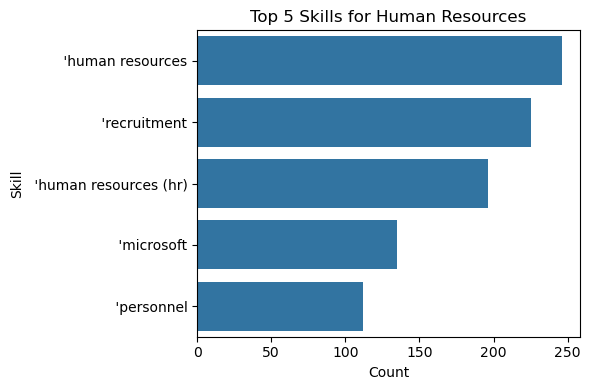

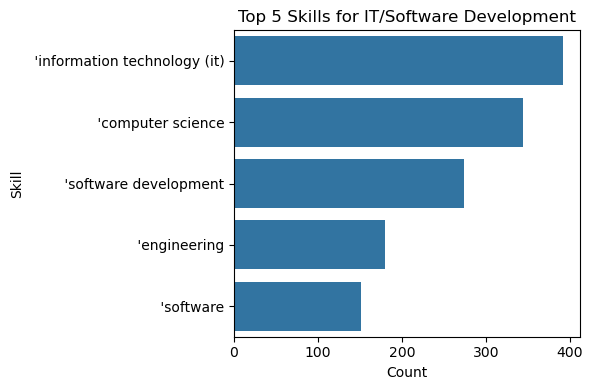

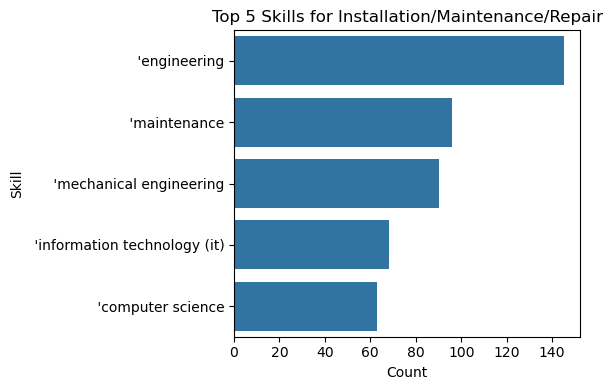

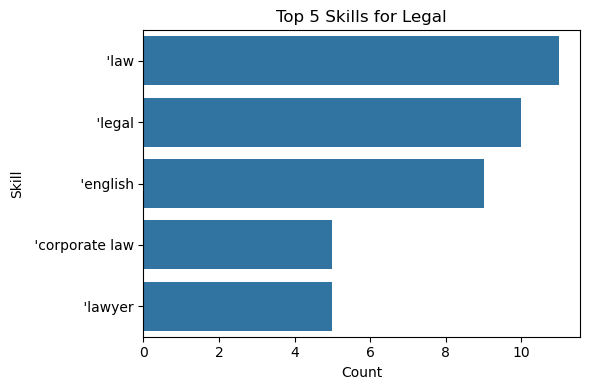

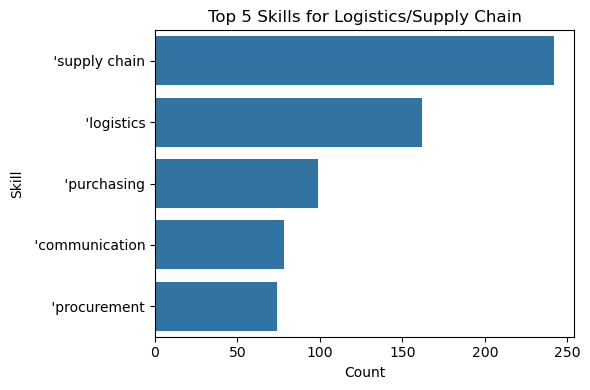

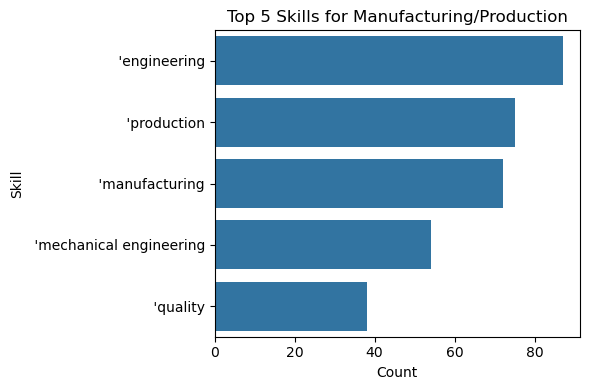

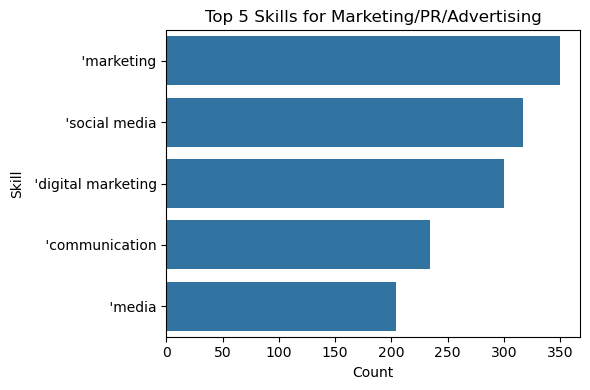

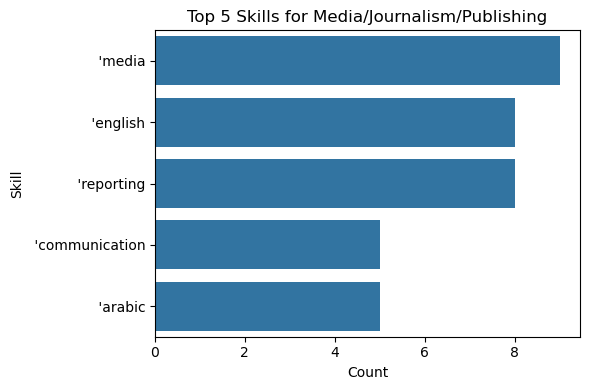

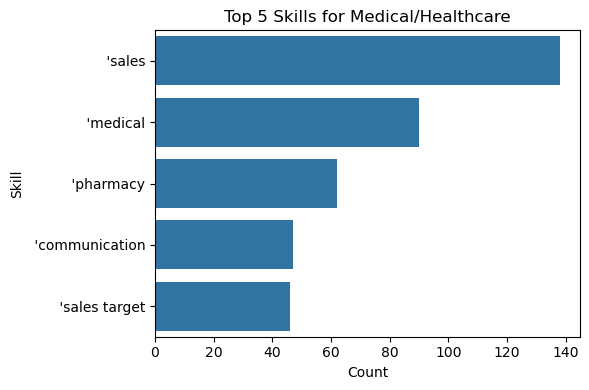

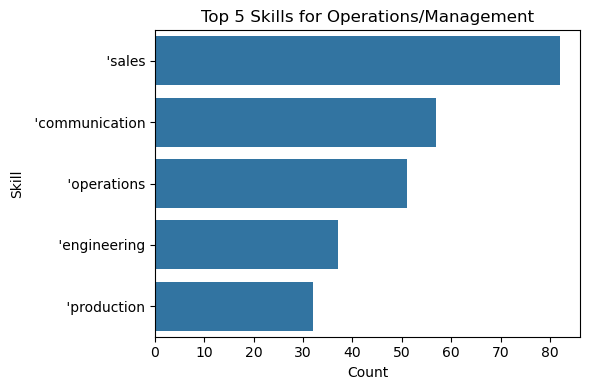

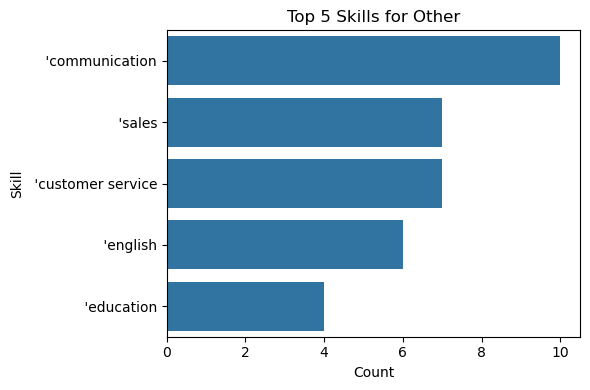

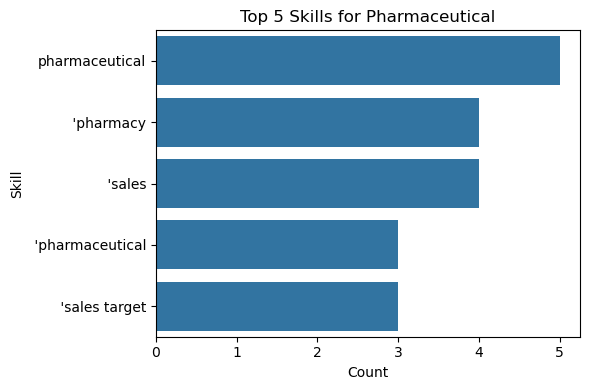

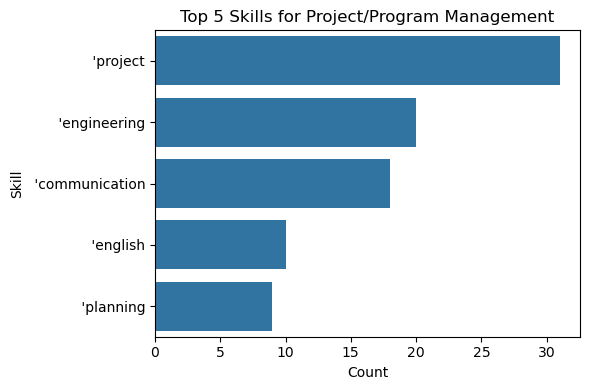

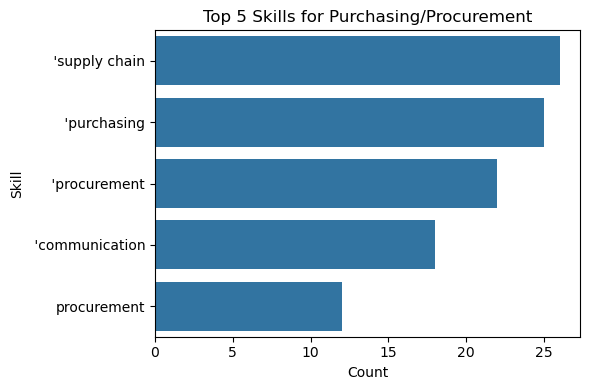

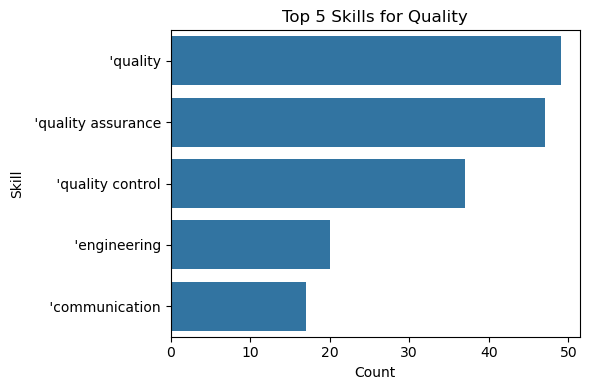

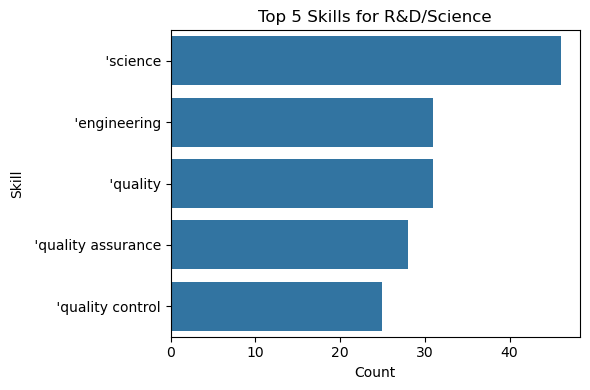

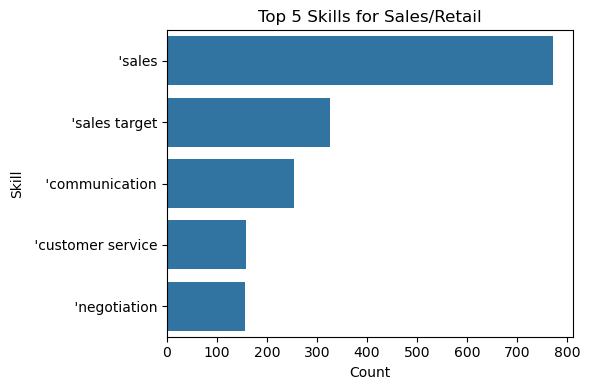

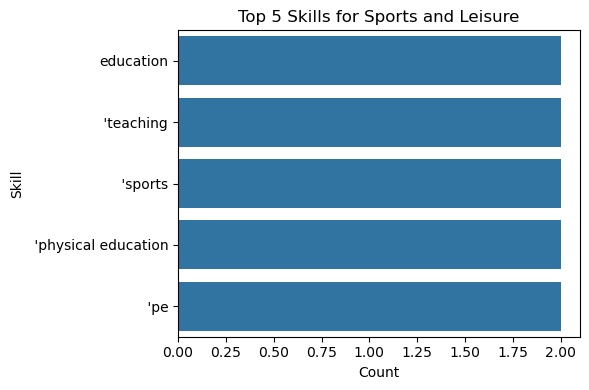

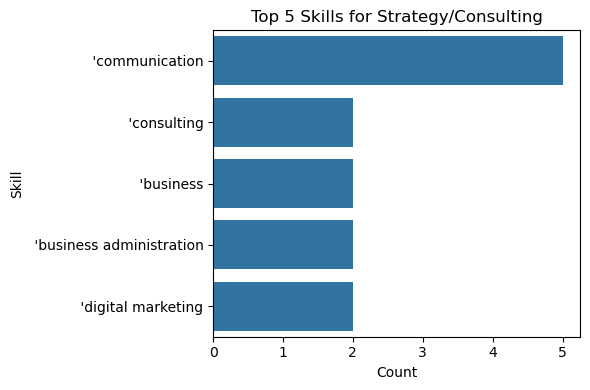

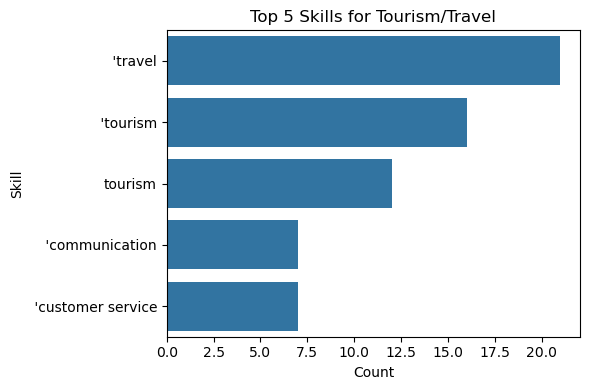

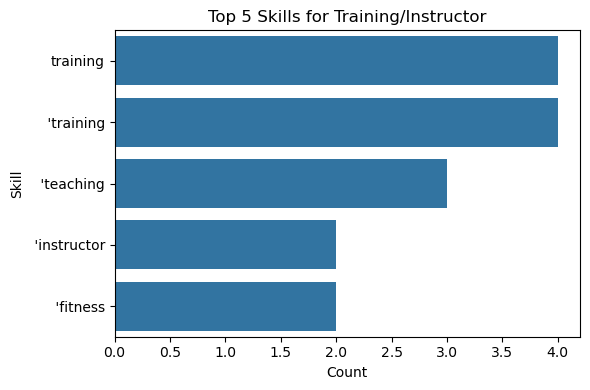

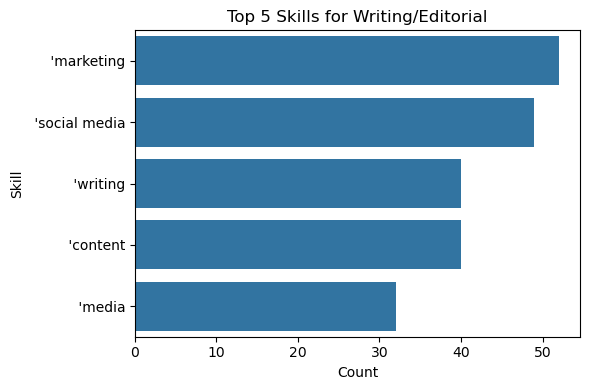

In [77]:
# Group the data by Job_Category and extract the skills
grouped_df = df.groupby('Job_Category')['Skills'].apply(lambda x: [skill.strip("[]'") for skills in x for skill in skills.split(',')])

# Count the skills for each job category
skill_counts = grouped_df.apply(lambda x: Counter(x))

# Get the top 5 skills for each job category
top_skills = skill_counts.apply(lambda x: x.most_common(5))

# Draw a small bar plot for each job category
for job_category, skills in top_skills.items():
    plt.figure(figsize=(6, 4))
    sns.barplot(x=[skill[1] for skill in skills], y=[skill[0] for skill in skills])
    plt.title(f'Top 5 Skills for {job_category}')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.tight_layout()
    plt.show()

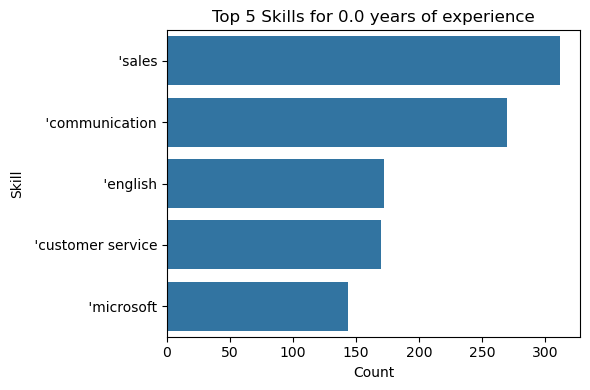

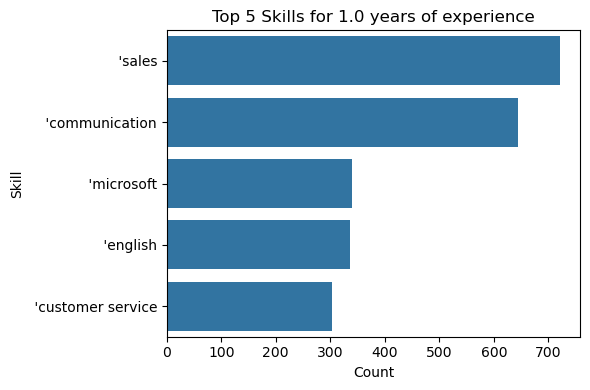

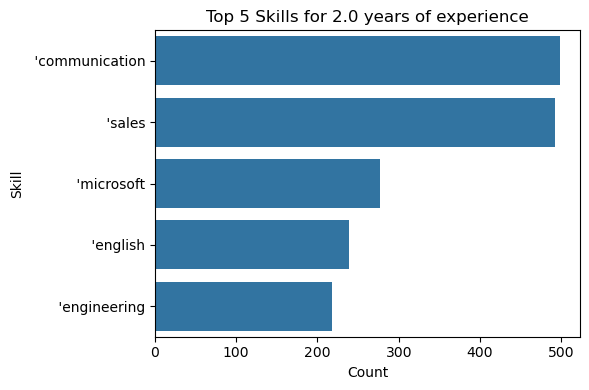

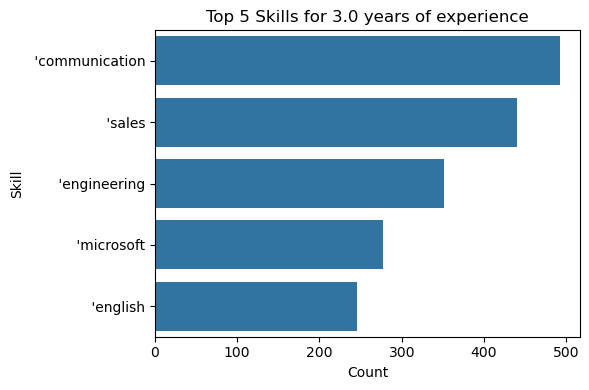

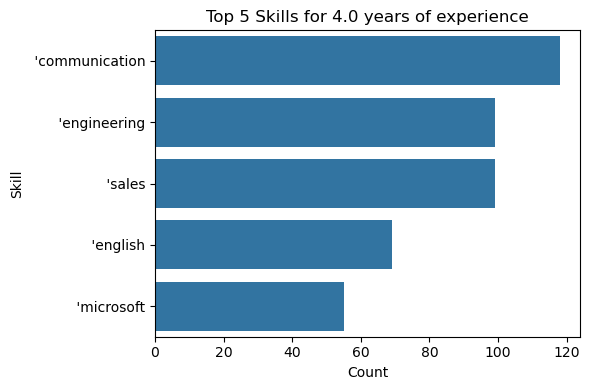

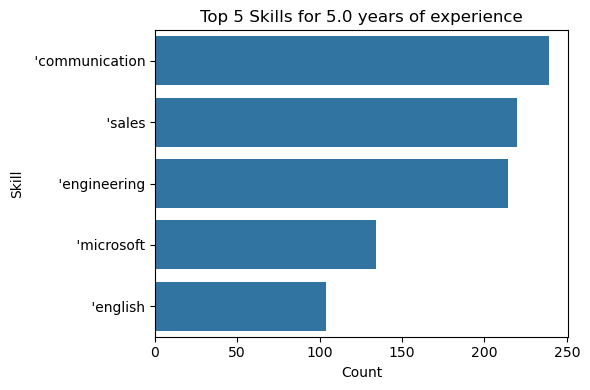

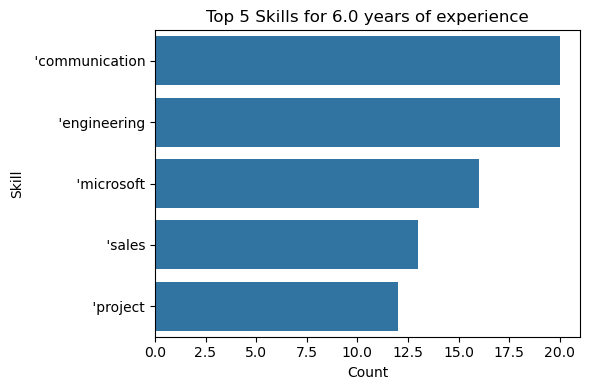

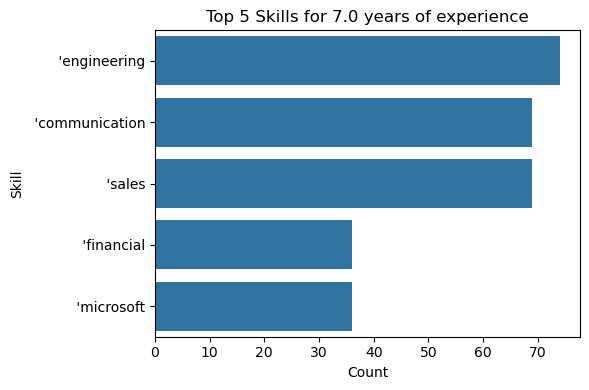

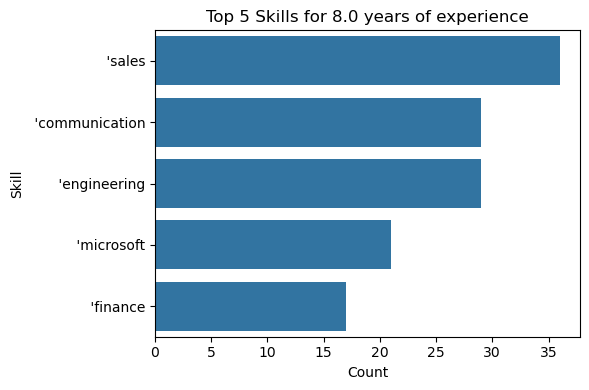

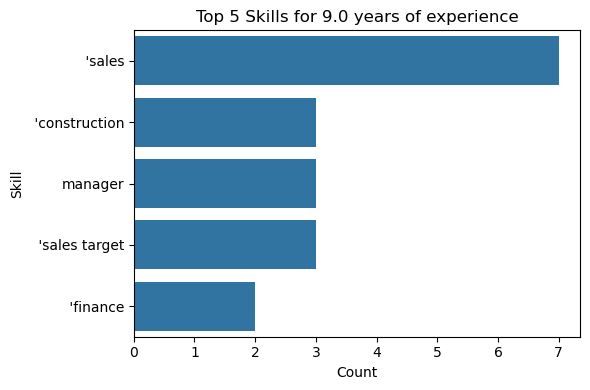

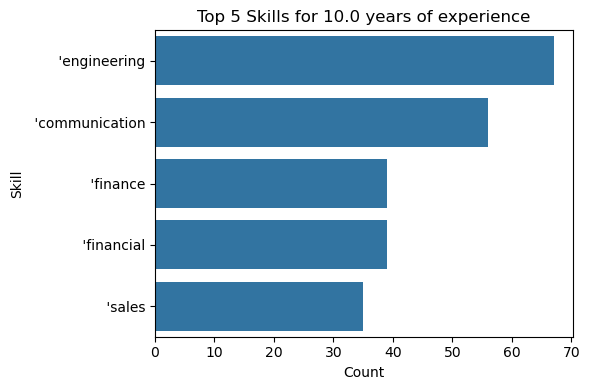

In [78]:
# Filter the data to only include min_experience up to 10 years
df_filtered = df[df['min_experience'] <= 10]

# Group the data by min_experience and extract the skills
grouped_df = df_filtered.groupby('min_experience')['Skills'].apply(lambda x: [skill.strip("[]'") for skills in x for skill in skills.split(',')])

# Count the skills for each min_experience
skill_counts = grouped_df.apply(lambda x: Counter(x))

# Get the top 5 skills for each min_experience
top_skills = skill_counts.apply(lambda x: x.most_common(5))

# Draw a small bar plot for each min_experience
for min_experience, skills in top_skills.items():
    plt.figure(figsize=(6, 4))
    sns.barplot(x=[skill[1] for skill in skills], y=[skill[0] for skill in skills])
    plt.title(f'Top 5 Skills for {min_experience} years of experience')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.tight_layout()
    plt.show()

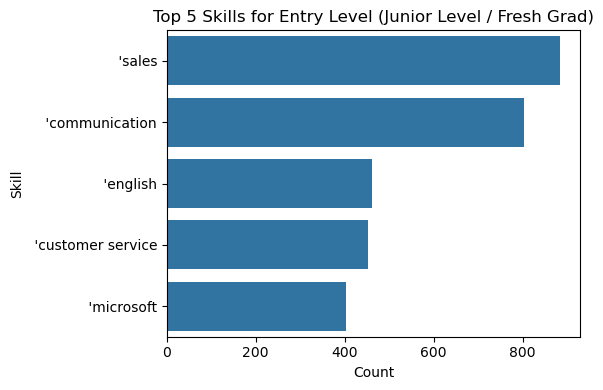

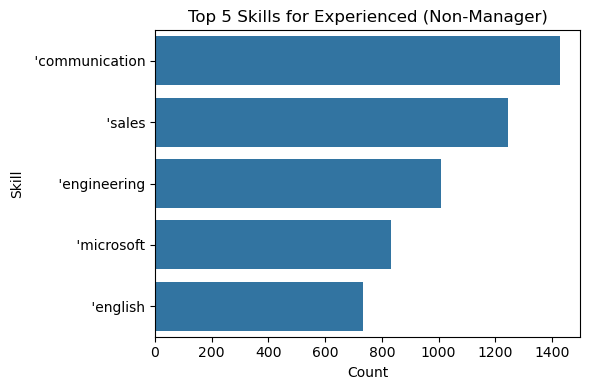

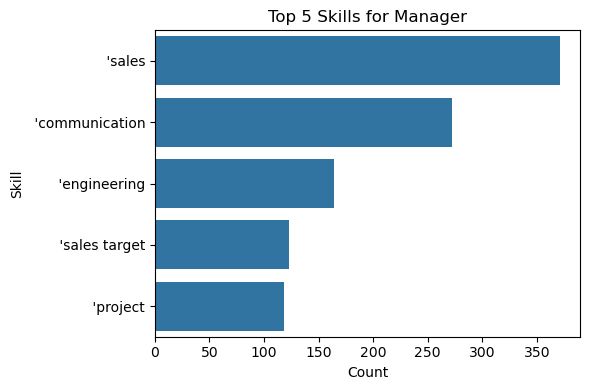

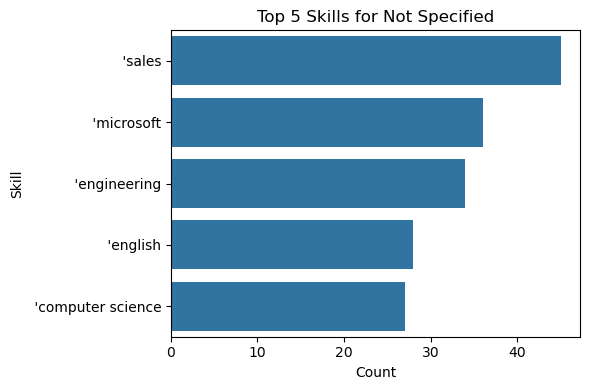

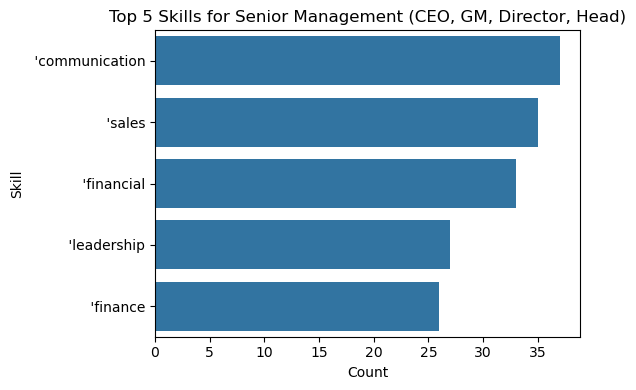

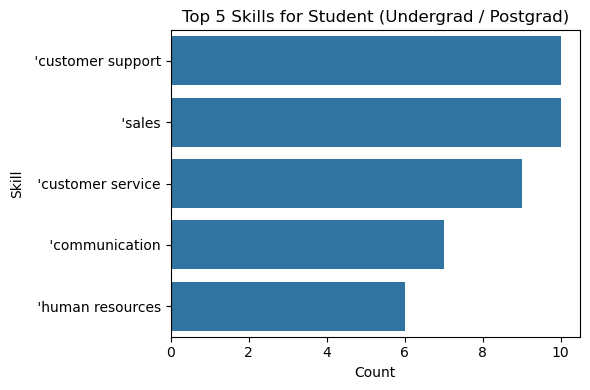

In [79]:
# Group the data by career_level and extract the skills
grouped_df = df.groupby('Career_Level')['Skills'].apply(lambda x: [skill.strip("[]'") for skills in x for skill in skills.split(',')])

# Count the skills for each career_level
skill_counts = grouped_df.apply(lambda x: Counter(x))

# Get the top 5 skills for each career_level
top_skills = skill_counts.apply(lambda x: x.most_common(5))

# Draw a small bar plot for each career_level
for career_level, skills in top_skills.items():
    plt.figure(figsize=(6, 4))
    sns.barplot(x=[skill[1] for skill in skills], y=[skill[0] for skill in skills])
    plt.title(f'Top 5 Skills for {career_level}')
    plt.xlabel('Count')
    plt.ylabel('Skill')
    plt.tight_layout()
    plt.show()

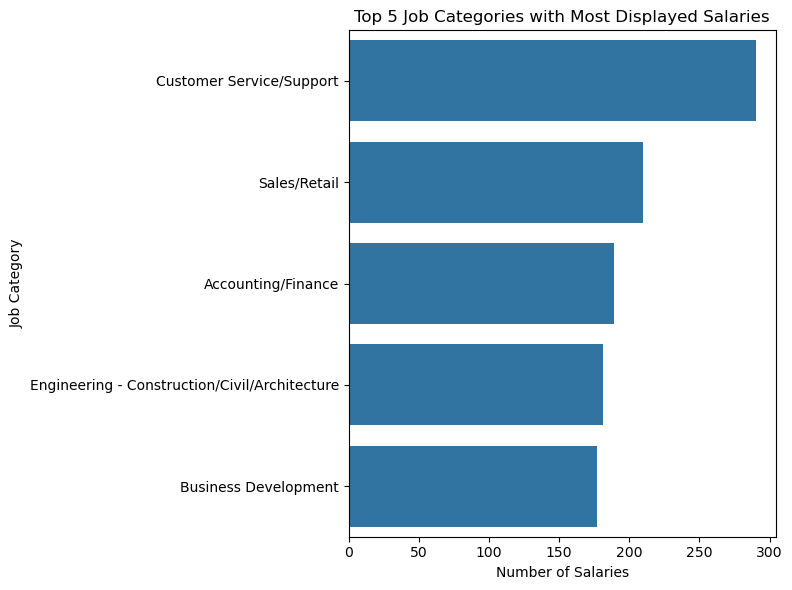

In [80]:
# Filter the data to only include rows where Salary is not "Confidential"
df_filtered = df[df['Salary'] != 'Confidential']

# Group the data by Job_Category and count the number of rows
salary_counts = df_filtered.groupby('Job_Category')['Salary'].count()

# Sort the salary_counts in descending order
salary_counts_sorted = salary_counts.sort_values(ascending=False)

# Plot the top 5 job categories with the most displayed salaries
plt.figure(figsize=(8, 6))
sns.barplot(x=salary_counts_sorted.values[:5], y=salary_counts_sorted.index[:5])
plt.title('Top 5 Job Categories with Most Displayed Salaries')
plt.xlabel('Number of Salaries')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()

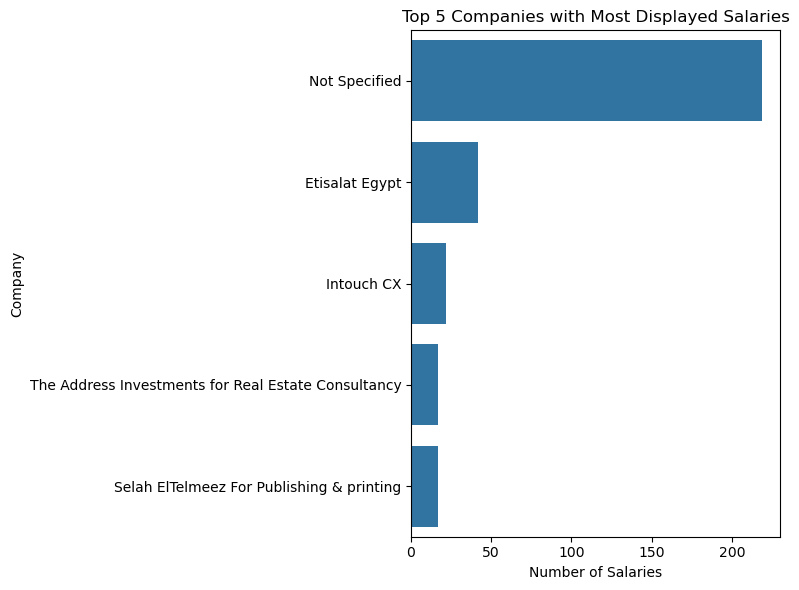

In [81]:
# Filter the data to only include rows where Salary is not "Confidential"
df_filtered = df[df['Salary'] != 'Confidential']

# Group the data by Company and count the number of rows
salary_counts = df_filtered.groupby('Company')['Salary'].count()

# Sort the salary_counts in descending order
salary_counts_sorted = salary_counts.sort_values(ascending=False)

# Plot the top 5 companies with the most displayed salaries
plt.figure(figsize=(8, 6))
sns.barplot(x=salary_counts_sorted.values[:5], y=salary_counts_sorted.index[:5])
plt.title('Top 5 Companies with Most Displayed Salaries')
plt.xlabel('Number of Salaries')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

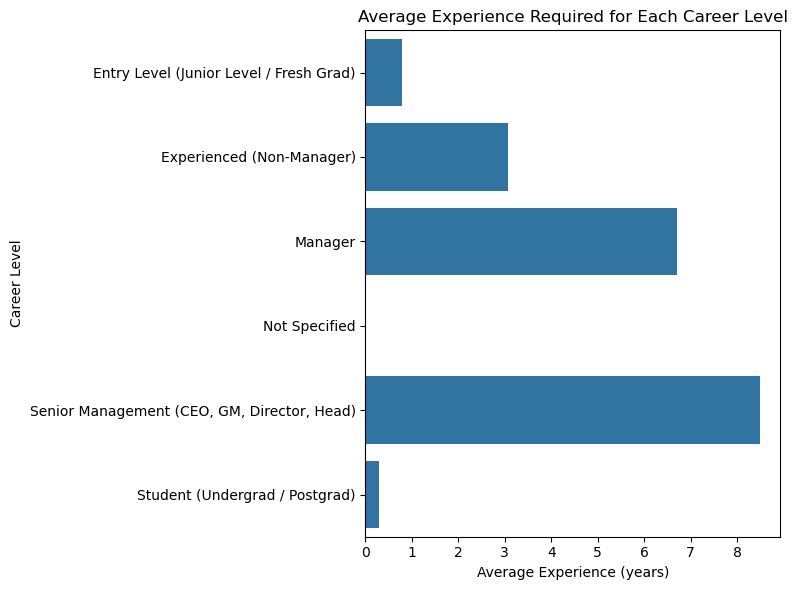

In [82]:
# Group the data by Career_Level and calculate the average experience
avg_experience = df.groupby('Career_Level')['min_experience'].mean()

# Plot the average experience for each career level
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_experience.values, y=avg_experience.index)
plt.title('Average Experience Required for Each Career Level')
plt.xlabel('Average Experience (years)')
plt.ylabel('Career Level')
plt.tight_layout()
plt.show()